In [2]:
!pip uninstall scikit-learn -y
!pip uninstall imbalanced-learn -y
!pip cache purge

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\shutil.py", line 825, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] 拒绝访问。: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-1.3.0.dist-info\\' -> 'C:\\Users\\apple\\AppData\\Local\\Temp\\pip-uninstall-la3lku8i'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\req\req_install.py", line 687, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "C:\ProgramData\anaconda3\Li

Found existing installation: imbalanced-learn 0.8.0
Uninstalling imbalanced-learn-0.8.0:
  Successfully uninstalled imbalanced-learn-0.8.0
Files removed: 24


In [4]:
!pip install scikit-learn==1.5.0
!pip install imbalanced-learn==0.12.3

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Partial import of sklearn during the build process.
  setup.py:128: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext  # noqa
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\ProgramDat

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB 217.9 kB/s eta 0:00:31
     ---------------------------------------- 0.0/6.7 MB 262.6 kB/s eta 0:00:26
     ---------------------------------------- 0.1/6.7 MB 409.6 kB/s eta 0:00:17
     - -------------------------------------- 0.2/6.7 MB 1.2 MB/s eta 0:00:06
     --- ------------------------------------ 0.6/6.7 MB 2.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/6.7 MB 3.6 MB/s eta 0:00:02
     -------- ------------------------------- 1.4/6.7 MB 4.5 MB/s eta 0:00:02
     --------- ------------------------------ 1.6/6.7 MB 4.8 MB/s eta 0:00:02
     ------------ --------------------------- 2.0/6.7 MB 5.2 MB/s eta 0:00:01
     -------------- ------------------------- 2.4/6.7 MB 5.7 MB/s eta 0:

In [2]:
import sklearn
import imblearn

print(sklearn.__version__)  # Should print 1.0.2
print(imblearn.__version__)  # Should print 0.8.0

1.5.0
0.12.3


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import preprocessing
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.metrics import geometric_mean_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
# read in relevant dataset

df_01 = pd.read_csv("df_modelling_std_01_labels.csv").drop(columns=["Unnamed: 0"])

In [5]:
df_01.head()

,LSOA11CD,Pop_size,avg_pop_churn,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,...,toWork_carVan,toWork_passenger_carVan,toWork_taxi,toWork_bicycle,toWork_walk,toWork_other,Class_2_status,Class_3_status,GEN_Class2,GEN_Class3
0,E01000001,-0.658537,0.741966,-1.372624,-1.614350,-1.582329,-1.755906,-0.901554,0.083712,0.272321,...,-0.546198,-0.859595,-0.631409,0.805561,11.685667,1.749058,STB,STB,NON-GEN,NON-GEN
1,E01000002,-0.759582,0.950390,-1.079848,-1.188341,-1.453815,-1.500000,-1.423143,-0.489536,-0.287946,...,-0.233249,-0.871737,-0.858955,1.137534,10.966777,2.137273,STB,STB,NON-GEN,NON-GEN
2,E01000003,-1.073171,0.375663,-1.171103,-1.892377,-1.578313,-0.161417,-0.411054,0.291174,0.209821,...,-0.482598,-0.834654,-0.852303,1.677591,9.131364,2.061122,STB,STB,NON-GEN,NON-GEN
3,E01000005,-2.331010,0.295788,-1.049430,0.107623,-0.297189,-0.350394,1.015544,0.598726,-0.216518,...,-0.902586,-0.798896,-0.695636,0.940659,5.935153,-0.633620,DEC,DEC,NON-GEN,NON-GEN
4,E01000006,0.170732,0.179719,0.768061,0.587444,0.064257,-0.350394,0.227979,0.651501,0.448661,...,-0.991452,0.062273,-0.191442,-0.358449,0.177392,-0.514019,DEC,DEC,NON-GEN,NON-GEN


In [6]:
# drop cluster unnecessary feature columns for this stage

df_01 = df_01.drop(columns=["LSOA11CD","Class_2_status","Class_3_status","GEN_Class3"])

In [10]:
df_01
# split the dataframe into 2 - (1) input data to be crunched and (2) labels for verfication
df_01_data = df_01.drop(["GEN_Class2"],axis=1)

In [11]:

df_01_labels = df_01[["GEN_Class2"]]

In [12]:
df_01_data.head()

,Pop_size,avg_pop_churn,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,...,toWork_underground_light_rail,toWork_train,toWork_bus,toWork_motorcycle,toWork_carVan,toWork_passenger_carVan,toWork_taxi,toWork_bicycle,toWork_walk,toWork_other
0,-0.658537,0.741966,-1.372624,-1.614350,-1.582329,-1.755906,-0.901554,0.083712,0.272321,0.144578,...,0.170795,-0.306083,-0.835334,1.793259,-0.546198,-0.859595,-0.631409,0.805561,11.685667,1.749058
1,-0.759582,0.950390,-1.079848,-1.188341,-1.453815,-1.500000,-1.423143,-0.489536,-0.287946,0.321285,...,0.227091,-0.233313,-0.974646,2.703046,-0.233249,-0.871737,-0.858955,1.137534,10.966777,2.137273
2,-1.073171,0.375663,-1.171103,-1.892377,-1.578313,-0.161417,-0.411054,0.291174,0.209821,0.257028,...,0.091431,-0.240467,-0.275673,-0.105336,-0.482598,-0.834654,-0.852303,1.677591,9.131364,2.061122
3,-2.331010,0.295788,-1.049430,0.107623,-0.297189,-0.350394,1.015544,0.598726,-0.216518,-1.052209,...,0.113814,-0.031168,0.294310,-0.283444,-0.902586,-0.798896,-0.695636,0.940659,5.935153,-0.633620
4,0.170732,0.179719,0.768061,0.587444,0.064257,-0.350394,0.227979,0.651501,0.448661,0.506024,...,0.575088,0.317257,-0.549085,-0.179201,-0.991452,0.062273,-0.191442,-0.358449,0.177392,-0.514019


In [13]:
df_01_labels.head()

,GEN_Class2
0,NON-GEN
1,NON-GEN
2,NON-GEN
3,NON-GEN
4,NON-GEN


In [14]:
# split the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(df_01_data, df_01_labels, test_size=0.3, stratify = df_01_labels, random_state=42)

## Building the Baseline Algorithms

### 1) Balanced Random Forest Classifier

In [15]:
# initialise model

brf = BalancedRandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

In [16]:
# parameter space for checking by GridSearchCV

param_grid_brf = { 
    'n_estimators': range(100, 4601, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [17]:
# search for optimal hyperparameters

CV_brf = GridSearchCV(estimator=brf, param_grid=param_grid_brf, cv= 5, verbose=3, n_jobs=-1, scoring="f1_weighted")
CV_brf.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\base.py", line 42, in _validate_params
    valid

GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(class_weight='balanced',
                                                      n_jobs=-1,
                                                      random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 4601, 500)},
             scoring='f1_weighted', verbose=3)

In [18]:
# extract optimal hyperparameters

CV_brf.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 600}

In [19]:
# do a finer-grained search for optimal hyperparameters within a narrowed down parameter space derived above

param_grid_brf2 = { 
    'n_estimators': range(200, 1001, 100),
    'max_features': ['auto'],
    'criterion' :['entropy']
}

In [21]:
param_grid_brf2 = { 
    'n_estimators': range(200, 1001, 100),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['entropy']
}

# Perform grid search
CV_brf2 = GridSearchCV(estimator=brf, param_grid=param_grid_brf2, cv=5, verbose=3, n_jobs=-1, scoring="f1_weighted")
CV_brf2.fit(x_train, y_train.values.ravel())


Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warni

GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(class_weight='balanced',
                                                      n_jobs=-1,
                                                      random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': range(200, 1001, 100)},
             scoring='f1_weighted', verbose=3)

In [22]:
# extract best parameters

CV_brf2.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 700}

In [23]:
# model based on best paramters

brf2=BalancedRandomForestClassifier(random_state=42, max_features='auto', n_estimators= 600, criterion='entropy', n_jobs=-1, verbose=3, class_weight="balanced")

In [25]:
# model based on best parameters
brf2 = BalancedRandomForestClassifier(
    random_state=42, 
    max_features='sqrt',  # Use a valid value
    n_estimators=600, 
    criterion='entropy', 
    n_jobs=-1, 
    verbose=3, 
    class_weight="balanced"
)

# evaluate the model's performance
scores = cross_val_score(brf2, x_train, y_train.values.ravel(), cv=5, scoring='f1_weighted')
print("mean validation - F1 Weighted score:", "F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Fit the model and make predictions
brf2 = brf2.fit(x_train, y_train.values.ravel())
y_pred = brf2.predict(x_test)

# Calculate the F1 score on the test set
f1 = f1_score(y_test, y_pred, average='weighted')
print('Weighted F1 score on Test set:', f1)


C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warni

mean validation - F1 Weighted score: F1 score: 0.83 (+/- 0.01)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 3 of 600
building tree 2 of 600
building tree 1 of 600
building tree 6 of 600
building tree 7 of 600
building tree 5 of 600
building tree 4 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 16 of 600
building tree 14 of 600
building tree 15 of 600
building tree 12 of 600
building tree 13 of 600
building tree 11 of 600
building tree 17 of 600
building tree 19 of 600
building tree 20 of 600
building tree 18 of 600
building tree 21 of 600
building tree 23 of 600
building tree 22 of 600
building tree 24 of 600
building tree 26 of 600
building tree 25 of 600
building tree 27 of 600
building tree 28 of 600
building tree 32 of 600
building tree 31 of 600
building tree 30 of 600
building tree 29 of 600
building tree 34 of 600
building tree 35 of 600
building tree 33 of 600
building tree 36 of 600
building tree 38 of 600
building tree 37 of 600
building tree 41 of 600
building tree 39 of 600
building tree 40 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 130 of 600
building tree 131 of 600
building tree 134 of 600
building tree 133 of 600
building tree 132 of 600
building tree 135 of 600
building tree 137 of 600
building tree 138 of 600
building tree 136 of 600
building tree 139 of 600
building tree 141 of 600
building tree 140 of 600
building tree 142 of 600
building tree 144 of 600
building tree 143 of 600
building tree 146 of 600
building tree 145 of 600
building tree 148 of 600
building tree 150 of 600
building tree 149 of 600
building tree 147 of 600
building tree 153 of 600
building tree 151 of 600
building tree 152 of 600
building tree 154 of 600
building tree 156 of 600
building tree 155 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 163 of 600
building tree 162 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 168 of 600
building tree 169 of 600
building tree 167 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 340 of 600
building tree 339 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 347 of 600
building tree 345 of 600
building tree 346 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 352 of 600
building tree 351 of 600
building tree 354 of 600
building tree 353 of 600
building tree 356 of 600
building tree 355 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 361 of 600
building tree 360 of 600
building tree 364 of 600
building tree 362 of 600
building tree 363 of 600
building tree 365 of 600
building tree 370 of 600
building tree 366 of 600
building tree 368 of 600
building tree 371 of 600
building tree 367 of 600
building tree 369 of 600
building tree 372 of 600
building tree 373 of 600
building tree 375 of 600
building tree 374 of 600
building tree 378 of 600
building tree 377 of 600
building tree 376 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 545 of 600
building tree 543 of 600
building tree 542 of 600
building tree 546 of 600
building tree 544 of 600
building tree 547 of 600
building tree 549 of 600
building tree 548 of 600
building tree 552 of 600
building tree 553 of 600
building tree 550 of 600
building tree 551 of 600
building tree 556 of 600
building tree 554 of 600
building tree 555 of 600
building tree 557 of 600
building tree 559 of 600
building tree 558 of 600
building tree 561 of 600
building tree 560 of 600
building tree 564 of 600
building tree 562 of 600
building tree 563 of 600
building tree 566 of 600
building tree 565 of 600
building tree 569 of 600
building tree 567 of 600
building tree 568 of 600
building tree 571 of 600
building tree 570 of 600
building tree 574 of 600
building tree 575 of 600
building tree 572 of 600
building tree 573 of 600
building tree 577 of 600
building tree 576 of 600
building tree 578 of 600
building tree 580 of 600
building tree 579 of 600
building tree 583 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s


Weighted F1 score on Test set: 0.8234998114930608


[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished


In [26]:
print('The geometric mean of Balanced RandomForest classifier on the test set is {}'.format(geometric_mean_score(y_test.values.ravel(),y_pred)))

The geometric mean of Balanced RandomForest classifier on the test set is 0.7129070304805017


In [27]:
# visualise results using a simple confusion matrix

unique_label = np.unique(y_test)
print(pd.DataFrame(confusion_matrix(y_test, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:GEN  pred:NON-GEN
true:GEN            50            25
true:NON-GEN       327          1049


<Axes: title={'center': 'Non-normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

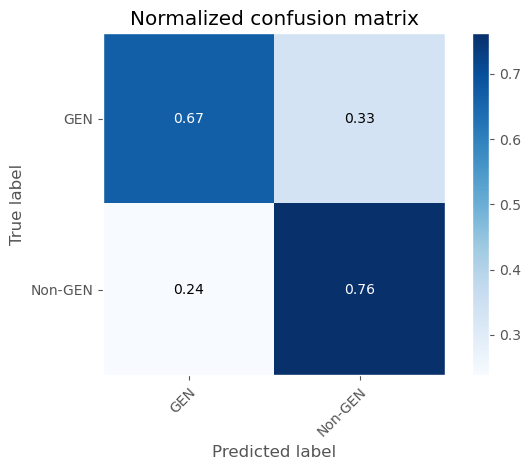

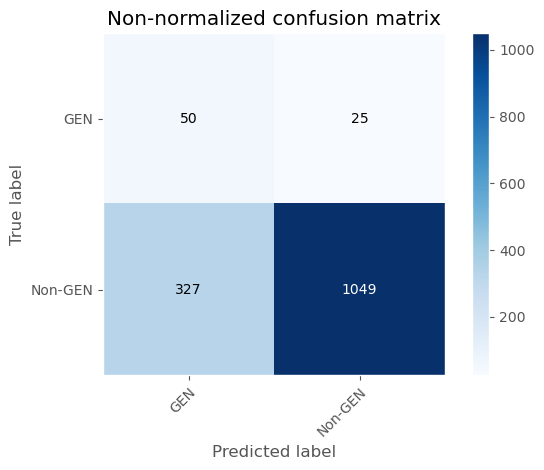

In [28]:
# plot a better visualisation using both normalised and non-normalised values
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    plt.grid(None)
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=["GEN","Non-GEN"], normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=["GEN","Non-GEN"], normalize=False,
                      title='Non-normalized confusion matrix')

### 2) Balanced Adaboost Classifier

In [29]:
# initialise model

ada=RUSBoostClassifier(random_state=42)

In [30]:
# parameter space for checking by GridSearchCV

param_grid_ada = { 
    'n_estimators': range(100, 4601, 500),
    'learning_rate':[.001,0.01,.1]
}

In [31]:
# search for optimal hyperparameters

CV_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv= 5, verbose=3, n_jobs=-1, scoring="f1_weighted")
CV_ada.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RUSBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': range(100, 4601, 500)},
             scoring='f1_weighted', verbose=3)

In [32]:
# extract optimal hyperparameters

CV_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 3600}

In [33]:
# do a finer-grained search for optimal hyperparameters within a narrowed down parameter space derived above

param_grid_ada2 = { 
    'n_estimators': range(2700, 3400, 100),
    'learning_rate':[0.1]
}

In [34]:
# search for optimal hyperparameters

CV_ada2 = GridSearchCV(estimator=ada, param_grid=param_grid_ada2, cv= 5, verbose=3, n_jobs=-1, scoring="f1_weighted")
CV_ada2.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=RUSBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'n_estimators': range(2700, 3400, 100)},
             scoring='f1_weighted', verbose=3)

In [35]:
# extract optimal hyperparameters

CV_ada2.best_params_

{'learning_rate': 0.1, 'n_estimators': 2800}

In [36]:
# model based on best paramters

ada2=RUSBoostClassifier(random_state=42,learning_rate= 0.1, n_estimators= 2800)

In [37]:
# evaluate model's performance

scores = cross_val_score(ada2, x_train, y_train.values.ravel(), cv=5, scoring = 'f1_weighted',n_jobs=-1)
print ("mean validation - F1 Weighted score:", "F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
ada2 = ada2.fit(x_train, y_train.values.ravel())
y_pred_1 = ada2.predict(x_test)
f1 = f1_score(y_test, y_pred_1, average="weighted")
print ('Wighted F1 score on Test set:', f1)

mean validation - F1 Weighted score: F1 score: 0.92 (+/- 0.01)
Wighted F1 score on Test set: 0.9307270871726816


In [38]:
print('The geometric mean of Balanced Adaboost classifier on the test set is {}'.format(geometric_mean_score(y_test.values.ravel(),y_pred_1)))

The geometric mean of Balanced Adaboost classifier on the test set is 0.6185128450847919


In [39]:
# visualise results using a simple confusion matrix

unique_label = np.unique(y_test)
print(pd.DataFrame(confusion_matrix(y_test, y_pred_1, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:GEN  pred:NON-GEN
true:GEN            30            45
true:NON-GEN        60          1316


<Axes: title={'center': 'Non-normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

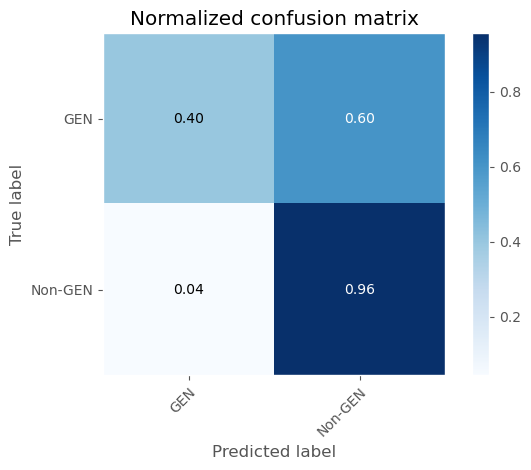

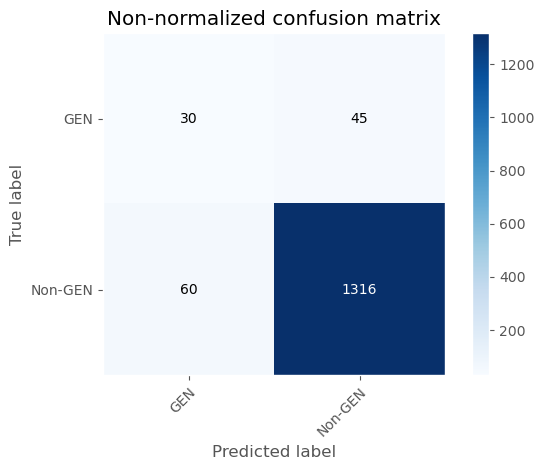

In [40]:
# plot a better visualisation using both normalised and non-normalised values
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.grid(None)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_1, classes=["GEN","Non-GEN"], normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_1, classes=["GEN","Non-GEN"], normalize=False,
                      title='Non-normalized confusion matrix')

## Extract Feature Importance from the Model

In [41]:
# extract feature importance

feature_importance = pd.DataFrame(brf2.feature_importances_,index=df_01_data.columns).reset_index()

In [42]:
feature_importance.head()

,index,0
0,Pop_size,0.008301
1,avg_pop_churn,0.006024
2,age_0_4,0.007069
3,age_5_9,0.010448
4,age_10_14,0.008310


In [43]:
# rename dataframe

feature_importance=feature_importance.rename(columns={"index":"Variable", 0:"var_impt"})

In [44]:
feature_importance.sort_values(by = "var_impt", ascending=False)

,Variable,var_impt
18,age_80_84,0.024240
17,age_75_79,0.023597
45,eth_black,0.020275
20,1-personHse_aged,0.017787
29,1-family_lone_depKids,0.017514
...,...,...
33,avg_hse_size,0.003991
28,1-family_cohab_noDepKids,0.003963
55,no_carsVans,0.003960
59,4_more_carsVans,0.003888


In [45]:
# checkpoint - output file

impt_features = pd.DataFrame(feature_importance.sort_values(by = "var_impt", ascending=False).iloc[0:10,0])
impt_features.to_csv("7a_impt_features.csv")

In [47]:

impt_features = pd.DataFrame(feature_importance.sort_values(by = "var_impt", ascending=False).iloc[0:127,0])
impt_features.to_csv("7av2_impt_features.csv")

In [48]:
# read in file with the variable codes and categories

var_code = pd.read_csv("variable_codes.csv")

In [49]:
var_code.head()

,Variable,Category,Code
0,avg_pop_churn,Pop. Churn,1
1,Pop_size,Pop. & Demographics,2
2,age_0_4,Pop. & Demographics,2
3,age_5_9,Pop. & Demographics,2
4,age_10_14,Pop. & Demographics,2


In [50]:
# merge these datasets

feature_importance = feature_importance.merge(var_code, left_on="Variable", right_on="Variable")

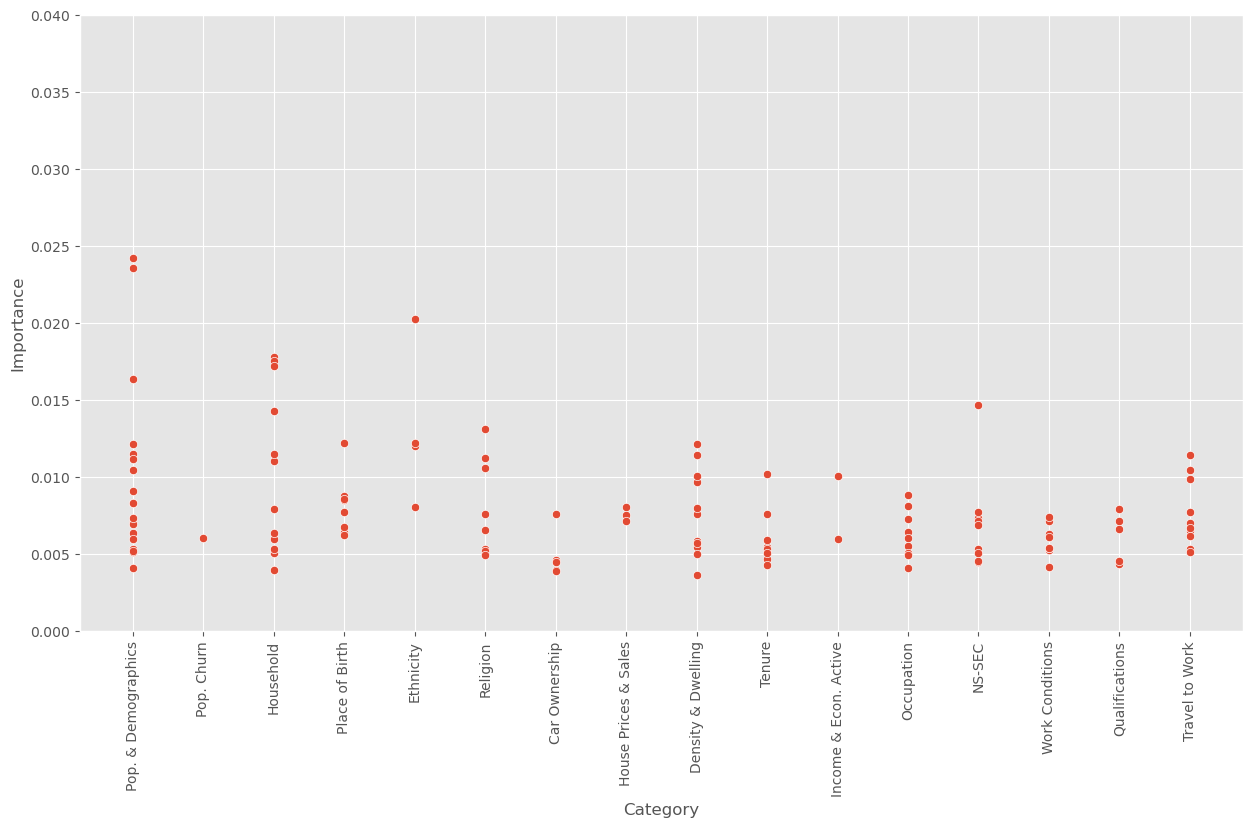

In [52]:
# visualise the most important variables

plt.figure(figsize=(15,8))
plt.ylim(0, 0.04)
plt.xticks(rotation=90)

ax = sns.scatterplot(x="Category", y="var_impt", data=feature_importance)
ax.set(ylabel='Importance')
plt.savefig('ASC feature`.png', dpi = 100)
# uncomment for loop below to annotate the chart
# for line in range(0,feature_importance.shape[0]):
#     ax.text(feature_importance.Category[line], feature_importance.var_impt[line], feature_importance.Variable[line], horizontalalignment='left', size='small', color='black')

## Feature Engineering - Variable Pruning 

In [56]:
# test to establish the optimal quantum of least important variables to be removed

f1_array = []
geo_mean_array=[]
no_to_drop = range(1,65)

for i in range(len(no_to_drop)):
    to_drop = feature_importance.sort_values(by = "var_impt", ascending=False)[-no_to_drop[i]:len(feature_importance)]
    to_drop_list = to_drop.reset_index().iloc[:,1]
    
    df_01_data_dropped = df_01_data[:]
    df_01_data_dropped = df_01_data_dropped.drop(columns=to_drop_list)
    x_train_dropped, x_test_dropped, y_train, y_test = train_test_split(df_01_data_dropped, df_01_labels, stratify=df_01_labels, test_size=0.3, random_state=42)
    brf2 = brf2.fit(x_train_dropped, y_train.values.ravel())
    y_pred = brf2.predict(x_test_dropped)
    f1 = f1_score(y_test, y_pred, average="weighted")
    f1_array.append(f1)
    geo_mean = geometric_mean_score(y_test.values.ravel(),y_pred)
    geo_mean_array.append(geo_mean)

C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warni

building tree 1 of 600
building tree 2 of 600
building tree 8 of 600
building tree 4 of 600
building tree 6 of 600
building tree 3 of 600
building tree 5 of 600
building tree 7 of 600
building tree 12 of 600
building tree 9 of 600
building tree 11 of 600
building tree 13 of 600
building tree 10 of 600
building tree 14 of 600
building tree 15 of 600
building tree 17 of 600
building tree 20 of 600
building tree 16 of 600
building tree 18 of 600
building tree 19 of 600
building tree 22 of 600
building tree 21 of 600
building tree 24 of 600
building tree 26 of 600
building tree 25 of 600
building tree 23 of 600
building tree 27 of 600
building tree 28 of 600
building tree 30 of 600
building tree 29 of 600
building tree 31 of 600
building tree 35 of 600
building tree 34 of 600
building tree 33 of 600
building tree 32 of 600
building tree 37 of 600
building tree 38 of 600
building tree 36 of 600
building tree 43 of 600
building tree 42 of 600
building tree 39 of 600
building tree 40 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 115 of 600
building tree 116 of 600
building tree 117 of 600
building tree 118 of 600
building tree 119 of 600
building tree 121 of 600
building tree 122 of 600
building tree 120 of 600
building tree 125 of 600
building tree 123 of 600
building tree 126 of 600
building tree 124 of 600
building tree 127 of 600
building tree 128 of 600
building tree 130 of 600
building tree 129 of 600
building tree 132 of 600
building tree 134 of 600
building tree 131 of 600
building tree 133 of 600
building tree 135 of 600
building tree 136 of 600
building tree 137 of 600
building tree 138 of 600
building tree 139 of 600
building tree 141 of 600
building tree 143 of 600
building tree 140 of 600
building tree 142 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 151 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.9s


building tree 299 of 600building tree 298 of 600

building tree 301 of 600
building tree 300 of 600
building tree 302 of 600
building tree 304 of 600
building tree 303 of 600
building tree 305 of 600
building tree 306 of 600
building tree 307 of 600
building tree 309 of 600
building tree 308 of 600
building tree 311 of 600
building tree 313 of 600
building tree 310 of 600
building tree 312 of 600
building tree 314 of 600
building tree 315 of 600
building tree 316 of 600
building tree 317 of 600
building tree 318 of 600
building tree 320 of 600
building tree 322 of 600
building tree 319 of 600
building tree 323 of 600
building tree 321 of 600
building tree 325 of 600
building tree 324 of 600
building tree 326 of 600
building tree 331 of 600
building tree 327 of 600
building tree 328 of 600
building tree 329 of 600
building tree 330 of 600
building tree 333 of 600
building tree 332 of 600
building tree 334 of 600
building tree 339 of 600
building tree 335 of 600
building tree 338 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.6s


building tree 557 of 600
building tree 558 of 600
building tree 559 of 600
building tree 562 of 600
building tree 563 of 600
building tree 564 of 600
building tree 561 of 600
building tree 560 of 600
building tree 565 of 600
building tree 566 of 600
building tree 568 of 600
building tree 567 of 600
building tree 570 of 600
building tree 572 of 600
building tree 571 of 600
building tree 569 of 600
building tree 573 of 600
building tree 575 of 600
building tree 574 of 600
building tree 576 of 600
building tree 577 of 600
building tree 578 of 600
building tree 579 of 600
building tree 581 of 600
building tree 580 of 600
building tree 582 of 600
building tree 585 of 600
building tree 583 of 600
building tree 584 of 600
building tree 587 of 600
building tree 586 of 600
building tree 588 of 600
building tree 589 of 600
building tree 590 of 600
building tree 591 of 600
building tree 594 of 600
building tree 593 of 600
building tree 592 of 600
building tree 595 of 600
building tree 596 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 7 of 600
building tree 4 of 600
building tree 2 of 600
building tree 5 of 600
building tree 6 of 600
building tree 8 of 600
building tree 3 of 600
building tree 10 of 600
building tree 12 of 600
building tree 15 of 600
building tree 13 of 600
building tree 9 of 600
building tree 11 of 600
building tree 16 of 600
building tree 14 of 600
building tree 17 of 600
building tree 20 of 600
building tree 19 of 600
building tree 22 of 600
building tree 18 of 600
building tree 21 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 27 of 600
building tree 26 of 600
building tree 29 of 600
building tree 28 of 600
building tree 31 of 600
building tree 32 of 600
building tree 30 of 600
building tree 33 of 600
building tree 36 of 600
building tree 35 of 600
building tree 34 of 600
building tree 37 of 600
building tree 38 of 600
building tree 41 of 600
building tree 40 of 600
building tree 39 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 126 of 600
building tree 127 of 600
building tree 130 of 600
building tree 129 of 600
building tree 128 of 600
building tree 132 of 600
building tree 131 of 600
building tree 133 of 600
building tree 134 of 600
building tree 135 of 600
building tree 136 of 600
building tree 137 of 600
building tree 138 of 600
building tree 139 of 600
building tree 140 of 600
building tree 143 of 600
building tree 141 of 600
building tree 145 of 600
building tree 144 of 600
building tree 142 of 600
building tree 146 of 600
building tree 147 of 600
building tree 149 of 600
building tree 148 of 600
building tree 151 of 600
building tree 150 of 600
building tree 153 of 600
building tree 152 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 154 of 600
building tree 161 of 600
building tree 163 of 600
building tree 160 of 600
building tree 165 of 600
building tree 162 of 600
building tree 164 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 334 of 600
building tree 335 of 600
building tree 336 of 600
building tree 339 of 600
building tree 341 of 600
building tree 340 of 600
building tree 338 of 600
building tree 337 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 347 of 600
building tree 348 of 600
building tree 345 of 600
building tree 346 of 600
building tree 350 of 600
building tree 351 of 600
building tree 349 of 600
building tree 352 of 600
building tree 353 of 600
building tree 358 of 600
building tree 354 of 600
building tree 357 of 600
building tree 359 of 600
building tree 355 of 600
building tree 356 of 600
building tree 360 of 600
building tree 362 of 600
building tree 361 of 600
building tree 363 of 600
building tree 364 of 600
building tree 366 of 600
building tree 365 of 600
building tree 368 of 600
building tree 367 of 600
building tree 370 of 600
building tree 369 of 600
building tree 371 of 600
building tree 372 of 600
building tree 374 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 536 of 600
building tree 537 of 600
building tree 538 of 600
building tree 539 of 600
building tree 541 of 600
building tree 540 of 600
building tree 543 of 600
building tree 542 of 600
building tree 544 of 600
building tree 546 of 600
building tree 545 of 600
building tree 549 of 600
building tree 548 of 600
building tree 547 of 600
building tree 550 of 600
building tree 551 of 600
building tree 552 of 600
building tree 553 of 600
building tree 554 of 600
building tree 556 of 600
building tree 558 of 600
building tree 557 of 600
building tree 555 of 600
building tree 559 of 600
building tree 562 of 600
building tree 563 of 600
building tree 560 of 600
building tree 564 of 600
building tree 561 of 600
building tree 565 of 600
building tree 567 of 600
building tree 566 of 600
building tree 568 of 600
building tree 571 of 600
building tree 570 of 600
building tree 569 of 600
building tree 572 of 600
building tree 573 of 600
building tree 576 of 600
building tree 575 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 8 of 600
building tree 7 of 600
building tree 4 of 600
building tree 2 of 600
building tree 3 of 600
building tree 5 of 600
building tree 6 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 13 of 600
building tree 15 of 600
building tree 14 of 600
building tree 12 of 600
building tree 17 of 600
building tree 16 of 600
building tree 18 of 600
building tree 21 of 600
building tree 19 of 600
building tree 24 of 600
building tree 20 of 600
building tree 25 of 600
building tree 22 of 600
building tree 23 of 600
building tree 26 of 600
building tree 27 of 600
building tree 30 of 600
building tree 29 of 600
building tree 28 of 600
building tree 32 of 600
building tree 33 of 600
building tree 31 of 600
building tree 36 of 600
building tree 34 of 600
building tree 35 of 600
building tree 37 of 600
building tree 38 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 39 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 136 of 600
building tree 140 of 600
building tree 138 of 600
building tree 137 of 600
building tree 139 of 600
building tree 143 of 600
building tree 141 of 600
building tree 142 of 600
building tree 146 of 600
building tree 144 of 600
building tree 148 of 600
building tree 145 of 600
building tree 147 of 600
building tree 150 of 600
building tree 152 of 600
building tree 149 of 600
building tree 154 of 600
building tree 151 of 600
building tree 153 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 162 of 600
building tree 160 of 600
building tree 159 of 600
building tree 164 of 600
building tree 161 of 600
building tree 163 of 600
building tree 165 of 600
building tree 166 of 600
building tree 168 of 600
building tree 167 of 600
building tree 172 of 600
building tree 170 of 600
building tree 171 of 600
building tree 173 of 600
building tree 169 of 600
building tree 175 of 600
building tree 174 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 344 of 600
building tree 343 of 600
building tree 346 of 600
building tree 345 of 600
building tree 347 of 600
building tree 348 of 600
building tree 351 of 600
building tree 349 of 600
building tree 352 of 600
building tree 350 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 360 of 600
building tree 358 of 600
building tree 357 of 600
building tree 359 of 600
building tree 361 of 600
building tree 363 of 600
building tree 362 of 600
building tree 365 of 600
building tree 364 of 600
building tree 366 of 600
building tree 367 of 600
building tree 369 of 600
building tree 370 of 600
building tree 368 of 600
building tree 372 of 600
building tree 371 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 378 of 600
building tree 377 of 600
building tree 376 of 600
building tree 379 of 600
building tree 381 of 600
building tree 380 of 600
building tree 382 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 547 of 600
building tree 551 of 600
building tree 549 of 600
building tree 550 of 600
building tree 548 of 600
building tree 552 of 600
building tree 553 of 600
building tree 554 of 600
building tree 555 of 600
building tree 558 of 600
building tree 557 of 600
building tree 556 of 600
building tree 559 of 600
building tree 562 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 565 of 600
building tree 564 of 600
building tree 566 of 600
building tree 567 of 600
building tree 568 of 600
building tree 570 of 600
building tree 569 of 600
building tree 571 of 600
building tree 572 of 600
building tree 574 of 600
building tree 573 of 600
building tree 575 of 600
building tree 576 of 600
building tree 577 of 600
building tree 578 of 600
building tree 580 of 600
building tree 579 of 600
building tree 581 of 600
building tree 582 of 600
building tree 583 of 600
building tree 584 of 600
building tree 585 of 600
building tree 588 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 6 of 600
building tree 2 of 600
building tree 1 of 600
building tree 5 of 600
building tree 4 of 600
building tree 7 of 600
building tree 8 of 600
building tree 10 of 600
building tree 9 of 600
building tree 12 of 600
building tree 13 of 600
building tree 11 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 20 of 600
building tree 19 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 27 of 600
building tree 26 of 600
building tree 25 of 600
building tree 30 of 600
building tree 28 of 600
building tree 29 of 600
building tree 33 of 600
building tree 35 of 600
building tree 31 of 600
building tree 34 of 600
building tree 32 of 600
building tree 37 of 600
building tree 38 of 600
building tree 36 of 600
building tree 40 of 600
building tree 39 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 129 of 600
building tree 133 of 600
building tree 132 of 600
building tree 131 of 600
building tree 135 of 600
building tree 134 of 600
building tree 138 of 600
building tree 137 of 600
building tree 140 of 600
building tree 136 of 600
building tree 139 of 600
building tree 141 of 600
building tree 143 of 600
building tree 142 of 600
building tree 145 of 600
building tree 144 of 600
building tree 148 of 600
building tree 146 of 600
building tree 147 of 600
building tree 151 of 600
building tree 150 of 600
building tree 149 of 600
building tree 153 of 600
building tree 152 of 600
building tree 155 of 600
building tree 154 of 600
building tree 156 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 157 of 600
building tree 162 of 600
building tree 164 of 600
building tree 163 of 600
building tree 161 of 600
building tree 166 of 600
building tree 165 of 600
building tree 167 of 600
building tree 170 of 600
building tree 171 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 340 of 600
building tree 338 of 600
building tree 342 of 600
building tree 343 of 600
building tree 341 of 600
building tree 344 of 600
building tree 348 of 600
building tree 347 of 600
building tree 346 of 600
building tree 345 of 600
building tree 349 of 600
building tree 351 of 600
building tree 350 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 357 of 600
building tree 358 of 600
building tree 360 of 600
building tree 359 of 600
building tree 356 of 600
building tree 361 of 600
building tree 364 of 600
building tree 362 of 600
building tree 365 of 600
building tree 363 of 600
building tree 366 of 600
building tree 368 of 600
building tree 367 of 600
building tree 372 of 600
building tree 369 of 600
building tree 370 of 600
building tree 373 of 600
building tree 374 of 600
building tree 371 of 600
building tree 375 of 600
building tree 376 of 600
building tree 378 of 600
building tree 377 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 551 of 600
building tree 555 of 600
building tree 552 of 600
building tree 554 of 600
building tree 556 of 600
building tree 549 of 600
building tree 550 of 600
building tree 557 of 600
building tree 560 of 600
building tree 558 of 600
building tree 561 of 600
building tree 559 of 600
building tree 562 of 600
building tree 564 of 600
building tree 563 of 600
building tree 566 of 600
building tree 565 of 600
building tree 568 of 600
building tree 570 of 600
building tree 567 of 600
building tree 571 of 600
building tree 572 of 600
building tree 569 of 600
building tree 576 of 600
building tree 575 of 600
building tree 573 of 600
building tree 574 of 600
building tree 579 of 600
building tree 578 of 600
building tree 582 of 600
building tree 583 of 600
building tree 580 of 600
building tree 581 of 600
building tree 577 of 600
building tree 584 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 589 of 600
building tree 591 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 6 of 600
building tree 4 of 600
building tree 1 of 600
building tree 8 of 600
building tree 2 of 600
building tree 5 of 600
building tree 7 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 13 of 600
building tree 12 of 600
building tree 14 of 600
building tree 15 of 600
building tree 17 of 600
building tree 16 of 600
building tree 18 of 600
building tree 19 of 600
building tree 23 of 600
building tree 21 of 600
building tree 22 of 600
building tree 20 of 600
building tree 24 of 600
building tree 26 of 600
building tree 27 of 600
building tree 30 of 600
building tree 25 of 600
building tree 28 of 600
building tree 31 of 600
building tree 34 of 600
building tree 33 of 600
building tree 29 of 600
building tree 32 of 600
building tree 35 of 600
building tree 38 of 600
building tree 36 of 600
building tree 37 of 600
building tree 40 of 600
building tree 41 of 600
building tree 39 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 136 of 600
building tree 133 of 600
building tree 135 of 600
building tree 134 of 600
building tree 137 of 600
building tree 138 of 600
building tree 139 of 600
building tree 142 of 600
building tree 140 of 600
building tree 141 of 600
building tree 144 of 600
building tree 143 of 600
building tree 145 of 600
building tree 146 of 600
building tree 148 of 600
building tree 151 of 600
building tree 149 of 600
building tree 147 of 600
building tree 153 of 600
building tree 150 of 600
building tree 152 of 600
building tree 155 of 600
building tree 154 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 163 of 600
building tree 161 of 600
building tree 164 of 600
building tree 162 of 600
building tree 167 of 600
building tree 165 of 600
building tree 166 of 600
building tree 171 of 600
building tree 170 of 600
building tree 169 of 600
building tree 168 of 600
building tree 173 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 342 of 600
building tree 341 of 600
building tree 339 of 600
building tree 343 of 600
building tree 344 of 600
building tree 340 of 600
building tree 345 of 600
building tree 348 of 600
building tree 346 of 600
building tree 347 of 600
building tree 350 of 600
building tree 349 of 600
building tree 352 of 600
building tree 351 of 600
building tree 354 of 600
building tree 355 of 600
building tree 353 of 600
building tree 356 of 600
building tree 358 of 600
building tree 361 of 600
building tree 360 of 600
building tree 359 of 600
building tree 357 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 366 of 600
building tree 365 of 600
building tree 370 of 600
building tree 368 of 600
building tree 367 of 600
building tree 369 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 377 of 600
building tree 378 of 600
building tree 376 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 542 of 600
building tree 540 of 600
building tree 541 of 600
building tree 539 of 600
building tree 543 of 600
building tree 544 of 600
building tree 546 of 600
building tree 548 of 600
building tree 545 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 547 of 600
building tree 552 of 600
building tree 554 of 600
building tree 553 of 600
building tree 557 of 600
building tree 556 of 600
building tree 555 of 600
building tree 558 of 600
building tree 559 of 600
building tree 560 of 600
building tree 563 of 600
building tree 561 of 600
building tree 562 of 600
building tree 564 of 600
building tree 565 of 600
building tree 568 of 600
building tree 566 of 600
building tree 567 of 600
building tree 569 of 600
building tree 570 of 600
building tree 571 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 577 of 600
building tree 576 of 600
building tree 578 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 2 of 600
building tree 7 of 600
building tree 6 of 600
building tree 5 of 600
building tree 4 of 600
building tree 8 of 600
building tree 1 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 13 of 600
building tree 12 of 600
building tree 16 of 600
building tree 15 of 600
building tree 17 of 600
building tree 14 of 600
building tree 18 of 600
building tree 20 of 600
building tree 21 of 600
building tree 19 of 600
building tree 22 of 600
building tree 25 of 600
building tree 26 of 600
building tree 24 of 600
building tree 23 of 600
building tree 27 of 600
building tree 29 of 600
building tree 28 of 600
building tree 30 of 600
building tree 32 of 600
building tree 33 of 600
building tree 31 of 600
building tree 34 of 600
building tree 36 of 600
building tree 35 of 600
building tree 37 of 600
building tree 40 of 600
building tree 39 of 600
building tree 38 of 600
building tree 41 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 116 of 600building tree 117 of 600

building tree 118 of 600
building tree 123 of 600
building tree 122 of 600
building tree 119 of 600
building tree 120 of 600
building tree 121 of 600
building tree 124 of 600
building tree 125 of 600
building tree 126 of 600
building tree 129 of 600
building tree 127 of 600
building tree 128 of 600
building tree 131 of 600
building tree 132 of 600
building tree 130 of 600
building tree 133 of 600
building tree 134 of 600
building tree 135 of 600
building tree 139 of 600
building tree 136 of 600
building tree 140 of 600
building tree 137 of 600
building tree 138 of 600
building tree 141 of 600
building tree 142 of 600
building tree 143 of 600
building tree 145 of 600
building tree 144 of 600
building tree 146 of 600
building tree 148 of 600
building tree 147 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 154 of 600
building tree 155 of 600
building tree 153 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 315 of 600
building tree 316 of 600
building tree 318 of 600
building tree 319 of 600
building tree 322 of 600
building tree 320 of 600
building tree 321 of 600
building tree 323 of 600
building tree 325 of 600
building tree 327 of 600
building tree 324 of 600
building tree 326 of 600
building tree 328 of 600
building tree 330 of 600
building tree 331 of 600
building tree 329 of 600
building tree 333 of 600
building tree 332 of 600
building tree 334 of 600
building tree 335 of 600
building tree 336 of 600
building tree 339 of 600
building tree 337 of 600
building tree 340 of 600
building tree 338 of 600
building tree 344 of 600
building tree 342 of 600
building tree 341 of 600
building tree 343 of 600
building tree 348 of 600
building tree 345 of 600
building tree 346 of 600
building tree 350 of 600
building tree 347 of 600
building tree 349 of 600
building tree 352 of 600
building tree 351 of 600
building tree 353 of 600
building tree 355 of 600
building tree 354 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 526 of 600
building tree 529 of 600
building tree 530 of 600
building tree 528 of 600
building tree 531 of 600
building tree 527 of 600
building tree 534 of 600
building tree 532 of 600
building tree 533 of 600
building tree 535 of 600
building tree 536 of 600
building tree 539 of 600
building tree 537 of 600
building tree 538 of 600
building tree 542 of 600
building tree 540 of 600
building tree 541 of 600
building tree 543 of 600
building tree 545 of 600
building tree 544 of 600
building tree 546 of 600
building tree 548 of 600
building tree 547 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 553 of 600
building tree 552 of 600
building tree 555 of 600
building tree 554 of 600
building tree 556 of 600
building tree 557 of 600
building tree 558 of 600
building tree 559 of 600
building tree 561 of 600
building tree 562 of 600
building tree 565 of 600
building tree 560 of 600
building tree 564 of 600
building tree 566 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 7 of 600
building tree 1 of 600
building tree 8 of 600
building tree 6 of 600
building tree 2 of 600
building tree 5 of 600
building tree 4 of 600
building tree 3 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 15 of 600
building tree 13 of 600
building tree 9 of 600
building tree 16 of 600
building tree 14 of 600
building tree 17 of 600
building tree 19 of 600
building tree 18 of 600
building tree 20 of 600
building tree 23 of 600
building tree 21 of 600
building tree 22 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 28 of 600
building tree 31 of 600
building tree 30 of 600
building tree 27 of 600
building tree 29 of 600
building tree 34 of 600
building tree 35 of 600
building tree 33 of 600
building tree 32 of 600
building tree 39 of 600
building tree 37 of 600
building tree 36 of 600
building tree 38 of 600
building tree 40 of 600
building tree 41 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 130 of 600
building tree 131 of 600
building tree 132 of 600
building tree 133 of 600
building tree 137 of 600
building tree 135 of 600
building tree 136 of 600
building tree 134 of 600
building tree 139 of 600
building tree 140 of 600
building tree 138 of 600
building tree 141 of 600
building tree 142 of 600
building tree 146 of 600
building tree 143 of 600
building tree 145 of 600
building tree 144 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 152 of 600
building tree 151 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 160 of 600
building tree 165 of 600
building tree 164 of 600
building tree 169 of 600
building tree 167 of 600
building tree 166 of 600
building tree 168 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 320 of 600
building tree 318 of 600
building tree 321 of 600
building tree 319 of 600
building tree 322 of 600
building tree 323 of 600
building tree 324 of 600
building tree 327 of 600
building tree 325 of 600
building tree 326 of 600
building tree 328 of 600
building tree 329 of 600
building tree 331 of 600
building tree 330 of 600
building tree 332 of 600
building tree 333 of 600
building tree 335 of 600
building tree 338 of 600
building tree 336 of 600
building tree 340 of 600
building tree 334 of 600
building tree 337 of 600
building tree 339 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 348 of 600
building tree 347 of 600
building tree 349 of 600
building tree 346 of 600
building tree 350 of 600
building tree 351 of 600
building tree 353 of 600
building tree 352 of 600
building tree 354 of 600
building tree 356 of 600
building tree 355 of 600
building tree 358 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 531 of 600
building tree 533 of 600
building tree 534 of 600
building tree 535 of 600
building tree 530 of 600
building tree 537 of 600
building tree 536 of 600
building tree 542 of 600
building tree 540 of 600
building tree 538 of 600
building tree 539 of 600
building tree 541 of 600
building tree 543 of 600
building tree 544 of 600
building tree 545 of 600
building tree 546 of 600
building tree 550 of 600
building tree 547 of 600
building tree 549 of 600
building tree 552 of 600
building tree 551 of 600
building tree 548 of 600
building tree 553 of 600
building tree 554 of 600
building tree 555 of 600
building tree 558 of 600
building tree 557 of 600
building tree 556 of 600
building tree 559 of 600
building tree 563 of 600
building tree 561 of 600
building tree 560 of 600
building tree 562 of 600
building tree 564 of 600
building tree 567 of 600
building tree 565 of 600
building tree 569 of 600
building tree 568 of 600
building tree 566 of 600
building tree 571 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 5 of 600
building tree 2 of 600
building tree 1 of 600
building tree 3 of 600
building tree 9 of 600
building tree 4 of 600
building tree 12 of 600
building tree 10 of 600
building tree 11 of 600
building tree 13 of 600
building tree 16 of 600
building tree 17 of 600
building tree 15 of 600
building tree 14 of 600
building tree 22 of 600
building tree 18 of 600
building tree 19 of 600
building tree 21 of 600
building tree 20 of 600
building tree 23 of 600
building tree 25 of 600
building tree 27 of 600
building tree 24 of 600
building tree 26 of 600
building tree 28 of 600
building tree 29 of 600
building tree 31 of 600
building tree 30 of 600
building tree 32 of 600
building tree 33 of 600
building tree 37 of 600
building tree 35 of 600
building tree 36 of 600
building tree 34 of 600
building tree 38 of 600
building tree 39 of 600
building tree 42 of 600
building tree 40 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 127 of 600
building tree 128 of 600
building tree 126 of 600
building tree 130 of 600
building tree 131 of 600
building tree 129 of 600
building tree 133 of 600
building tree 132 of 600
building tree 135 of 600
building tree 139 of 600
building tree 136 of 600
building tree 134 of 600
building tree 137 of 600
building tree 138 of 600
building tree 140 of 600
building tree 141 of 600
building tree 142 of 600
building tree 143 of 600
building tree 144 of 600
building tree 145 of 600
building tree 149 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 153 of 600
building tree 152 of 600
building tree 155 of 600
building tree 154 of 600
building tree 157 of 600
building tree 159 of 600
building tree 156 of 600
building tree 160 of 600
building tree 161 of 600
building tree 158 of 600
building tree 163 of 600
building tree 165 of 600
building tree 162 of 600
building tree 166 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 327 of 600
building tree 330 of 600
building tree 329 of 600
building tree 328 of 600
building tree 331 of 600
building tree 332 of 600
building tree 334 of 600
building tree 335 of 600
building tree 333 of 600
building tree 336 of 600
building tree 340 of 600
building tree 338 of 600
building tree 337 of 600
building tree 341 of 600
building tree 339 of 600
building tree 343 of 600
building tree 342 of 600
building tree 344 of 600
building tree 346 of 600
building tree 347 of 600
building tree 345 of 600
building tree 351 of 600
building tree 349 of 600
building tree 350 of 600
building tree 348 of 600
building tree 352 of 600
building tree 354 of 600
building tree 353 of 600
building tree 356 of 600
building tree 355 of 600
building tree 358 of 600
building tree 362 of 600
building tree 359 of 600
building tree 361 of 600
building tree 360 of 600
building tree 357 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 363 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 530 of 600
building tree 529 of 600
building tree 532 of 600
building tree 533 of 600
building tree 534 of 600
building tree 537 of 600
building tree 535 of 600
building tree 538 of 600
building tree 540 of 600
building tree 539 of 600
building tree 536 of 600
building tree 541 of 600
building tree 542 of 600
building tree 547 of 600
building tree 546 of 600
building tree 543 of 600
building tree 545 of 600
building tree 544 of 600
building tree 548 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 554 of 600
building tree 552 of 600
building tree 553 of 600
building tree 558 of 600
building tree 557 of 600
building tree 555 of 600
building tree 556 of 600
building tree 562 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 564 of 600
building tree 559 of 600
building tree 566 of 600
building tree 567 of 600
building tree 565 of 600
building tree 568 of 600
building tree 569 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 5 of 600
building tree 3 of 600
building tree 1 of 600
building tree 2 of 600
building tree 8 of 600
building tree 6 of 600
building tree 7 of 600
building tree 10 of 600
building tree 9 of 600
building tree 12 of 600
building tree 13 of 600
building tree 11 of 600
building tree 15 of 600
building tree 14 of 600
building tree 16 of 600
building tree 17 of 600
building tree 19 of 600
building tree 18 of 600
building tree 20 of 600
building tree 21 of 600
building tree 25 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 28 of 600
building tree 26 of 600
building tree 30 of 600
building tree 27 of 600
building tree 29 of 600
building tree 32 of 600
building tree 31 of 600
building tree 33 of 600
building tree 35 of 600
building tree 34 of 600
building tree 38 of 600
building tree 37 of 600
building tree 36 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 132 of 600building tree 130 of 600

building tree 131 of 600
building tree 133 of 600
building tree 134 of 600
building tree 137 of 600
building tree 135 of 600
building tree 136 of 600
building tree 138 of 600
building tree 139 of 600
building tree 143 of 600
building tree 140 of 600
building tree 141 of 600
building tree 144 of 600
building tree 142 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 150 of 600
building tree 149 of 600
building tree 152 of 600
building tree 151 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 160 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 161 of 600
building tree 159 of 600
building tree 162 of 600
building tree 163 of 600
building tree 165 of 600
building tree 164 of 600
building tree 168 of 600
building tree 166 of 600
building tree 167 of 600
building tree 169 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 323 of 600
building tree 320 of 600
building tree 324 of 600
building tree 327 of 600
building tree 325 of 600
building tree 326 of 600
building tree 328 of 600
building tree 329 of 600
building tree 330 of 600
building tree 331 of 600
building tree 332 of 600
building tree 336 of 600
building tree 333 of 600
building tree 335 of 600
building tree 339 of 600
building tree 334 of 600
building tree 337 of 600
building tree 340 of 600
building tree 344 of 600
building tree 345 of 600
building tree 338 of 600
building tree 342 of 600
building tree 348 of 600
building tree 343 of 600
building tree 341 of 600
building tree 347 of 600
building tree 346 of 600
building tree 349 of 600
building tree 351 of 600
building tree 352 of 600
building tree 355 of 600
building tree 353 of 600
building tree 354 of 600
building tree 350 of 600
building tree 356 of 600
building tree 358 of 600
building tree 357 of 600
building tree 360 of 600
building tree 361 of 600
building tree 359 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 525 of 600
building tree 528 of 600
building tree 524 of 600
building tree 526 of 600
building tree 527 of 600
building tree 529 of 600
building tree 530 of 600
building tree 531 of 600
building tree 534 of 600
building tree 533 of 600
building tree 532 of 600
building tree 538 of 600
building tree 537 of 600
building tree 536 of 600
building tree 540 of 600
building tree 539 of 600
building tree 535 of 600
building tree 541 of 600
building tree 542 of 600
building tree 543 of 600
building tree 546 of 600
building tree 544 of 600
building tree 547 of 600
building tree 545 of 600
building tree 548 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 552 of 600
building tree 553 of 600
building tree 554 of 600
building tree 555 of 600
building tree 557 of 600
building tree 556 of 600
building tree 560 of 600
building tree 558 of 600
building tree 562 of 600
building tree 561 of 600
building tree 559 of 600
building tree 563 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 6 of 600
building tree 7 of 600
building tree 5 of 600
building tree 8 of 600
building tree 4 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 15 of 600
building tree 14 of 600
building tree 13 of 600
building tree 17 of 600
building tree 18 of 600
building tree 16 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 26 of 600
building tree 25 of 600
building tree 27 of 600
building tree 24 of 600
building tree 28 of 600
building tree 32 of 600
building tree 30 of 600
building tree 29 of 600
building tree 31 of 600
building tree 33 of 600
building tree 36 of 600
building tree 35 of 600
building tree 37 of 600
building tree 34 of 600
building tree 38 of 600
building tree 39 of 600
building tree 42 of 600
building tree 44 of 600
building tree 40 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 136 of 600
building tree 133 of 600
building tree 137 of 600
building tree 138 of 600
building tree 141 of 600
building tree 142 of 600
building tree 139 of 600
building tree 143 of 600
building tree 140 of 600
building tree 145 of 600
building tree 147 of 600
building tree 144 of 600
building tree 148 of 600
building tree 146 of 600
building tree 149 of 600
building tree 151 of 600
building tree 150 of 600
building tree 153 of 600
building tree 155 of 600
building tree 154 of 600
building tree 152 of 600
building tree 158 of 600
building tree 157 of 600
building tree 159 of 600
building tree 156 of 600
building tree 162 of 600
building tree 163 of 600
building tree 160 of 600
building tree 161 of 600
building tree 164 of 600
building tree 165 of 600
building tree 167 of 600
building tree 168 of 600
building tree 166 of 600
building tree 170 of 600
building tree 169 of 600
building tree 171 of 600
building tree 175 of 600
building tree 172 of 600
building tree 173 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 338 of 600
building tree 339 of 600
building tree 341 of 600
building tree 340 of 600
building tree 343 of 600
building tree 345 of 600
building tree 346 of 600
building tree 344 of 600
building tree 342 of 600
building tree 348 of 600
building tree 347 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 356 of 600
building tree 358 of 600
building tree 355 of 600
building tree 360 of 600
building tree 361 of 600
building tree 357 of 600
building tree 359 of 600
building tree 363 of 600
building tree 362 of 600
building tree 365 of 600
building tree 364 of 600
building tree 368 of 600
building tree 366 of 600
building tree 367 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 374 of 600
building tree 373 of 600
building tree 378 of 600
building tree 376 of 600
building tree 375 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 545 of 600
building tree 544 of 600
building tree 542 of 600
building tree 548 of 600
building tree 546 of 600
building tree 549 of 600
building tree 547 of 600
building tree 553 of 600
building tree 550 of 600
building tree 552 of 600
building tree 551 of 600
building tree 555 of 600
building tree 557 of 600
building tree 554 of 600
building tree 556 of 600
building tree 558 of 600
building tree 559 of 600
building tree 560 of 600
building tree 562 of 600
building tree 563 of 600
building tree 564 of 600
building tree 561 of 600
building tree 565 of 600
building tree 566 of 600
building tree 568 of 600
building tree 567 of 600
building tree 569 of 600
building tree 570 of 600
building tree 572 of 600
building tree 571 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 576 of 600
building tree 578 of 600
building tree 579 of 600
building tree 581 of 600
building tree 577 of 600
building tree 580 of 600
building tree 584 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 5 of 600
building tree 3 of 600
building tree 7 of 600
building tree 8 of 600
building tree 2 of 600
building tree 4 of 600
building tree 6 of 600
building tree 12 of 600
building tree 9 of 600
building tree 13 of 600
building tree 11 of 600
building tree 10 of 600
building tree 16 of 600
building tree 15 of 600
building tree 14 of 600
building tree 18 of 600
building tree 17 of 600
building tree 20 of 600
building tree 21 of 600
building tree 19 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 27 of 600
building tree 26 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 32 of 600
building tree 36 of 600
building tree 31 of 600
building tree 33 of 600
building tree 35 of 600
building tree 34 of 600
building tree 41 of 600
building tree 37 of 600
building tree 40 of 600
building tree 38 of 600
building tree 42 of 600
building tree 39 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 133 of 600
building tree 134 of 600
building tree 136 of 600
building tree 131 of 600
building tree 135 of 600
building tree 138 of 600
building tree 137 of 600
building tree 143 of 600
building tree 141 of 600
building tree 139 of 600
building tree 142 of 600
building tree 140 of 600
building tree 147 of 600
building tree 145 of 600
building tree 146 of 600
building tree 144 of 600
building tree 150 of 600
building tree 148 of 600
building tree 151 of 600
building tree 149 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 159 of 600
building tree 157 of 600
building tree 158 of 600
building tree 156 of 600
building tree 160 of 600
building tree 164 of 600
building tree 161 of 600
building tree 163 of 600
building tree 162 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 171 of 600
building tree 172 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 340 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 341 of 600
building tree 345 of 600
building tree 347 of 600
building tree 346 of 600
building tree 348 of 600
building tree 349 of 600
building tree 354 of 600
building tree 353 of 600
building tree 352 of 600
building tree 355 of 600
building tree 356 of 600
building tree 350 of 600
building tree 351 of 600
building tree 357 of 600
building tree 358 of 600
building tree 362 of 600
building tree 360 of 600
building tree 359 of 600
building tree 361 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 370 of 600
building tree 367 of 600
building tree 369 of 600
building tree 372 of 600
building tree 371 of 600
building tree 368 of 600
building tree 374 of 600
building tree 373 of 600
building tree 378 of 600
building tree 375 of 600
building tree 376 of 600
building tree 379 of 600
building tree 377 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 540 of 600building tree 541 of 600

building tree 542 of 600
building tree 544 of 600
building tree 546 of 600
building tree 543 of 600
building tree 545 of 600
building tree 547 of 600
building tree 548 of 600
building tree 549 of 600
building tree 552 of 600
building tree 550 of 600
building tree 551 of 600
building tree 554 of 600
building tree 553 of 600
building tree 555 of 600
building tree 556 of 600
building tree 558 of 600
building tree 559 of 600
building tree 557 of 600
building tree 561 of 600
building tree 560 of 600
building tree 563 of 600
building tree 562 of 600
building tree 564 of 600
building tree 566 of 600
building tree 567 of 600
building tree 565 of 600
building tree 569 of 600
building tree 568 of 600
building tree 570 of 600
building tree 571 of 600
building tree 572 of 600
building tree 574 of 600
building tree 573 of 600
building tree 575 of 600
building tree 576 of 600
building tree 577 of 600
building tree 578 of 600
building tree 579 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 1 of 600
building tree 7 of 600
building tree 5 of 600
building tree 4 of 600
building tree 8 of 600
building tree 2 of 600
building tree 6 of 600
building tree 9 of 600
building tree 12 of 600
building tree 10 of 600
building tree 15 of 600
building tree 13 of 600
building tree 11 of 600
building tree 14 of 600
building tree 17 of 600
building tree 16 of 600
building tree 21 of 600
building tree 19 of 600
building tree 18 of 600
building tree 20 of 600
building tree 22 of 600
building tree 24 of 600
building tree 23 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 29 of 600
building tree 30 of 600
building tree 28 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 37 of 600
building tree 36 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 43 of 600
building tree 44 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 126 of 600
building tree 129 of 600
building tree 128 of 600
building tree 130 of 600
building tree 131 of 600
building tree 127 of 600
building tree 132 of 600
building tree 133 of 600
building tree 136 of 600
building tree 137 of 600
building tree 138 of 600
building tree 135 of 600
building tree 134 of 600
building tree 139 of 600
building tree 140 of 600
building tree 141 of 600
building tree 143 of 600
building tree 144 of 600
building tree 142 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 149 of 600
building tree 153 of 600
building tree 152 of 600
building tree 155 of 600
building tree 156 of 600
building tree 154 of 600
building tree 158 of 600
building tree 161 of 600
building tree 157 of 600
building tree 159 of 600
building tree 160 of 600
building tree 162 of 600
building tree 163 of 600
building tree 165 of 600
building tree 166 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 337 of 600
building tree 336 of 600
building tree 340 of 600
building tree 338 of 600
building tree 335 of 600
building tree 341 of 600
building tree 334 of 600
building tree 339 of 600
building tree 343 of 600
building tree 345 of 600
building tree 342 of 600
building tree 347 of 600
building tree 344 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 346 of 600
building tree 353 of 600
building tree 356 of 600
building tree 352 of 600
building tree 357 of 600
building tree 355 of 600
building tree 351 of 600
building tree 354 of 600
building tree 358 of 600
building tree 361 of 600
building tree 360 of 600
building tree 359 of 600
building tree 362 of 600
building tree 365 of 600
building tree 364 of 600
building tree 363 of 600
building tree 366 of 600
building tree 370 of 600
building tree 367 of 600
building tree 369 of 600
building tree 368 of 600
building tree 372 of 600
building tree 374 of 600
building tree 371 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 525 of 600
building tree 527 of 600
building tree 526 of 600
building tree 524 of 600
building tree 529 of 600
building tree 530 of 600
building tree 531 of 600
building tree 532 of 600
building tree 536 of 600
building tree 535 of 600
building tree 534 of 600
building tree 533 of 600
building tree 538 of 600
building tree 537 of 600
building tree 539 of 600
building tree 540 of 600
building tree 541 of 600
building tree 543 of 600
building tree 542 of 600
building tree 544 of 600
building tree 545 of 600
building tree 547 of 600
building tree 548 of 600
building tree 546 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 553 of 600
building tree 554 of 600
building tree 555 of 600
building tree 552 of 600
building tree 557 of 600
building tree 558 of 600
building tree 559 of 600
building tree 556 of 600
building tree 562 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 564 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 5 of 600
building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 7 of 600
building tree 8 of 600
building tree 4 of 600
building tree 6 of 600
building tree 13 of 600
building tree 11 of 600
building tree 12 of 600
building tree 10 of 600
building tree 9 of 600
building tree 14 of 600
building tree 16 of 600
building tree 15 of 600
building tree 18 of 600
building tree 17 of 600
building tree 20 of 600
building tree 21 of 600
building tree 19 of 600
building tree 24 of 600
building tree 22 of 600
building tree 27 of 600
building tree 26 of 600
building tree 23 of 600
building tree 25 of 600
building tree 29 of 600
building tree 30 of 600
building tree 28 of 600
building tree 31 of 600
building tree 33 of 600
building tree 32 of 600
building tree 34 of 600
building tree 37 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 40 of 600
building tree 39 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 134 of 600
building tree 132 of 600
building tree 135 of 600
building tree 133 of 600
building tree 136 of 600
building tree 137 of 600
building tree 138 of 600
building tree 139 of 600
building tree 140 of 600
building tree 144 of 600
building tree 141 of 600
building tree 142 of 600
building tree 145 of 600
building tree 147 of 600
building tree 143 of 600
building tree 146 of 600
building tree 148 of 600
building tree 149 of 600
building tree 152 of 600
building tree 150 of 600
building tree 151 of 600
building tree 155 of 600
building tree 156 of 600
building tree 153 of 600
building tree 154 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 163 of 600
building tree 161 of 600
building tree 162 of 600
building tree 166 of 600
building tree 164 of 600
building tree 165 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 338 of 600
building tree 342 of 600
building tree 341 of 600
building tree 339 of 600
building tree 343 of 600
building tree 346 of 600
building tree 344 of 600
building tree 345 of 600
building tree 347 of 600
building tree 348 of 600
building tree 350 of 600
building tree 349 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 358 of 600
building tree 356 of 600
building tree 357 of 600
building tree 361 of 600
building tree 359 of 600
building tree 360 of 600
building tree 362 of 600
building tree 363 of 600
building tree 366 of 600
building tree 365 of 600
building tree 368 of 600
building tree 364 of 600
building tree 367 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 376 of 600
building tree 373 of 600
building tree 374 of 600
building tree 379 of 600
building tree 375 of 600
building tree 378 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 547 of 600
building tree 544 of 600
building tree 545 of 600
building tree 550 of 600
building tree 548 of 600
building tree 555 of 600
building tree 551 of 600
building tree 552 of 600
building tree 549 of 600
building tree 553 of 600
building tree 554 of 600
building tree 558 of 600
building tree 556 of 600
building tree 559 of 600
building tree 562 of 600
building tree 557 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 564 of 600
building tree 565 of 600
building tree 568 of 600
building tree 567 of 600
building tree 566 of 600
building tree 569 of 600
building tree 570 of 600
building tree 574 of 600
building tree 571 of 600
building tree 572 of 600
building tree 573 of 600
building tree 575 of 600
building tree 578 of 600
building tree 576 of 600
building tree 577 of 600
building tree 580 of 600
building tree 579 of 600
building tree 581 of 600
building tree 582 of 600
building tree 584 of 600
building tree 585 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 5 of 600
building tree 1 of 600
building tree 4 of 600
building tree 7 of 600
building tree 6 of 600
building tree 3 of 600
building tree 8 of 600
building tree 11 of 600
building tree 10 of 600
building tree 9 of 600
building tree 12 of 600
building tree 13 of 600
building tree 15 of 600
building tree 16 of 600
building tree 14 of 600
building tree 18 of 600
building tree 17 of 600
building tree 20 of 600
building tree 19 of 600
building tree 21 of 600
building tree 22 of 600
building tree 24 of 600
building tree 26 of 600
building tree 25 of 600
building tree 28 of 600
building tree 27 of 600
building tree 29 of 600
building tree 23 of 600
building tree 32 of 600
building tree 31 of 600
building tree 33 of 600
building tree 34 of 600
building tree 30 of 600
building tree 36 of 600
building tree 39 of 600
building tree 35 of 600
building tree 37 of 600
building tree 38 of 600
building tree 40 of 600
building tree 43 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 124 of 600
building tree 125 of 600
building tree 126 of 600
building tree 127 of 600
building tree 130 of 600
building tree 128 of 600
building tree 129 of 600
building tree 131 of 600
building tree 133 of 600
building tree 132 of 600
building tree 134 of 600
building tree 136 of 600
building tree 137 of 600
building tree 135 of 600
building tree 138 of 600
building tree 140 of 600
building tree 139 of 600
building tree 143 of 600
building tree 141 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 142 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 153 of 600
building tree 150 of 600
building tree 151 of 600
building tree 154 of 600
building tree 152 of 600
building tree 158 of 600
building tree 155 of 600
building tree 157 of 600
building tree 161 of 600
building tree 156 of 600
building tree 160 of 600
building tree 159 of 600
building tree 162 of 600
building tree 163 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 327 of 600
building tree 326 of 600
building tree 328 of 600
building tree 329 of 600
building tree 332 of 600
building tree 331 of 600
building tree 333 of 600
building tree 330 of 600
building tree 334 of 600
building tree 337 of 600
building tree 338 of 600
building tree 336 of 600
building tree 335 of 600
building tree 339 of 600
building tree 340 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 346 of 600
building tree 345 of 600
building tree 344 of 600
building tree 349 of 600
building tree 347 of 600
building tree 350 of 600
building tree 348 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 356 of 600
building tree 357 of 600
building tree 355 of 600
building tree 358 of 600
building tree 359 of 600
building tree 363 of 600
building tree 361 of 600
building tree 360 of 600
building tree 362 of 600
building tree 364 of 600
building tree 365 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 522 of 600
building tree 523 of 600
building tree 525 of 600
building tree 526 of 600
building tree 527 of 600
building tree 524 of 600
building tree 528 of 600
building tree 529 of 600
building tree 530 of 600
building tree 536 of 600
building tree 532 of 600
building tree 534 of 600
building tree 531 of 600
building tree 533 of 600
building tree 535 of 600
building tree 538 of 600
building tree 537 of 600
building tree 539 of 600
building tree 540 of 600
building tree 541 of 600
building tree 543 of 600
building tree 542 of 600
building tree 544 of 600
building tree 546 of 600
building tree 545 of 600
building tree 548 of 600
building tree 547 of 600
building tree 550 of 600
building tree 549 of 600
building tree 551 of 600
building tree 552 of 600
building tree 554 of 600
building tree 553 of 600
building tree 557 of 600
building tree 556 of 600
building tree 555 of 600
building tree 558 of 600
building tree 559 of 600
building tree 560 of 600
building tree 563 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 6 of 600
building tree 2 of 600
building tree 3 of 600
building tree 1 of 600
building tree 8 of 600
building tree 7 of 600
building tree 5 of 600
building tree 4 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 13 of 600
building tree 14 of 600
building tree 12 of 600
building tree 16 of 600
building tree 15 of 600
building tree 17 of 600
building tree 19 of 600
building tree 22 of 600
building tree 21 of 600
building tree 18 of 600
building tree 23 of 600
building tree 20 of 600
building tree 29 of 600
building tree 24 of 600
building tree 26 of 600
building tree 25 of 600
building tree 30 of 600
building tree 27 of 600
building tree 28 of 600
building tree 34 of 600
building tree 31 of 600
building tree 33 of 600
building tree 32 of 600
building tree 35 of 600
building tree 36 of 600
building tree 41 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 130 of 600
building tree 135 of 600
building tree 133 of 600
building tree 131 of 600
building tree 132 of 600
building tree 137 of 600
building tree 136 of 600
building tree 134 of 600
building tree 139 of 600
building tree 138 of 600
building tree 140 of 600
building tree 141 of 600
building tree 144 of 600
building tree 145 of 600
building tree 142 of 600
building tree 143 of 600
building tree 149 of 600
building tree 147 of 600
building tree 151 of 600
building tree 146 of 600
building tree 148 of 600
building tree 152 of 600
building tree 153 of 600
building tree 150 of 600
building tree 154 of 600
building tree 157 of 600
building tree 155 of 600
building tree 156 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 162 of 600
building tree 161 of 600
building tree 163 of 600
building tree 165 of 600
building tree 166 of 600
building tree 164 of 600
building tree 167 of 600
building tree 168 of 600
building tree 171 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 335 of 600
building tree 336 of 600
building tree 333 of 600
building tree 334 of 600
building tree 337 of 600
building tree 338 of 600
building tree 340 of 600
building tree 339 of 600
building tree 342 of 600
building tree 343 of 600
building tree 346 of 600
building tree 345 of 600
building tree 341 of 600
building tree 347 of 600
building tree 344 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 353 of 600
building tree 352 of 600
building tree 355 of 600
building tree 354 of 600
building tree 356 of 600
building tree 359 of 600
building tree 358 of 600
building tree 360 of 600
building tree 357 of 600
building tree 361 of 600
building tree 362 of 600
building tree 364 of 600
building tree 363 of 600
building tree 365 of 600
building tree 368 of 600
building tree 366 of 600
building tree 367 of 600
building tree 370 of 600
building tree 369 of 600
building tree 371 of 600
building tree 373 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 537 of 600
building tree 536 of 600
building tree 538 of 600
building tree 540 of 600
building tree 541 of 600
building tree 543 of 600
building tree 539 of 600
building tree 542 of 600
building tree 546 of 600
building tree 545 of 600
building tree 548 of 600
building tree 544 of 600
building tree 547 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 554 of 600
building tree 556 of 600
building tree 553 of 600
building tree 557 of 600
building tree 555 of 600
building tree 552 of 600
building tree 558 of 600
building tree 560 of 600
building tree 559 of 600
building tree 561 of 600
building tree 564 of 600
building tree 563 of 600
building tree 565 of 600
building tree 566 of 600
building tree 562 of 600
building tree 568 of 600
building tree 567 of 600
building tree 569 of 600
building tree 572 of 600
building tree 573 of 600
building tree 571 of 600
building tree 570 of 600
building tree 575 of 600
building tree 576 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 3 of 600
building tree 6 of 600
building tree 5 of 600
building tree 2 of 600
building tree 1 of 600
building tree 8 of 600
building tree 7 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 13 of 600
building tree 12 of 600
building tree 15 of 600
building tree 16 of 600
building tree 14 of 600
building tree 17 of 600
building tree 18 of 600
building tree 24 of 600
building tree 23 of 600
building tree 21 of 600
building tree 19 of 600
building tree 20 of 600
building tree 22 of 600
building tree 25 of 600
building tree 30 of 600
building tree 26 of 600
building tree 29 of 600
building tree 27 of 600
building tree 28 of 600
building tree 31 of 600
building tree 32 of 600
building tree 35 of 600
building tree 34 of 600
building tree 33 of 600
building tree 38 of 600
building tree 36 of 600
building tree 37 of 600
building tree 40 of 600
building tree 39 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 131 of 600
building tree 128 of 600
building tree 132 of 600
building tree 130 of 600
building tree 134 of 600
building tree 133 of 600
building tree 138 of 600
building tree 137 of 600
building tree 136 of 600
building tree 135 of 600
building tree 139 of 600
building tree 140 of 600
building tree 142 of 600
building tree 144 of 600
building tree 143 of 600
building tree 145 of 600
building tree 148 of 600
building tree 146 of 600
building tree 147 of 600
building tree 141 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 154 of 600
building tree 155 of 600
building tree 153 of 600
building tree 157 of 600
building tree 156 of 600
building tree 158 of 600
building tree 160 of 600
building tree 159 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 162 of 600
building tree 161 of 600
building tree 167 of 600
building tree 168 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 327 of 600
building tree 334 of 600
building tree 333 of 600
building tree 335 of 600
building tree 339 of 600
building tree 336 of 600
building tree 337 of 600
building tree 340 of 600
building tree 338 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 345 of 600
building tree 344 of 600
building tree 346 of 600
building tree 349 of 600
building tree 348 of 600
building tree 350 of 600
building tree 347 of 600
building tree 351 of 600
building tree 353 of 600
building tree 352 of 600
building tree 354 of 600
building tree 355 of 600
building tree 357 of 600
building tree 356 of 600
building tree 358 of 600
building tree 360 of 600
building tree 363 of 600
building tree 361 of 600
building tree 359 of 600
building tree 362 of 600
building tree 365 of 600
building tree 364 of 600
building tree 366 of 600
building tree 367 of 600
building tree 371 of 600
building tree 368 of 600
building tree 369 of 600
building tree 372 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 537 of 600
building tree 540 of 600
building tree 542 of 600
building tree 539 of 600
building tree 541 of 600
building tree 543 of 600
building tree 544 of 600
building tree 547 of 600
building tree 546 of 600
building tree 545 of 600
building tree 548 of 600
building tree 550 of 600
building tree 551 of 600
building tree 549 of 600
building tree 552 of 600
building tree 553 of 600
building tree 554 of 600
building tree 555 of 600
building tree 559 of 600
building tree 557 of 600
building tree 556 of 600
building tree 558 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 562 of 600
building tree 565 of 600
building tree 564 of 600
building tree 566 of 600
building tree 567 of 600
building tree 569 of 600
building tree 571 of 600
building tree 570 of 600
building tree 568 of 600
building tree 572 of 600
building tree 573 of 600
building tree 575 of 600
building tree 574 of 600
building tree 577 of 600
building tree 578 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 8 of 600
building tree 6 of 600
building tree 2 of 600
building tree 1 of 600
building tree 7 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 16 of 600
building tree 13 of 600
building tree 15 of 600
building tree 14 of 600
building tree 12 of 600
building tree 17 of 600
building tree 20 of 600
building tree 21 of 600
building tree 18 of 600
building tree 24 of 600
building tree 22 of 600
building tree 19 of 600
building tree 23 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 32 of 600
building tree 31 of 600
building tree 30 of 600
building tree 29 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 38 of 600
building tree 39 of 600
building tree 36 of 600
building tree 37 of 600
building tree 41 of 600
building tree 40 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 134 of 600
building tree 133 of 600
building tree 138 of 600
building tree 139 of 600
building tree 136 of 600
building tree 137 of 600
building tree 140 of 600
building tree 143 of 600
building tree 141 of 600
building tree 135 of 600
building tree 142 of 600
building tree 144 of 600
building tree 145 of 600
building tree 148 of 600
building tree 149 of 600
building tree 146 of 600
building tree 152 of 600
building tree 147 of 600
building tree 150 of 600
building tree 153 of 600
building tree 151 of 600
building tree 155 of 600
building tree 154 of 600
building tree 156 of 600
building tree 158 of 600
building tree 160 of 600
building tree 162 of 600
building tree 157 of 600
building tree 161 of 600
building tree 159 of 600
building tree 163 of 600
building tree 165 of 600
building tree 164 of 600
building tree 167 of 600
building tree 166 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 174 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 333 of 600
building tree 334 of 600
building tree 336 of 600
building tree 338 of 600
building tree 339 of 600
building tree 337 of 600
building tree 335 of 600
building tree 340 of 600
building tree 341 of 600
building tree 344 of 600
building tree 342 of 600
building tree 347 of 600
building tree 343 of 600
building tree 345 of 600
building tree 348 of 600
building tree 346 of 600
building tree 349 of 600
building tree 352 of 600
building tree 350 of 600
building tree 351 of 600
building tree 353 of 600
building tree 354 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 355 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 367 of 600
building tree 365 of 600
building tree 368 of 600
building tree 366 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 374 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 533 of 600
building tree 532 of 600
building tree 535 of 600
building tree 537 of 600
building tree 536 of 600
building tree 534 of 600
building tree 539 of 600
building tree 540 of 600
building tree 538 of 600
building tree 542 of 600
building tree 541 of 600
building tree 544 of 600
building tree 543 of 600
building tree 546 of 600
building tree 547 of 600
building tree 545 of 600
building tree 548 of 600
building tree 550 of 600
building tree 549 of 600
building tree 551 of 600
building tree 552 of 600
building tree 553 of 600
building tree 555 of 600
building tree 556 of 600
building tree 557 of 600
building tree 554 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 559 of 600
building tree 562 of 600
building tree 565 of 600
building tree 558 of 600
building tree 564 of 600
building tree 567 of 600
building tree 568 of 600
building tree 571 of 600
building tree 569 of 600
building tree 566 of 600
building tree 570 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 5 of 600
building tree 2 of 600
building tree 4 of 600
building tree 7 of 600
building tree 3 of 600
building tree 6 of 600
building tree 9 of 600
building tree 8 of 600
building tree 10 of 600
building tree 12 of 600
building tree 13 of 600
building tree 11 of 600
building tree 14 of 600
building tree 15 of 600
building tree 17 of 600
building tree 18 of 600
building tree 16 of 600
building tree 22 of 600
building tree 21 of 600
building tree 20 of 600
building tree 19 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 27 of 600
building tree 26 of 600
building tree 30 of 600
building tree 28 of 600
building tree 33 of 600
building tree 29 of 600
building tree 31 of 600
building tree 32 of 600
building tree 37 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 39 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 131 of 600
building tree 129 of 600
building tree 133 of 600
building tree 132 of 600
building tree 134 of 600
building tree 135 of 600
building tree 136 of 600
building tree 139 of 600
building tree 137 of 600
building tree 138 of 600
building tree 142 of 600
building tree 141 of 600
building tree 143 of 600
building tree 140 of 600
building tree 146 of 600
building tree 144 of 600
building tree 145 of 600
building tree 150 of 600
building tree 147 of 600
building tree 148 of 600
building tree 152 of 600
building tree 151 of 600
building tree 149 of 600
building tree 153 of 600
building tree 154 of 600
building tree 156 of 600
building tree 158 of 600
building tree 155 of 600
building tree 157 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 166 of 600
building tree 165 of 600
building tree 164 of 600
building tree 162 of 600
building tree 163 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 324 of 600
building tree 327 of 600
building tree 329 of 600
building tree 331 of 600
building tree 330 of 600
building tree 328 of 600
building tree 332 of 600
building tree 334 of 600
building tree 333 of 600
building tree 336 of 600
building tree 335 of 600
building tree 338 of 600
building tree 337 of 600
building tree 340 of 600
building tree 339 of 600
building tree 342 of 600
building tree 344 of 600
building tree 343 of 600
building tree 341 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 352 of 600
building tree 349 of 600
building tree 354 of 600
building tree 350 of 600
building tree 353 of 600
building tree 355 of 600
building tree 351 of 600
building tree 358 of 600
building tree 357 of 600
building tree 356 of 600
building tree 359 of 600
building tree 361 of 600
building tree 362 of 600
building tree 360 of 600
building tree 364 of 600
building tree 363 of 600
building tree 368 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 533 of 600
building tree 534 of 600
building tree 536 of 600
building tree 532 of 600
building tree 537 of 600
building tree 535 of 600
building tree 539 of 600
building tree 538 of 600
building tree 541 of 600
building tree 540 of 600
building tree 544 of 600
building tree 543 of 600
building tree 542 of 600
building tree 546 of 600
building tree 545 of 600
building tree 547 of 600
building tree 548 of 600
building tree 550 of 600
building tree 549 of 600
building tree 551 of 600
building tree 553 of 600
building tree 554 of 600
building tree 555 of 600
building tree 552 of 600
building tree 556 of 600
building tree 557 of 600
building tree 558 of 600
building tree 559 of 600
building tree 560 of 600
building tree 563 of 600
building tree 561 of 600
building tree 562 of 600
building tree 564 of 600
building tree 566 of 600
building tree 565 of 600
building tree 568 of 600
building tree 570 of 600
building tree 567 of 600
building tree 569 of 600
building tree 573 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 5 of 600
building tree 2 of 600
building tree 1 of 600
building tree 3 of 600
building tree 4 of 600
building tree 6 of 600
building tree 8 of 600
building tree 7 of 600
building tree 9 of 600
building tree 13 of 600
building tree 12 of 600
building tree 10 of 600
building tree 11 of 600
building tree 14 of 600
building tree 15 of 600
building tree 17 of 600
building tree 16 of 600
building tree 18 of 600
building tree 19 of 600
building tree 22 of 600
building tree 21 of 600
building tree 23 of 600
building tree 20 of 600
building tree 24 of 600
building tree 25 of 600
building tree 27 of 600
building tree 26 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 28 of 600
building tree 33 of 600
building tree 34 of 600
building tree 32 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 37 of 600
building tree 39 of 600
building tree 41 of 600
building tree 42 of 600
building tree 40 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 128 of 600
building tree 129 of 600
building tree 132 of 600
building tree 130 of 600
building tree 133 of 600
building tree 131 of 600
building tree 136 of 600
building tree 135 of 600
building tree 134 of 600
building tree 137 of 600
building tree 138 of 600
building tree 140 of 600
building tree 139 of 600
building tree 142 of 600
building tree 144 of 600
building tree 141 of 600
building tree 143 of 600
building tree 145 of 600
building tree 147 of 600
building tree 146 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 149 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 157 of 600
building tree 156 of 600
building tree 158 of 600
building tree 160 of 600
building tree 159 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 166 of 600
building tree 164 of 600
building tree 168 of 600
building tree 165 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 329 of 600
building tree 328 of 600
building tree 331 of 600
building tree 333 of 600
building tree 330 of 600
building tree 332 of 600
building tree 335 of 600
building tree 334 of 600
building tree 336 of 600
building tree 337 of 600
building tree 341 of 600
building tree 339 of 600
building tree 340 of 600
building tree 338 of 600
building tree 343 of 600
building tree 342 of 600
building tree 344 of 600
building tree 345 of 600
building tree 348 of 600
building tree 347 of 600
building tree 349 of 600
building tree 351 of 600
building tree 346 of 600
building tree 352 of 600
building tree 350 of 600
building tree 353 of 600
building tree 355 of 600
building tree 356 of 600
building tree 354 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 361 of 600
building tree 363 of 600
building tree 362 of 600
building tree 364 of 600
building tree 360 of 600
building tree 365 of 600
building tree 367 of 600
building tree 368 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 538 of 600
building tree 540 of 600
building tree 539 of 600
building tree 543 of 600
building tree 541 of 600
building tree 542 of 600
building tree 545 of 600
building tree 544 of 600
building tree 547 of 600
building tree 546 of 600
building tree 548 of 600
building tree 549 of 600
building tree 553 of 600
building tree 550 of 600
building tree 551 of 600
building tree 554 of 600
building tree 552 of 600
building tree 555 of 600
building tree 556 of 600
building tree 559 of 600
building tree 557 of 600
building tree 560 of 600
building tree 558 of 600
building tree 561 of 600
building tree 563 of 600
building tree 562 of 600
building tree 565 of 600
building tree 567 of 600
building tree 566 of 600
building tree 564 of 600
building tree 568 of 600
building tree 569 of 600
building tree 575 of 600
building tree 572 of 600
building tree 571 of 600
building tree 570 of 600
building tree 573 of 600
building tree 574 of 600
building tree 576 of 600
building tree 577 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 7 of 600
building tree 6 of 600
building tree 2 of 600
building tree 4 of 600
building tree 1 of 600
building tree 3 of 600
building tree 8 of 600
building tree 5 of 600
building tree 9 of 600
building tree 12 of 600
building tree 11 of 600
building tree 10 of 600
building tree 16 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 17 of 600
building tree 18 of 600
building tree 20 of 600
building tree 19 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 21 of 600
building tree 25 of 600
building tree 26 of 600
building tree 28 of 600
building tree 27 of 600
building tree 29 of 600
building tree 33 of 600
building tree 30 of 600
building tree 32 of 600
building tree 31 of 600
building tree 36 of 600
building tree 35 of 600
building tree 34 of 600
building tree 39 of 600
building tree 40 of 600
building tree 37 of 600
building tree 38 of 600
building tree 42 of 600
building tree 44 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 132 of 600
building tree 133 of 600
building tree 134 of 600
building tree 136 of 600
building tree 138 of 600
building tree 135 of 600
building tree 137 of 600
building tree 139 of 600
building tree 140 of 600
building tree 141 of 600
building tree 143 of 600
building tree 142 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 156 of 600
building tree 155 of 600
building tree 159 of 600
building tree 157 of 600
building tree 158 of 600
building tree 160 of 600
building tree 163 of 600
building tree 161 of 600
building tree 164 of 600
building tree 162 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 173 of 600
building tree 171 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 344 of 600
building tree 347 of 600
building tree 346 of 600
building tree 343 of 600
building tree 349 of 600
building tree 345 of 600
building tree 350 of 600
building tree 348 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 356 of 600
building tree 358 of 600
building tree 354 of 600
building tree 357 of 600
building tree 355 of 600
building tree 359 of 600
building tree 361 of 600
building tree 360 of 600
building tree 362 of 600
building tree 365 of 600
building tree 364 of 600
building tree 363 of 600
building tree 367 of 600
building tree 366 of 600
building tree 368 of 600
building tree 370 of 600
building tree 369 of 600
building tree 371 of 600
building tree 375 of 600
building tree 373 of 600
building tree 374 of 600
building tree 372 of 600
building tree 376 of 600
building tree 378 of 600
building tree 377 of 600
building tree 379 of 600
building tree 380 of 600
building tree 384 of 600
building tree 381 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 549 of 600
building tree 550 of 600
building tree 547 of 600
building tree 552 of 600
building tree 554 of 600
building tree 551 of 600
building tree 556 of 600
building tree 553 of 600
building tree 555 of 600
building tree 557 of 600
building tree 559 of 600
building tree 558 of 600
building tree 560 of 600
building tree 562 of 600
building tree 563 of 600
building tree 561 of 600
building tree 564 of 600
building tree 567 of 600
building tree 568 of 600
building tree 566 of 600
building tree 565 of 600
building tree 572 of 600
building tree 570 of 600
building tree 569 of 600
building tree 571 of 600
building tree 573 of 600
building tree 574 of 600
building tree 578 of 600
building tree 575 of 600
building tree 580 of 600
building tree 579 of 600
building tree 577 of 600
building tree 576 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600
building tree 585 of 600
building tree 584 of 600
building tree 590 of 600
building tree 586 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 7 of 600
building tree 5 of 600
building tree 2 of 600
building tree 3 of 600
building tree 8 of 600
building tree 6 of 600
building tree 12 of 600
building tree 4 of 600
building tree 11 of 600
building tree 10 of 600
building tree 15 of 600
building tree 9 of 600
building tree 13 of 600
building tree 14 of 600
building tree 16 of 600
building tree 20 of 600
building tree 18 of 600
building tree 19 of 600
building tree 17 of 600
building tree 24 of 600
building tree 23 of 600
building tree 22 of 600
building tree 21 of 600
building tree 26 of 600
building tree 27 of 600
building tree 25 of 600
building tree 28 of 600
building tree 29 of 600
building tree 32 of 600
building tree 30 of 600
building tree 31 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 39 of 600
building tree 40 of 600
building tree 37 of 600
building tree 38 of 600
building tree 42 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 143 of 600
building tree 145 of 600
building tree 144 of 600
building tree 147 of 600
building tree 148 of 600
building tree 146 of 600
building tree 150 of 600
building tree 149 of 600
building tree 153 of 600
building tree 152 of 600
building tree 154 of 600
building tree 157 of 600
building tree 156 of 600
building tree 155 of 600
building tree 151 of 600
building tree 158 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 159 of 600
building tree 165 of 600
building tree 163 of 600
building tree 164 of 600
building tree 167 of 600
building tree 169 of 600
building tree 166 of 600
building tree 168 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 173 of 600
building tree 176 of 600
building tree 174 of 600
building tree 175 of 600
building tree 179 of 600
building tree 178 of 600
building tree 177 of 600
building tree 181 of 600
building tree 184 of 600
building tree 180 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 276 of 600
building tree 277 of 600
building tree 275 of 600
building tree 280 of 600
building tree 279 of 600
building tree 281 of 600
building tree 282 of 600
building tree 286 of 600
building tree 288 of 600
building tree 284 of 600
building tree 283 of 600
building tree 285 of 600
building tree 287 of 600
building tree 289 of 600
building tree 290 of 600
building tree 292 of 600
building tree 295 of 600
building tree 291 of 600
building tree 294 of 600
building tree 293 of 600
building tree 297 of 600
building tree 298 of 600
building tree 296 of 600
building tree 300 of 600
building tree 303 of 600
building tree 299 of 600
building tree 301 of 600
building tree 302 of 600
building tree 305 of 600
building tree 304 of 600
building tree 306 of 600
building tree 308 of 600
building tree 307 of 600
building tree 309 of 600
building tree 312 of 600
building tree 311 of 600
building tree 310 of 600
building tree 317 of 600
building tree 314 of 600
building tree 316 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 560 of 600
building tree 558 of 600
building tree 559 of 600
building tree 561 of 600
building tree 563 of 600
building tree 562 of 600
building tree 565 of 600
building tree 566 of 600
building tree 568 of 600
building tree 567 of 600
building tree 564 of 600
building tree 572 of 600
building tree 571 of 600
building tree 569 of 600
building tree 570 of 600
building tree 573 of 600
building tree 576 of 600
building tree 575 of 600
building tree 574 of 600
building tree 577 of 600
building tree 579 of 600
building tree 578 of 600
building tree 581 of 600
building tree 580 of 600
building tree 584 of 600
building tree 583 of 600
building tree 582 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 589 of 600
building tree 588 of 600
building tree 591 of 600
building tree 590 of 600
building tree 593 of 600
building tree 592 of 600
building tree 597 of 600
building tree 594 of 600
building tree 595 of 600
building tree 596 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 2 of 600
building tree 1 of 600
building tree 6 of 600
building tree 4 of 600
building tree 7 of 600
building tree 5 of 600
building tree 8 of 600
building tree 9 of 600
building tree 11 of 600
building tree 13 of 600
building tree 12 of 600
building tree 10 of 600
building tree 15 of 600
building tree 17 of 600
building tree 16 of 600
building tree 14 of 600
building tree 18 of 600
building tree 19 of 600
building tree 21 of 600
building tree 20 of 600
building tree 24 of 600
building tree 22 of 600
building tree 23 of 600
building tree 27 of 600
building tree 28 of 600
building tree 26 of 600
building tree 29 of 600
building tree 25 of 600
building tree 30 of 600
building tree 32 of 600
building tree 31 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 37 of 600
building tree 36 of 600
building tree 41 of 600
building tree 40 of 600
building tree 39 of 600
building tree 38 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 142 of 600
building tree 144 of 600
building tree 141 of 600
building tree 143 of 600
building tree 146 of 600
building tree 147 of 600
building tree 145 of 600
building tree 149 of 600
building tree 148 of 600
building tree 151 of 600
building tree 150 of 600
building tree 152 of 600
building tree 155 of 600
building tree 153 of 600
building tree 154 of 600
building tree 156 of 600
building tree 160 of 600
building tree 158 of 600
building tree 157 of 600
building tree 159 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 166 of 600
building tree 165 of 600
building tree 168 of 600
building tree 169 of 600
building tree 167 of 600
building tree 171 of 600
building tree 172 of 600
building tree 170 of 600
building tree 173 of 600
building tree 174 of 600
building tree 177 of 600
building tree 176 of 600
building tree 175 of 600
building tree 178 of 600
building tree 180 of 600
building tree 179 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 279 of 600
building tree 277 of 600
building tree 276 of 600
building tree 281 of 600
building tree 280 of 600
building tree 282 of 600
building tree 283 of 600
building tree 284 of 600
building tree 287 of 600
building tree 286 of 600
building tree 289 of 600
building tree 285 of 600
building tree 290 of 600
building tree 288 of 600
building tree 291 of 600
building tree 294 of 600
building tree 292 of 600
building tree 295 of 600
building tree 293 of 600
building tree 296 of 600
building tree 299 of 600
building tree 300 of 600
building tree 297 of 600
building tree 298 of 600
building tree 301 of 600
building tree 303 of 600
building tree 302 of 600
building tree 305 of 600
building tree 304 of 600
building tree 310 of 600
building tree 307 of 600
building tree 306 of 600
building tree 309 of 600
building tree 308 of 600
building tree 311 of 600
building tree 312 of 600
building tree 313 of 600
building tree 314 of 600
building tree 316 of 600
building tree 317 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 565 of 600
building tree 567 of 600
building tree 566 of 600
building tree 564 of 600
building tree 571 of 600
building tree 569 of 600
building tree 568 of 600
building tree 570 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 577 of 600
building tree 576 of 600
building tree 579 of 600
building tree 580 of 600
building tree 578 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600
building tree 584 of 600
building tree 587 of 600
building tree 586 of 600
building tree 589 of 600
building tree 585 of 600
building tree 590 of 600
building tree 591 of 600
building tree 588 of 600
building tree 592 of 600
building tree 593 of 600
building tree 594 of 600
building tree 597 of 600
building tree 595 of 600
building tree 596 of 600
building tree 598 of 600
building tree 600 of 600
building tree 599 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 8 of 600
building tree 5 of 600
building tree 1 of 600
building tree 4 of 600
building tree 7 of 600
building tree 6 of 600
building tree 3 of 600
building tree 10 of 600
building tree 11 of 600
building tree 13 of 600
building tree 12 of 600
building tree 14 of 600
building tree 15 of 600
building tree 9 of 600
building tree 16 of 600
building tree 18 of 600
building tree 17 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 23 of 600
building tree 27 of 600
building tree 25 of 600
building tree 26 of 600
building tree 22 of 600
building tree 24 of 600
building tree 28 of 600
building tree 31 of 600
building tree 30 of 600
building tree 29 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 39 of 600
building tree 37 of 600
building tree 42 of 600
building tree 40 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 147 of 600
building tree 145 of 600
building tree 149 of 600
building tree 146 of 600
building tree 150 of 600
building tree 148 of 600
building tree 151 of 600
building tree 152 of 600
building tree 154 of 600
building tree 158 of 600
building tree 155 of 600
building tree 153 of 600
building tree 156 of 600
building tree 157 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 164 of 600
building tree 165 of 600
building tree 163 of 600
building tree 167 of 600
building tree 166 of 600
building tree 170 of 600
building tree 168 of 600
building tree 171 of 600
building tree 169 of 600
building tree 174 of 600
building tree 173 of 600
building tree 172 of 600
building tree 175 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 183 of 600
building tree 184 of 600
building tree 182 of 600
building tree 181 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 287 of 600
building tree 288 of 600
building tree 286 of 600
building tree 284 of 600
building tree 289 of 600
building tree 290 of 600
building tree 285 of 600
building tree 291 of 600
building tree 292 of 600
building tree 295 of 600
building tree 293 of 600
building tree 294 of 600
building tree 296 of 600
building tree 298 of 600
building tree 297 of 600
building tree 299 of 600
building tree 301 of 600
building tree 304 of 600
building tree 303 of 600
building tree 302 of 600
building tree 305 of 600
building tree 307 of 600
building tree 300 of 600
building tree 306 of 600
building tree 308 of 600
building tree 310 of 600
building tree 309 of 600
building tree 312 of 600
building tree 313 of 600
building tree 314 of 600
building tree 315 of 600
building tree 311 of 600
building tree 316 of 600
building tree 319 of 600
building tree 317 of 600
building tree 320 of 600
building tree 318 of 600
building tree 321 of 600
building tree 322 of 600
building tree 323 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 559 of 600
building tree 561 of 600
building tree 562 of 600
building tree 564 of 600
building tree 563 of 600
building tree 566 of 600
building tree 565 of 600
building tree 567 of 600
building tree 568 of 600
building tree 570 of 600
building tree 569 of 600
building tree 571 of 600
building tree 574 of 600
building tree 573 of 600
building tree 572 of 600
building tree 577 of 600
building tree 581 of 600
building tree 576 of 600
building tree 575 of 600
building tree 582 of 600
building tree 579 of 600
building tree 578 of 600
building tree 580 of 600
building tree 583 of 600
building tree 584 of 600
building tree 586 of 600
building tree 585 of 600
building tree 587 of 600
building tree 588 of 600
building tree 590 of 600
building tree 589 of 600
building tree 591 of 600
building tree 595 of 600
building tree 594 of 600
building tree 596 of 600
building tree 593 of 600
building tree 592 of 600
building tree 598 of 600
building tree 597 of 600
building tree 599 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 8 of 600
building tree 3 of 600
building tree 4 of 600
building tree 7 of 600
building tree 6 of 600
building tree 1 of 600
building tree 5 of 600
building tree 2 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 13 of 600
building tree 12 of 600
building tree 17 of 600
building tree 14 of 600
building tree 15 of 600
building tree 18 of 600
building tree 16 of 600
building tree 19 of 600
building tree 20 of 600
building tree 22 of 600
building tree 21 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 24 of 600
building tree 23 of 600
building tree 31 of 600
building tree 28 of 600
building tree 30 of 600
building tree 29 of 600
building tree 32 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 33 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 43 of 600
building tree 45 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 136 of 600
building tree 140 of 600
building tree 141 of 600
building tree 144 of 600
building tree 146 of 600
building tree 145 of 600
building tree 142 of 600
building tree 143 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 154 of 600
building tree 150 of 600
building tree 153 of 600
building tree 155 of 600
building tree 152 of 600
building tree 151 of 600
building tree 156 of 600
building tree 157 of 600
building tree 160 of 600
building tree 159 of 600
building tree 163 of 600
building tree 161 of 600
building tree 164 of 600
building tree 162 of 600
building tree 158 of 600
building tree 165 of 600
building tree 167 of 600
building tree 166 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 168 of 600
building tree 174 of 600
building tree 173 of 600
building tree 175 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 277 of 600
building tree 279 of 600
building tree 278 of 600
building tree 282 of 600
building tree 280 of 600
building tree 281 of 600
building tree 284 of 600
building tree 283 of 600
building tree 285 of 600
building tree 286 of 600
building tree 289 of 600
building tree 288 of 600
building tree 287 of 600
building tree 290 of 600
building tree 291 of 600
building tree 292 of 600
building tree 293 of 600
building tree 294 of 600
building tree 295 of 600
building tree 298 of 600
building tree 296 of 600
building tree 297 of 600
building tree 299 of 600
building tree 300 of 600
building tree 301 of 600
building tree 303 of 600
building tree 302 of 600
building tree 307 of 600
building tree 306 of 600
building tree 304 of 600
building tree 305 of 600
building tree 308 of 600
building tree 309 of 600
building tree 310 of 600
building tree 311 of 600
building tree 312 of 600
building tree 313 of 600
building tree 316 of 600
building tree 314 of 600
building tree 315 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 560 of 600
building tree 558 of 600
building tree 559 of 600
building tree 563 of 600
building tree 561 of 600
building tree 564 of 600
building tree 566 of 600
building tree 565 of 600
building tree 562 of 600
building tree 567 of 600
building tree 568 of 600
building tree 569 of 600
building tree 572 of 600
building tree 571 of 600
building tree 573 of 600
building tree 570 of 600
building tree 574 of 600
building tree 576 of 600
building tree 575 of 600
building tree 578 of 600
building tree 579 of 600
building tree 580 of 600
building tree 577 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600
building tree 586 of 600
building tree 584 of 600
building tree 585 of 600
building tree 587 of 600
building tree 588 of 600
building tree 590 of 600
building tree 589 of 600
building tree 591 of 600
building tree 593 of 600
building tree 592 of 600
building tree 596 of 600
building tree 594 of 600
building tree 597 of 600
building tree 595 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 2 of 600
building tree 6 of 600
building tree 5 of 600
building tree 1 of 600
building tree 3 of 600
building tree 7 of 600
building tree 8 of 600
building tree 11 of 600
building tree 9 of 600
building tree 15 of 600
building tree 10 of 600
building tree 14 of 600
building tree 12 of 600
building tree 13 of 600
building tree 16 of 600
building tree 20 of 600
building tree 19 of 600
building tree 17 of 600
building tree 18 of 600
building tree 21 of 600
building tree 23 of 600
building tree 22 of 600
building tree 24 of 600
building tree 29 of 600
building tree 25 of 600
building tree 27 of 600
building tree 28 of 600
building tree 26 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 35 of 600
building tree 33 of 600
building tree 34 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 42 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 129 of 600
building tree 132 of 600
building tree 133 of 600
building tree 131 of 600
building tree 135 of 600
building tree 134 of 600
building tree 137 of 600
building tree 136 of 600
building tree 139 of 600
building tree 140 of 600
building tree 141 of 600
building tree 142 of 600
building tree 138 of 600
building tree 143 of 600
building tree 145 of 600
building tree 144 of 600
building tree 146 of 600
building tree 147 of 600
building tree 149 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 153 of 600
building tree 159 of 600
building tree 158 of 600
building tree 157 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 167 of 600
building tree 168 of 600
building tree 166 of 600
building tree 169 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 342 of 600
building tree 346 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 347 of 600
building tree 349 of 600
building tree 348 of 600
building tree 351 of 600
building tree 350 of 600
building tree 353 of 600
building tree 354 of 600
building tree 352 of 600
building tree 357 of 600
building tree 355 of 600
building tree 358 of 600
building tree 356 of 600
building tree 360 of 600
building tree 363 of 600
building tree 365 of 600
building tree 359 of 600
building tree 362 of 600
building tree 361 of 600
building tree 364 of 600
building tree 366 of 600
building tree 367 of 600
building tree 369 of 600
building tree 368 of 600
building tree 370 of 600
building tree 371 of 600
building tree 373 of 600
building tree 372 of 600
building tree 375 of 600
building tree 374 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 380 of 600
building tree 379 of 600
building tree 381 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 554 of 600
building tree 556 of 600
building tree 555 of 600
building tree 558 of 600
building tree 559 of 600
building tree 557 of 600
building tree 560 of 600
building tree 562 of 600
building tree 564 of 600
building tree 561 of 600
building tree 565 of 600
building tree 563 of 600
building tree 568 of 600
building tree 567 of 600
building tree 566 of 600
building tree 570 of 600
building tree 572 of 600
building tree 571 of 600
building tree 569 of 600
building tree 573 of 600
building tree 575 of 600
building tree 574 of 600
building tree 577 of 600
building tree 576 of 600
building tree 579 of 600
building tree 580 of 600
building tree 578 of 600
building tree 581 of 600
building tree 583 of 600
building tree 584 of 600
building tree 582 of 600
building tree 587 of 600
building tree 585 of 600
building tree 586 of 600
building tree 590 of 600
building tree 588 of 600
building tree 589 of 600
building tree 591 of 600
building tree 593 of 600
building tree 592 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 3 of 600
building tree 1 of 600
building tree 2 of 600
building tree 7 of 600
building tree 6 of 600
building tree 8 of 600
building tree 5 of 600
building tree 9 of 600
building tree 13 of 600
building tree 10 of 600
building tree 11 of 600
building tree 14 of 600
building tree 12 of 600
building tree 16 of 600
building tree 15 of 600
building tree 17 of 600
building tree 20 of 600
building tree 18 of 600
building tree 19 of 600
building tree 21 of 600
building tree 23 of 600
building tree 22 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 30 of 600
building tree 28 of 600
building tree 29 of 600
building tree 31 of 600
building tree 33 of 600
building tree 32 of 600
building tree 34 of 600
building tree 35 of 600
building tree 40 of 600
building tree 39 of 600
building tree 37 of 600
building tree 36 of 600
building tree 38 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 137 of 600
building tree 139 of 600
building tree 138 of 600
building tree 136 of 600
building tree 140 of 600
building tree 142 of 600
building tree 141 of 600
building tree 143 of 600
building tree 146 of 600
building tree 144 of 600
building tree 145 of 600
building tree 150 of 600
building tree 147 of 600
building tree 149 of 600
building tree 151 of 600
building tree 148 of 600
building tree 153 of 600
building tree 155 of 600
building tree 156 of 600
building tree 152 of 600
building tree 154 of 600
building tree 157 of 600
building tree 158 of 600
building tree 161 of 600
building tree 159 of 600
building tree 160 of 600
building tree 162 of 600
building tree 163 of 600
building tree 166 of 600
building tree 167 of 600
building tree 165 of 600
building tree 168 of 600
building tree 164 of 600
building tree 169 of 600
building tree 171 of 600
building tree 170 of 600
building tree 175 of 600
building tree 173 of 600
building tree 174 of 600
building tree 172 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 338 of 600
building tree 340 of 600
building tree 342 of 600
building tree 341 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 348 of 600
building tree 346 of 600
building tree 347 of 600
building tree 352 of 600
building tree 350 of 600
building tree 349 of 600
building tree 351 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 357 of 600
building tree 358 of 600
building tree 356 of 600
building tree 359 of 600
building tree 361 of 600
building tree 362 of 600
building tree 360 of 600
building tree 365 of 600
building tree 367 of 600
building tree 364 of 600
building tree 366 of 600
building tree 368 of 600
building tree 363 of 600
building tree 370 of 600
building tree 369 of 600
building tree 371 of 600
building tree 372 of 600
building tree 374 of 600
building tree 376 of 600
building tree 378 of 600
building tree 375 of 600
building tree 373 of 600
building tree 377 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 547 of 600
building tree 548 of 600
building tree 550 of 600
building tree 553 of 600
building tree 551 of 600
building tree 552 of 600
building tree 554 of 600
building tree 555 of 600
building tree 556 of 600
building tree 560 of 600
building tree 559 of 600
building tree 557 of 600
building tree 558 of 600
building tree 562 of 600
building tree 561 of 600
building tree 563 of 600
building tree 564 of 600
building tree 566 of 600
building tree 565 of 600
building tree 567 of 600
building tree 571 of 600
building tree 568 of 600
building tree 570 of 600
building tree 572 of 600
building tree 569 of 600
building tree 574 of 600
building tree 573 of 600
building tree 576 of 600
building tree 575 of 600
building tree 577 of 600
building tree 578 of 600
building tree 579 of 600
building tree 580 of 600
building tree 581 of 600
building tree 582 of 600
building tree 583 of 600
building tree 585 of 600
building tree 584 of 600
building tree 587 of 600
building tree 586 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 5 of 600
building tree 1 of 600
building tree 4 of 600
building tree 2 of 600
building tree 7 of 600
building tree 6 of 600
building tree 8 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 16 of 600
building tree 15 of 600
building tree 13 of 600
building tree 12 of 600
building tree 18 of 600
building tree 17 of 600
building tree 14 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 24 of 600
building tree 23 of 600
building tree 25 of 600
building tree 27 of 600
building tree 26 of 600
building tree 29 of 600
building tree 28 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 37 of 600
building tree 42 of 600
building tree 40 of 600
building tree 41 of 600
building tree 39 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 137 of 600
building tree 139 of 600
building tree 140 of 600
building tree 141 of 600
building tree 142 of 600
building tree 145 of 600
building tree 144 of 600
building tree 143 of 600
building tree 146 of 600
building tree 147 of 600
building tree 150 of 600
building tree 149 of 600
building tree 148 of 600
building tree 153 of 600
building tree 154 of 600
building tree 151 of 600
building tree 152 of 600
building tree 156 of 600
building tree 155 of 600
building tree 157 of 600
building tree 159 of 600
building tree 158 of 600
building tree 160 of 600
building tree 161 of 600
building tree 163 of 600
building tree 164 of 600
building tree 162 of 600
building tree 166 of 600
building tree 165 of 600
building tree 168 of 600
building tree 170 of 600
building tree 167 of 600
building tree 169 of 600
building tree 172 of 600
building tree 171 of 600
building tree 174 of 600
building tree 175 of 600
building tree 173 of 600
building tree 178 of 600
building tree 179 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 350 of 600
building tree 349 of 600
building tree 347 of 600
building tree 348 of 600
building tree 346 of 600
building tree 353 of 600
building tree 351 of 600
building tree 352 of 600
building tree 354 of 600
building tree 355 of 600
building tree 359 of 600
building tree 358 of 600
building tree 362 of 600
building tree 356 of 600
building tree 357 of 600
building tree 363 of 600
building tree 361 of 600
building tree 360 of 600
building tree 364 of 600
building tree 368 of 600
building tree 365 of 600
building tree 369 of 600
building tree 366 of 600
building tree 367 of 600
building tree 372 of 600
building tree 371 of 600
building tree 375 of 600
building tree 370 of 600
building tree 374 of 600
building tree 373 of 600
building tree 376 of 600
building tree 377 of 600
building tree 380 of 600
building tree 379 of 600
building tree 378 of 600
building tree 382 of 600
building tree 383 of 600
building tree 381 of 600
building tree 387 of 600
building tree 385 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 549 of 600
building tree 553 of 600
building tree 551 of 600
building tree 550 of 600
building tree 552 of 600
building tree 554 of 600
building tree 555 of 600
building tree 556 of 600
building tree 558 of 600
building tree 559 of 600
building tree 557 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 562 of 600
building tree 564 of 600
building tree 566 of 600
building tree 565 of 600
building tree 568 of 600
building tree 567 of 600
building tree 571 of 600
building tree 570 of 600
building tree 569 of 600
building tree 572 of 600
building tree 573 of 600
building tree 576 of 600
building tree 577 of 600
building tree 574 of 600
building tree 578 of 600
building tree 579 of 600
building tree 575 of 600
building tree 580 of 600
building tree 581 of 600
building tree 586 of 600
building tree 585 of 600
building tree 587 of 600
building tree 584 of 600
building tree 583 of 600
building tree 582 of 600
building tree 588 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 5 of 600
building tree 8 of 600
building tree 7 of 600
building tree 2 of 600
building tree 1 of 600
building tree 6 of 600
building tree 3 of 600
building tree 13 of 600
building tree 12 of 600
building tree 10 of 600
building tree 9 of 600
building tree 11 of 600
building tree 14 of 600
building tree 16 of 600
building tree 15 of 600
building tree 17 of 600
building tree 21 of 600
building tree 19 of 600
building tree 22 of 600
building tree 20 of 600
building tree 24 of 600
building tree 23 of 600
building tree 18 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 32 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 33 of 600
building tree 35 of 600
building tree 36 of 600
building tree 34 of 600
building tree 38 of 600
building tree 37 of 600
building tree 39 of 600
building tree 40 of 600
building tree 43 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 143 of 600
building tree 144 of 600
building tree 141 of 600
building tree 142 of 600
building tree 145 of 600
building tree 147 of 600
building tree 148 of 600
building tree 146 of 600
building tree 149 of 600
building tree 152 of 600
building tree 151 of 600
building tree 154 of 600
building tree 155 of 600
building tree 150 of 600
building tree 153 of 600
building tree 158 of 600
building tree 157 of 600
building tree 156 of 600
building tree 161 of 600
building tree 160 of 600
building tree 164 of 600
building tree 163 of 600
building tree 159 of 600
building tree 162 of 600
building tree 165 of 600
building tree 167 of 600
building tree 166 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 173 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600
building tree 179 of 600
building tree 177 of 600
building tree 182 of 600
building tree 181 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 277 of 600
building tree 276 of 600
building tree 278 of 600
building tree 279 of 600
building tree 280 of 600
building tree 283 of 600
building tree 281 of 600
building tree 282 of 600
building tree 284 of 600
building tree 286 of 600
building tree 287 of 600
building tree 285 of 600
building tree 288 of 600
building tree 289 of 600
building tree 290 of 600
building tree 292 of 600
building tree 291 of 600
building tree 294 of 600
building tree 296 of 600
building tree 297 of 600
building tree 298 of 600
building tree 295 of 600
building tree 300 of 600
building tree 299 of 600
building tree 293 of 600
building tree 303 of 600
building tree 302 of 600
building tree 304 of 600
building tree 301 of 600
building tree 307 of 600
building tree 306 of 600
building tree 305 of 600
building tree 311 of 600
building tree 308 of 600
building tree 310 of 600
building tree 309 of 600
building tree 312 of 600
building tree 315 of 600
building tree 313 of 600
building tree 316 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 555 of 600
building tree 553 of 600
building tree 554 of 600
building tree 556 of 600
building tree 557 of 600
building tree 560 of 600
building tree 558 of 600
building tree 563 of 600
building tree 561 of 600
building tree 562 of 600
building tree 559 of 600
building tree 565 of 600
building tree 564 of 600
building tree 568 of 600
building tree 567 of 600
building tree 566 of 600
building tree 569 of 600
building tree 571 of 600
building tree 570 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 578 of 600
building tree 576 of 600
building tree 577 of 600
building tree 581 of 600
building tree 580 of 600
building tree 579 of 600
building tree 582 of 600
building tree 583 of 600
building tree 584 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 590 of 600
building tree 591 of 600
building tree 589 of 600
building tree 594 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 5 of 600
building tree 4 of 600
building tree 3 of 600
building tree 2 of 600
building tree 8 of 600
building tree 1 of 600
building tree 7 of 600
building tree 6 of 600
building tree 9 of 600
building tree 10 of 600
building tree 14 of 600
building tree 12 of 600
building tree 11 of 600
building tree 15 of 600
building tree 13 of 600
building tree 17 of 600
building tree 16 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 22 of 600
building tree 21 of 600
building tree 24 of 600
building tree 25 of 600
building tree 23 of 600
building tree 26 of 600
building tree 27 of 600
building tree 29 of 600
building tree 28 of 600
building tree 30 of 600
building tree 32 of 600
building tree 35 of 600
building tree 34 of 600
building tree 36 of 600
building tree 31 of 600
building tree 33 of 600
building tree 37 of 600
building tree 38 of 600
building tree 41 of 600
building tree 39 of 600
building tree 42 of 600
building tree 44 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 142 of 600building tree 140 of 600
building tree 141 of 600

building tree 143 of 600
building tree 145 of 600
building tree 144 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 150 of 600
building tree 149 of 600
building tree 152 of 600
building tree 151 of 600
building tree 155 of 600
building tree 153 of 600
building tree 154 of 600
building tree 157 of 600
building tree 159 of 600
building tree 156 of 600
building tree 162 of 600
building tree 158 of 600
building tree 160 of 600
building tree 161 of 600
building tree 163 of 600
building tree 165 of 600
building tree 164 of 600
building tree 167 of 600
building tree 166 of 600
building tree 170 of 600
building tree 168 of 600
building tree 169 of 600
building tree 171 of 600
building tree 173 of 600
building tree 172 of 600
building tree 176 of 600
building tree 175 of 600
building tree 174 of 600
building tree 178 of 600
building tree 177 of 600
building tree 179 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 277 of 600
building tree 278 of 600
building tree 279 of 600
building tree 280 of 600
building tree 281 of 600
building tree 284 of 600
building tree 282 of 600
building tree 283 of 600
building tree 285 of 600
building tree 286 of 600
building tree 288 of 600
building tree 287 of 600
building tree 289 of 600
building tree 290 of 600
building tree 293 of 600
building tree 291 of 600
building tree 295 of 600
building tree 294 of 600
building tree 292 of 600
building tree 296 of 600
building tree 297 of 600
building tree 298 of 600
building tree 299 of 600
building tree 300 of 600
building tree 301 of 600
building tree 302 of 600
building tree 305 of 600
building tree 304 of 600
building tree 303 of 600
building tree 306 of 600
building tree 307 of 600
building tree 308 of 600
building tree 309 of 600
building tree 310 of 600
building tree 312 of 600
building tree 313 of 600
building tree 311 of 600
building tree 315 of 600
building tree 314 of 600
building tree 317 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 559 of 600
building tree 558 of 600
building tree 561 of 600
building tree 562 of 600
building tree 560 of 600
building tree 563 of 600
building tree 566 of 600
building tree 564 of 600
building tree 565 of 600
building tree 567 of 600
building tree 568 of 600
building tree 569 of 600
building tree 570 of 600
building tree 572 of 600
building tree 571 of 600
building tree 573 of 600
building tree 575 of 600
building tree 574 of 600
building tree 576 of 600
building tree 577 of 600
building tree 579 of 600
building tree 578 of 600
building tree 580 of 600
building tree 581 of 600
building tree 584 of 600
building tree 583 of 600
building tree 585 of 600
building tree 582 of 600
building tree 588 of 600
building tree 586 of 600
building tree 587 of 600
building tree 590 of 600
building tree 589 of 600
building tree 593 of 600
building tree 591 of 600
building tree 595 of 600
building tree 592 of 600
building tree 596 of 600
building tree 597 of 600
building tree 594 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 1 of 600
building tree 4 of 600
building tree 6 of 600
building tree 2 of 600
building tree 5 of 600
building tree 9 of 600
building tree 8 of 600
building tree 10 of 600
building tree 7 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 15 of 600
building tree 14 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 22 of 600
building tree 21 of 600
building tree 23 of 600
building tree 25 of 600
building tree 24 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 34 of 600
building tree 33 of 600
building tree 36 of 600
building tree 32 of 600
building tree 35 of 600
building tree 37 of 600
building tree 38 of 600
building tree 40 of 600
building tree 39 of 600
building tree 42 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 141 of 600
building tree 143 of 600
building tree 144 of 600
building tree 145 of 600
building tree 149 of 600
building tree 148 of 600
building tree 146 of 600
building tree 147 of 600
building tree 150 of 600
building tree 151 of 600
building tree 153 of 600
building tree 152 of 600
building tree 155 of 600
building tree 157 of 600
building tree 154 of 600
building tree 156 of 600
building tree 159 of 600
building tree 158 of 600
building tree 160 of 600
building tree 163 of 600
building tree 161 of 600
building tree 162 of 600
building tree 164 of 600
building tree 166 of 600
building tree 165 of 600
building tree 167 of 600
building tree 171 of 600
building tree 168 of 600
building tree 170 of 600
building tree 169 of 600
building tree 174 of 600
building tree 172 of 600
building tree 175 of 600
building tree 173 of 600
building tree 178 of 600
building tree 176 of 600
building tree 177 of 600
building tree 179 of 600
building tree 180 of 600
building tree 181 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 276 of 600
building tree 277 of 600
building tree 274 of 600
building tree 279 of 600
building tree 280 of 600
building tree 281 of 600
building tree 278 of 600
building tree 282 of 600
building tree 285 of 600
building tree 284 of 600
building tree 286 of 600
building tree 287 of 600
building tree 283 of 600
building tree 288 of 600
building tree 290 of 600
building tree 289 of 600
building tree 292 of 600
building tree 291 of 600
building tree 294 of 600
building tree 295 of 600
building tree 297 of 600
building tree 296 of 600
building tree 293 of 600
building tree 298 of 600
building tree 299 of 600
building tree 300 of 600
building tree 301 of 600
building tree 302 of 600
building tree 305 of 600
building tree 304 of 600
building tree 303 of 600
building tree 306 of 600
building tree 309 of 600
building tree 307 of 600
building tree 308 of 600
building tree 310 of 600
building tree 312 of 600
building tree 311 of 600
building tree 313 of 600
building tree 314 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 560 of 600
building tree 563 of 600
building tree 558 of 600
building tree 559 of 600
building tree 562 of 600
building tree 561 of 600
building tree 565 of 600
building tree 564 of 600
building tree 566 of 600
building tree 568 of 600
building tree 570 of 600
building tree 569 of 600
building tree 567 of 600
building tree 574 of 600
building tree 572 of 600
building tree 573 of 600
building tree 571 of 600
building tree 577 of 600
building tree 575 of 600
building tree 576 of 600
building tree 578 of 600
building tree 579 of 600
building tree 580 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600
building tree 584 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 589 of 600
building tree 593 of 600
building tree 591 of 600
building tree 590 of 600
building tree 594 of 600
building tree 592 of 600
building tree 595 of 600
building tree 597 of 600
building tree 596 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 7 of 600
building tree 4 of 600
building tree 2 of 600
building tree 1 of 600
building tree 5 of 600
building tree 8 of 600
building tree 6 of 600
building tree 9 of 600
building tree 10 of 600
building tree 14 of 600
building tree 11 of 600
building tree 16 of 600
building tree 13 of 600
building tree 15 of 600
building tree 12 of 600
building tree 18 of 600
building tree 17 of 600
building tree 20 of 600
building tree 22 of 600
building tree 21 of 600
building tree 23 of 600
building tree 19 of 600
building tree 25 of 600
building tree 26 of 600
building tree 28 of 600
building tree 27 of 600
building tree 24 of 600
building tree 29 of 600
building tree 31 of 600
building tree 32 of 600
building tree 30 of 600
building tree 33 of 600
building tree 35 of 600
building tree 37 of 600
building tree 34 of 600
building tree 36 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 138 of 600
building tree 137 of 600
building tree 139 of 600
building tree 141 of 600
building tree 140 of 600
building tree 144 of 600
building tree 143 of 600
building tree 142 of 600
building tree 145 of 600
building tree 146 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 147 of 600
building tree 149 of 600
building tree 153 of 600
building tree 152 of 600
building tree 154 of 600
building tree 158 of 600
building tree 155 of 600
building tree 157 of 600
building tree 159 of 600
building tree 156 of 600
building tree 161 of 600
building tree 160 of 600
building tree 164 of 600
building tree 162 of 600
building tree 163 of 600
building tree 168 of 600
building tree 165 of 600
building tree 166 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 167 of 600
building tree 173 of 600
building tree 172 of 600
building tree 174 of 600
building tree 175 of 600
building tree 177 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 344 of 600
building tree 347 of 600
building tree 348 of 600
building tree 345 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 355 of 600
building tree 354 of 600
building tree 356 of 600
building tree 353 of 600
building tree 358 of 600
building tree 357 of 600
building tree 361 of 600
building tree 359 of 600
building tree 360 of 600
building tree 362 of 600
building tree 363 of 600
building tree 365 of 600
building tree 364 of 600
building tree 367 of 600
building tree 366 of 600
building tree 368 of 600
building tree 372 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 373 of 600
building tree 375 of 600
building tree 374 of 600
building tree 378 of 600
building tree 376 of 600
building tree 381 of 600
building tree 377 of 600
building tree 379 of 600
building tree 383 of 600
building tree 382 of 600
building tree 380 of 600
building tree 386 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 555 of 600
building tree 553 of 600
building tree 556 of 600
building tree 554 of 600
building tree 558 of 600
building tree 557 of 600
building tree 560 of 600
building tree 559 of 600
building tree 561 of 600
building tree 562 of 600
building tree 565 of 600
building tree 564 of 600
building tree 563 of 600
building tree 566 of 600
building tree 570 of 600
building tree 567 of 600
building tree 568 of 600
building tree 571 of 600
building tree 572 of 600
building tree 569 of 600
building tree 573 of 600
building tree 574 of 600
building tree 576 of 600
building tree 575 of 600
building tree 577 of 600
building tree 579 of 600
building tree 578 of 600
building tree 581 of 600
building tree 580 of 600
building tree 582 of 600
building tree 584 of 600
building tree 585 of 600
building tree 583 of 600
building tree 586 of 600
building tree 592 of 600
building tree 589 of 600
building tree 590 of 600
building tree 588 of 600
building tree 587 of 600
building tree 594 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 8 of 600
building tree 4 of 600
building tree 2 of 600
building tree 6 of 600
building tree 5 of 600
building tree 7 of 600
building tree 1 of 600
building tree 3 of 600
building tree 9 of 600
building tree 10 of 600
building tree 14 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 15 of 600
building tree 16 of 600
building tree 18 of 600
building tree 17 of 600
building tree 19 of 600
building tree 24 of 600
building tree 21 of 600
building tree 20 of 600
building tree 23 of 600
building tree 25 of 600
building tree 22 of 600
building tree 27 of 600
building tree 26 of 600
building tree 28 of 600
building tree 30 of 600
building tree 29 of 600
building tree 31 of 600
building tree 33 of 600
building tree 32 of 600
building tree 38 of 600
building tree 35 of 600
building tree 34 of 600
building tree 39 of 600
building tree 37 of 600
building tree 36 of 600
building tree 40 of 600
building tree 41 of 600
building tree 44 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 137 of 600
building tree 139 of 600
building tree 141 of 600
building tree 140 of 600
building tree 138 of 600
building tree 143 of 600
building tree 142 of 600
building tree 144 of 600
building tree 145 of 600
building tree 147 of 600
building tree 149 of 600
building tree 146 of 600
building tree 151 of 600
building tree 148 of 600
building tree 150 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 157 of 600
building tree 156 of 600
building tree 158 of 600
building tree 155 of 600
building tree 162 of 600
building tree 159 of 600
building tree 160 of 600
building tree 164 of 600
building tree 163 of 600
building tree 161 of 600
building tree 165 of 600
building tree 167 of 600
building tree 168 of 600
building tree 166 of 600
building tree 169 of 600
building tree 173 of 600
building tree 171 of 600
building tree 170 of 600
building tree 172 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 343 of 600
building tree 345 of 600
building tree 349 of 600
building tree 346 of 600
building tree 347 of 600
building tree 350 of 600
building tree 348 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 358 of 600
building tree 356 of 600
building tree 357 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 366 of 600
building tree 364 of 600
building tree 363 of 600
building tree 365 of 600
building tree 369 of 600
building tree 370 of 600
building tree 368 of 600
building tree 367 of 600
building tree 371 of 600
building tree 377 of 600
building tree 372 of 600
building tree 375 of 600
building tree 376 of 600
building tree 373 of 600
building tree 378 of 600
building tree 374 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 379 of 600
building tree 383 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 559 of 600
building tree 557 of 600
building tree 563 of 600
building tree 561 of 600
building tree 562 of 600
building tree 564 of 600
building tree 560 of 600
building tree 565 of 600
building tree 566 of 600
building tree 567 of 600
building tree 569 of 600
building tree 568 of 600
building tree 572 of 600
building tree 570 of 600
building tree 571 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 576 of 600
building tree 578 of 600
building tree 577 of 600
building tree 581 of 600
building tree 579 of 600
building tree 580 of 600
building tree 582 of 600
building tree 586 of 600
building tree 588 of 600
building tree 585 of 600
building tree 584 of 600
building tree 587 of 600
building tree 583 of 600
building tree 590 of 600
building tree 589 of 600
building tree 593 of 600
building tree 596 of 600
building tree 592 of 600
building tree 594 of 600
building tree 591 of 600
building tree 595 of 600
building tree 598 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 4 of 600
building tree 5 of 600
building tree 2 of 600
building tree 6 of 600
building tree 7 of 600
building tree 3 of 600
building tree 8 of 600
building tree 10 of 600
building tree 9 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 15 of 600
building tree 14 of 600
building tree 16 of 600
building tree 17 of 600
building tree 19 of 600
building tree 18 of 600
building tree 20 of 600
building tree 23 of 600
building tree 21 of 600
building tree 22 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 24 of 600
building tree 29 of 600
building tree 28 of 600
building tree 33 of 600
building tree 34 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 36 of 600
building tree 35 of 600
building tree 38 of 600
building tree 37 of 600
building tree 40 of 600
building tree 39 of 600
building tree 42 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 133 of 600
building tree 134 of 600
building tree 137 of 600
building tree 135 of 600
building tree 136 of 600
building tree 138 of 600
building tree 140 of 600
building tree 139 of 600
building tree 141 of 600
building tree 142 of 600
building tree 144 of 600
building tree 143 of 600
building tree 145 of 600
building tree 148 of 600
building tree 147 of 600
building tree 146 of 600
building tree 151 of 600
building tree 149 of 600
building tree 152 of 600
building tree 150 of 600
building tree 153 of 600
building tree 155 of 600
building tree 154 of 600
building tree 156 of 600
building tree 157 of 600
building tree 160 of 600
building tree 158 of 600
building tree 159 of 600
building tree 161 of 600
building tree 163 of 600
building tree 165 of 600
building tree 162 of 600
building tree 166 of 600
building tree 164 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 174 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 334 of 600building tree 335 of 600

building tree 336 of 600
building tree 338 of 600
building tree 337 of 600
building tree 341 of 600
building tree 339 of 600
building tree 340 of 600
building tree 342 of 600
building tree 343 of 600
building tree 345 of 600
building tree 347 of 600
building tree 346 of 600
building tree 344 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 353 of 600
building tree 355 of 600
building tree 352 of 600
building tree 354 of 600
building tree 358 of 600
building tree 360 of 600
building tree 356 of 600
building tree 357 of 600
building tree 361 of 600
building tree 359 of 600
building tree 362 of 600
building tree 363 of 600
building tree 365 of 600
building tree 368 of 600
building tree 364 of 600
building tree 366 of 600
building tree 367 of 600
building tree 370 of 600
building tree 371 of 600
building tree 369 of 600
building tree 372 of 600
building tree 374 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 539 of 600
building tree 538 of 600
building tree 540 of 600
building tree 544 of 600
building tree 541 of 600
building tree 542 of 600
building tree 543 of 600
building tree 545 of 600
building tree 546 of 600
building tree 549 of 600
building tree 547 of 600
building tree 550 of 600
building tree 548 of 600
building tree 553 of 600
building tree 551 of 600
building tree 552 of 600
building tree 554 of 600
building tree 555 of 600
building tree 556 of 600
building tree 557 of 600
building tree 558 of 600
building tree 559 of 600
building tree 561 of 600
building tree 562 of 600
building tree 560 of 600
building tree 564 of 600
building tree 566 of 600
building tree 563 of 600
building tree 565 of 600
building tree 567 of 600
building tree 568 of 600
building tree 569 of 600
building tree 571 of 600
building tree 574 of 600
building tree 575 of 600
building tree 572 of 600
building tree 570 of 600
building tree 573 of 600
building tree 577 of 600
building tree 576 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 3 of 600
building tree 2 of 600
building tree 4 of 600
building tree 6 of 600
building tree 9 of 600
building tree 5 of 600
building tree 8 of 600
building tree 7 of 600
building tree 14 of 600
building tree 13 of 600
building tree 15 of 600
building tree 10 of 600
building tree 16 of 600
building tree 12 of 600
building tree 11 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 22 of 600
building tree 24 of 600
building tree 21 of 600
building tree 23 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 29 of 600
building tree 33 of 600
building tree 34 of 600
building tree 37 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 42 of 600
building tree 44 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 140 of 600
building tree 141 of 600
building tree 139 of 600
building tree 143 of 600
building tree 142 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 149 of 600
building tree 147 of 600
building tree 150 of 600
building tree 148 of 600
building tree 152 of 600
building tree 151 of 600
building tree 155 of 600
building tree 154 of 600
building tree 153 of 600
building tree 157 of 600
building tree 156 of 600
building tree 160 of 600
building tree 158 of 600
building tree 159 of 600
building tree 161 of 600
building tree 163 of 600
building tree 162 of 600
building tree 167 of 600
building tree 165 of 600
building tree 166 of 600
building tree 164 of 600
building tree 168 of 600
building tree 169 of 600
building tree 172 of 600
building tree 170 of 600
building tree 173 of 600
building tree 171 of 600
building tree 174 of 600
building tree 176 of 600
building tree 175 of 600
building tree 177 of 600
building tree 179 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 345 of 600
building tree 346 of 600
building tree 344 of 600
building tree 348 of 600
building tree 347 of 600
building tree 350 of 600
building tree 349 of 600
building tree 352 of 600
building tree 351 of 600
building tree 353 of 600
building tree 354 of 600
building tree 356 of 600
building tree 358 of 600
building tree 355 of 600
building tree 359 of 600
building tree 357 of 600
building tree 361 of 600
building tree 362 of 600
building tree 360 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 367 of 600
building tree 370 of 600
building tree 368 of 600
building tree 369 of 600
building tree 366 of 600
building tree 372 of 600
building tree 371 of 600
building tree 373 of 600
building tree 378 of 600
building tree 376 of 600
building tree 377 of 600
building tree 374 of 600
building tree 375 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 385 of 600
building tree 382 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 556 of 600
building tree 557 of 600
building tree 558 of 600
building tree 560 of 600
building tree 561 of 600
building tree 562 of 600
building tree 563 of 600
building tree 559 of 600
building tree 565 of 600
building tree 564 of 600
building tree 567 of 600
building tree 569 of 600
building tree 566 of 600
building tree 568 of 600
building tree 570 of 600
building tree 571 of 600
building tree 572 of 600
building tree 573 of 600
building tree 575 of 600
building tree 577 of 600
building tree 576 of 600
building tree 574 of 600
building tree 578 of 600
building tree 580 of 600
building tree 579 of 600
building tree 581 of 600
building tree 582 of 600
building tree 583 of 600
building tree 585 of 600
building tree 586 of 600
building tree 584 of 600
building tree 587 of 600
building tree 590 of 600
building tree 588 of 600
building tree 589 of 600
building tree 591 of 600
building tree 592 of 600
building tree 594 of 600
building tree 595 of 600
building tree 593 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 8 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 6 of 600
building tree 7 of 600
building tree 1 of 600
building tree 5 of 600
building tree 9 of 600
building tree 10 of 600
building tree 13 of 600
building tree 12 of 600
building tree 16 of 600
building tree 15 of 600
building tree 11 of 600
building tree 14 of 600
building tree 17 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 27 of 600
building tree 22 of 600
building tree 26 of 600
building tree 18 of 600
building tree 23 of 600
building tree 25 of 600
building tree 24 of 600
building tree 28 of 600
building tree 32 of 600
building tree 30 of 600
building tree 29 of 600
building tree 34 of 600
building tree 33 of 600
building tree 35 of 600
building tree 31 of 600
building tree 37 of 600
building tree 36 of 600
building tree 39 of 600
building tree 40 of 600
building tree 38 of 600
building tree 44 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 145 of 600
building tree 144 of 600
building tree 147 of 600
building tree 143 of 600
building tree 149 of 600
building tree 146 of 600
building tree 151 of 600
building tree 148 of 600
building tree 150 of 600
building tree 152 of 600
building tree 153 of 600
building tree 155 of 600
building tree 156 of 600
building tree 154 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 163 of 600
building tree 162 of 600
building tree 165 of 600
building tree 164 of 600
building tree 169 of 600
building tree 168 of 600
building tree 166 of 600
building tree 167 of 600
building tree 171 of 600
building tree 170 of 600
building tree 172 of 600
building tree 176 of 600
building tree 174 of 600
building tree 175 of 600
building tree 173 of 600
building tree 179 of 600
building tree 177 of 600
building tree 178 of 600
building tree 180 of 600
building tree 182 of 600
building tree 181 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 277 of 600
building tree 276 of 600
building tree 278 of 600
building tree 280 of 600
building tree 281 of 600
building tree 283 of 600
building tree 279 of 600
building tree 282 of 600
building tree 284 of 600
building tree 286 of 600
building tree 285 of 600
building tree 288 of 600
building tree 287 of 600
building tree 292 of 600
building tree 289 of 600
building tree 293 of 600
building tree 290 of 600
building tree 291 of 600
building tree 294 of 600
building tree 295 of 600
building tree 298 of 600
building tree 299 of 600
building tree 297 of 600
building tree 296 of 600
building tree 300 of 600
building tree 301 of 600
building tree 303 of 600
building tree 302 of 600
building tree 308 of 600
building tree 305 of 600
building tree 306 of 600
building tree 304 of 600
building tree 307 of 600
building tree 309 of 600
building tree 310 of 600
building tree 312 of 600
building tree 313 of 600
building tree 311 of 600
building tree 315 of 600
building tree 314 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 553 of 600
building tree 554 of 600
building tree 559 of 600
building tree 557 of 600
building tree 555 of 600
building tree 558 of 600
building tree 556 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 562 of 600
building tree 566 of 600
building tree 567 of 600
building tree 564 of 600
building tree 565 of 600
building tree 569 of 600
building tree 568 of 600
building tree 570 of 600
building tree 572 of 600
building tree 571 of 600
building tree 573 of 600
building tree 575 of 600
building tree 576 of 600
building tree 574 of 600
building tree 578 of 600
building tree 577 of 600
building tree 579 of 600
building tree 580 of 600
building tree 581 of 600
building tree 583 of 600
building tree 582 of 600
building tree 584 of 600
building tree 586 of 600
building tree 587 of 600
building tree 585 of 600
building tree 588 of 600
building tree 589 of 600
building tree 592 of 600
building tree 593 of 600
building tree 591 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 5 of 600
building tree 6 of 600
building tree 8 of 600
building tree 1 of 600
building tree 7 of 600
building tree 3 of 600
building tree 4 of 600
building tree 2 of 600
building tree 9 of 600
building tree 12 of 600
building tree 11 of 600
building tree 10 of 600
building tree 16 of 600
building tree 14 of 600
building tree 13 of 600
building tree 17 of 600
building tree 15 of 600
building tree 19 of 600
building tree 18 of 600
building tree 21 of 600
building tree 22 of 600
building tree 20 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 23 of 600
building tree 27 of 600
building tree 29 of 600
building tree 28 of 600
building tree 32 of 600
building tree 31 of 600
building tree 33 of 600
building tree 30 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 40 of 600
building tree 39 of 600
building tree 38 of 600
building tree 41 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 138 of 600
building tree 139 of 600
building tree 140 of 600
building tree 141 of 600
building tree 143 of 600
building tree 142 of 600
building tree 144 of 600
building tree 147 of 600
building tree 146 of 600
building tree 145 of 600
building tree 148 of 600
building tree 149 of 600
building tree 151 of 600
building tree 152 of 600
building tree 150 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 158 of 600
building tree 157 of 600
building tree 159 of 600
building tree 161 of 600
building tree 160 of 600
building tree 165 of 600
building tree 162 of 600
building tree 163 of 600
building tree 166 of 600
building tree 167 of 600
building tree 164 of 600
building tree 168 of 600
building tree 173 of 600
building tree 171 of 600
building tree 169 of 600
building tree 172 of 600
building tree 170 of 600
building tree 174 of 600
building tree 177 of 600
building tree 176 of 600
building tree 175 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 275 of 600
building tree 279 of 600
building tree 282 of 600
building tree 281 of 600
building tree 280 of 600
building tree 283 of 600
building tree 284 of 600
building tree 285 of 600
building tree 291 of 600
building tree 287 of 600
building tree 288 of 600
building tree 286 of 600
building tree 289 of 600
building tree 290 of 600
building tree 292 of 600
building tree 294 of 600
building tree 293 of 600
building tree 295 of 600
building tree 298 of 600
building tree 296 of 600
building tree 297 of 600
building tree 300 of 600
building tree 304 of 600
building tree 303 of 600
building tree 299 of 600
building tree 301 of 600
building tree 305 of 600
building tree 306 of 600
building tree 302 of 600
building tree 307 of 600
building tree 309 of 600
building tree 312 of 600
building tree 308 of 600
building tree 311 of 600
building tree 314 of 600
building tree 313 of 600
building tree 310 of 600
building tree 316 of 600
building tree 315 of 600
building tree 317 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 555 of 600
building tree 558 of 600
building tree 556 of 600
building tree 557 of 600
building tree 559 of 600
building tree 560 of 600
building tree 562 of 600
building tree 561 of 600
building tree 565 of 600
building tree 563 of 600
building tree 564 of 600
building tree 566 of 600
building tree 568 of 600
building tree 567 of 600
building tree 570 of 600
building tree 569 of 600
building tree 571 of 600
building tree 573 of 600
building tree 574 of 600
building tree 572 of 600
building tree 575 of 600
building tree 576 of 600
building tree 577 of 600
building tree 578 of 600
building tree 579 of 600
building tree 580 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600
building tree 584 of 600
building tree 585 of 600
building tree 589 of 600
building tree 588 of 600
building tree 590 of 600
building tree 587 of 600
building tree 591 of 600
building tree 592 of 600
building tree 586 of 600
building tree 593 of 600
building tree 595 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 6 of 600
building tree 7 of 600
building tree 3 of 600
building tree 4 of 600
building tree 8 of 600
building tree 1 of 600
building tree 5 of 600
building tree 2 of 600
building tree 10 of 600
building tree 13 of 600
building tree 12 of 600
building tree 9 of 600
building tree 14 of 600
building tree 11 of 600
building tree 15 of 600
building tree 18 of 600
building tree 19 of 600
building tree 16 of 600
building tree 21 of 600
building tree 17 of 600
building tree 22 of 600
building tree 20 of 600
building tree 23 of 600
building tree 26 of 600
building tree 25 of 600
building tree 24 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 30 of 600
building tree 35 of 600
building tree 36 of 600
building tree 39 of 600
building tree 37 of 600
building tree 38 of 600
building tree 42 of 600
building tree 41 of 600
building tree 40 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 139 of 600
building tree 140 of 600
building tree 143 of 600
building tree 144 of 600
building tree 145 of 600
building tree 148 of 600
building tree 146 of 600
building tree 147 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 155 of 600
building tree 154 of 600
building tree 153 of 600
building tree 156 of 600
building tree 159 of 600
building tree 157 of 600
building tree 158 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 164 of 600
building tree 163 of 600
building tree 167 of 600
building tree 166 of 600
building tree 165 of 600
building tree 168 of 600
building tree 169 of 600
building tree 171 of 600
building tree 170 of 600
building tree 174 of 600
building tree 173 of 600
building tree 172 of 600
building tree 175 of 600
building tree 177 of 600
building tree 176 of 600
building tree 181 of 600
building tree 178 of 600
building tree 180 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 341 of 600
building tree 340 of 600
building tree 338 of 600
building tree 344 of 600
building tree 342 of 600
building tree 343 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 352 of 600
building tree 351 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 353 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 363 of 600
building tree 362 of 600
building tree 364 of 600
building tree 361 of 600
building tree 360 of 600
building tree 366 of 600
building tree 365 of 600
building tree 367 of 600
building tree 370 of 600
building tree 368 of 600
building tree 369 of 600
building tree 371 of 600
building tree 372 of 600
building tree 375 of 600
building tree 374 of 600
building tree 373 of 600
building tree 378 of 600
building tree 376 of 600
building tree 377 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 542 of 600
building tree 544 of 600
building tree 541 of 600
building tree 543 of 600
building tree 547 of 600
building tree 546 of 600
building tree 545 of 600
building tree 548 of 600
building tree 549 of 600
building tree 551 of 600
building tree 552 of 600
building tree 554 of 600
building tree 550 of 600
building tree 555 of 600
building tree 553 of 600
building tree 556 of 600
building tree 557 of 600
building tree 558 of 600
building tree 559 of 600
building tree 560 of 600
building tree 561 of 600
building tree 563 of 600
building tree 562 of 600
building tree 565 of 600
building tree 569 of 600
building tree 564 of 600
building tree 566 of 600
building tree 567 of 600
building tree 568 of 600
building tree 575 of 600
building tree 576 of 600
building tree 571 of 600
building tree 570 of 600
building tree 572 of 600
building tree 573 of 600
building tree 577 of 600
building tree 574 of 600
building tree 578 of 600
building tree 580 of 600
building tree 579 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 1 of 600
building tree 6 of 600
building tree 8 of 600
building tree 3 of 600
building tree 5 of 600
building tree 7 of 600
building tree 4 of 600
building tree 10 of 600
building tree 9 of 600
building tree 15 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 17 of 600
building tree 14 of 600
building tree 16 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 18 of 600
building tree 23 of 600
building tree 22 of 600
building tree 24 of 600
building tree 27 of 600
building tree 30 of 600
building tree 28 of 600
building tree 25 of 600
building tree 29 of 600
building tree 26 of 600
building tree 31 of 600
building tree 32 of 600
building tree 37 of 600
building tree 38 of 600
building tree 33 of 600
building tree 34 of 600
building tree 36 of 600
building tree 39 of 600
building tree 40 of 600
building tree 35 of 600
building tree 43 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 127 of 600
building tree 125 of 600
building tree 126 of 600
building tree 128 of 600
building tree 131 of 600
building tree 129 of 600
building tree 130 of 600
building tree 133 of 600
building tree 135 of 600
building tree 134 of 600
building tree 132 of 600
building tree 137 of 600
building tree 138 of 600
building tree 136 of 600
building tree 139 of 600
building tree 142 of 600
building tree 140 of 600
building tree 141 of 600
building tree 146 of 600
building tree 143 of 600
building tree 145 of 600
building tree 147 of 600
building tree 144 of 600
building tree 150 of 600
building tree 148 of 600
building tree 152 of 600
building tree 151 of 600
building tree 149 of 600
building tree 154 of 600
building tree 153 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 159 of 600
building tree 160 of 600
building tree 158 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 332 of 600
building tree 331 of 600
building tree 330 of 600
building tree 333 of 600
building tree 334 of 600
building tree 336 of 600
building tree 335 of 600
building tree 337 of 600
building tree 340 of 600
building tree 339 of 600
building tree 338 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 348 of 600
building tree 349 of 600
building tree 347 of 600
building tree 351 of 600
building tree 350 of 600
building tree 353 of 600
building tree 358 of 600
building tree 354 of 600
building tree 352 of 600
building tree 355 of 600
building tree 357 of 600
building tree 356 of 600
building tree 360 of 600
building tree 359 of 600
building tree 362 of 600
building tree 361 of 600
building tree 365 of 600
building tree 364 of 600
building tree 368 of 600
building tree 363 of 600
building tree 366 of 600
building tree 370 of 600
building tree 367 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 531 of 600
building tree 530 of 600
building tree 535 of 600
building tree 534 of 600
building tree 536 of 600
building tree 537 of 600
building tree 533 of 600
building tree 538 of 600
building tree 539 of 600
building tree 540 of 600
building tree 541 of 600
building tree 544 of 600
building tree 542 of 600
building tree 545 of 600
building tree 543 of 600
building tree 549 of 600
building tree 548 of 600
building tree 546 of 600
building tree 547 of 600
building tree 550 of 600
building tree 556 of 600
building tree 554 of 600
building tree 553 of 600
building tree 557 of 600
building tree 555 of 600
building tree 552 of 600
building tree 551 of 600
building tree 558 of 600
building tree 559 of 600
building tree 564 of 600
building tree 563 of 600
building tree 560 of 600
building tree 561 of 600
building tree 562 of 600
building tree 566 of 600
building tree 568 of 600
building tree 565 of 600
building tree 569 of 600
building tree 567 of 600
building tree 572 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600building tree 5 of 600

building tree 1 of 600
building tree 3 of 600
building tree 4 of 600
building tree 8 of 600
building tree 6 of 600
building tree 7 of 600
building tree 9 of 600
building tree 11 of 600
building tree 12 of 600
building tree 10 of 600
building tree 14 of 600
building tree 13 of 600
building tree 15 of 600
building tree 17 of 600
building tree 16 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 24 of 600
building tree 23 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 32 of 600
building tree 33 of 600
building tree 31 of 600
building tree 36 of 600
building tree 34 of 600
building tree 35 of 600
building tree 38 of 600
building tree 37 of 600
building tree 39 of 600
building tree 40 of 600
building tree 43 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 137 of 600
building tree 136 of 600
building tree 134 of 600
building tree 141 of 600
building tree 139 of 600
building tree 143 of 600
building tree 142 of 600
building tree 144 of 600
building tree 140 of 600
building tree 146 of 600
building tree 145 of 600
building tree 150 of 600
building tree 149 of 600
building tree 152 of 600
building tree 151 of 600
building tree 147 of 600
building tree 148 of 600
building tree 153 of 600
building tree 155 of 600
building tree 158 of 600
building tree 154 of 600
building tree 156 of 600
building tree 157 of 600
building tree 159 of 600
building tree 160 of 600
building tree 162 of 600
building tree 161 of 600
building tree 164 of 600
building tree 163 of 600
building tree 165 of 600
building tree 168 of 600
building tree 166 of 600
building tree 167 of 600
building tree 170 of 600
building tree 169 of 600
building tree 171 of 600
building tree 173 of 600
building tree 172 of 600
building tree 178 of 600
building tree 174 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 341 of 600building tree 342 of 600

building tree 346 of 600
building tree 343 of 600
building tree 345 of 600
building tree 344 of 600
building tree 348 of 600
building tree 347 of 600
building tree 350 of 600
building tree 354 of 600
building tree 349 of 600
building tree 353 of 600
building tree 356 of 600
building tree 351 of 600
building tree 352 of 600
building tree 355 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 364 of 600
building tree 366 of 600
building tree 363 of 600
building tree 367 of 600
building tree 369 of 600
building tree 365 of 600
building tree 368 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 375 of 600
building tree 376 of 600
building tree 378 of 600
building tree 374 of 600
building tree 380 of 600
building tree 377 of 600
building tree 379 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 535 of 600building tree 537 of 600

building tree 534 of 600
building tree 533 of 600
building tree 536 of 600
building tree 539 of 600
building tree 538 of 600
building tree 540 of 600
building tree 541 of 600
building tree 543 of 600
building tree 545 of 600
building tree 546 of 600
building tree 542 of 600
building tree 544 of 600
building tree 547 of 600
building tree 548 of 600
building tree 552 of 600
building tree 549 of 600
building tree 550 of 600
building tree 553 of 600
building tree 555 of 600
building tree 551 of 600
building tree 554 of 600
building tree 556 of 600
building tree 557 of 600
building tree 561 of 600
building tree 563 of 600
building tree 560 of 600
building tree 562 of 600
building tree 558 of 600
building tree 564 of 600
building tree 567 of 600
building tree 565 of 600
building tree 559 of 600
building tree 569 of 600
building tree 568 of 600
building tree 566 of 600
building tree 571 of 600
building tree 570 of 600
building tree 572 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 6 of 600
building tree 1 of 600
building tree 3 of 600
building tree 5 of 600
building tree 2 of 600
building tree 4 of 600
building tree 7 of 600
building tree 9 of 600
building tree 8 of 600
building tree 11 of 600
building tree 12 of 600
building tree 15 of 600
building tree 10 of 600
building tree 13 of 600
building tree 14 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 21 of 600
building tree 22 of 600
building tree 20 of 600
building tree 24 of 600
building tree 23 of 600
building tree 26 of 600
building tree 25 of 600
building tree 27 of 600
building tree 30 of 600
building tree 32 of 600
building tree 28 of 600
building tree 29 of 600
building tree 36 of 600
building tree 33 of 600
building tree 35 of 600
building tree 31 of 600
building tree 34 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 42 of 600
building tree 40 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 126 of 600
building tree 129 of 600
building tree 124 of 600
building tree 128 of 600
building tree 130 of 600
building tree 131 of 600
building tree 132 of 600
building tree 135 of 600
building tree 133 of 600
building tree 136 of 600
building tree 134 of 600
building tree 138 of 600
building tree 137 of 600
building tree 140 of 600
building tree 139 of 600
building tree 141 of 600
building tree 144 of 600
building tree 145 of 600
building tree 147 of 600
building tree 146 of 600
building tree 143 of 600
building tree 142 of 600
building tree 148 of 600
building tree 150 of 600
building tree 149 of 600
building tree 153 of 600
building tree 155 of 600
building tree 151 of 600
building tree 152 of 600
building tree 154 of 600
building tree 157 of 600
building tree 156 of 600
building tree 158 of 600
building tree 159 of 600
building tree 163 of 600
building tree 160 of 600
building tree 161 of 600
building tree 167 of 600
building tree 164 of 600
building tree 166 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 320 of 600
building tree 321 of 600
building tree 325 of 600
building tree 323 of 600
building tree 326 of 600
building tree 328 of 600
building tree 327 of 600
building tree 329 of 600
building tree 330 of 600
building tree 332 of 600
building tree 331 of 600
building tree 334 of 600
building tree 333 of 600
building tree 336 of 600
building tree 335 of 600
building tree 338 of 600
building tree 339 of 600
building tree 337 of 600
building tree 342 of 600
building tree 340 of 600
building tree 341 of 600
building tree 344 of 600
building tree 345 of 600
building tree 343 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 352 of 600
building tree 356 of 600
building tree 357 of 600
building tree 360 of 600
building tree 358 of 600
building tree 359 of 600
building tree 361 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 534 of 600
building tree 533 of 600
building tree 535 of 600
building tree 536 of 600
building tree 537 of 600
building tree 538 of 600
building tree 539 of 600
building tree 540 of 600
building tree 542 of 600
building tree 541 of 600
building tree 543 of 600
building tree 544 of 600
building tree 545 of 600
building tree 546 of 600
building tree 547 of 600
building tree 548 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 553 of 600
building tree 556 of 600
building tree 552 of 600
building tree 555 of 600
building tree 554 of 600
building tree 557 of 600
building tree 558 of 600
building tree 559 of 600
building tree 563 of 600
building tree 560 of 600
building tree 562 of 600
building tree 564 of 600
building tree 561 of 600
building tree 565 of 600
building tree 566 of 600
building tree 567 of 600
building tree 569 of 600
building tree 568 of 600
building tree 570 of 600
building tree 571 of 600
building tree 572 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 6 of 600
building tree 4 of 600
building tree 7 of 600
building tree 8 of 600
building tree 1 of 600
building tree 3 of 600
building tree 5 of 600
building tree 9 of 600
building tree 10 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 15 of 600
building tree 14 of 600
building tree 17 of 600
building tree 18 of 600
building tree 16 of 600
building tree 19 of 600
building tree 23 of 600
building tree 21 of 600
building tree 20 of 600
building tree 24 of 600
building tree 25 of 600
building tree 22 of 600
building tree 27 of 600
building tree 26 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 33 of 600
building tree 32 of 600
building tree 35 of 600
building tree 34 of 600
building tree 37 of 600
building tree 36 of 600
building tree 39 of 600
building tree 38 of 600
building tree 40 of 600
building tree 43 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 145 of 600
building tree 146 of 600
building tree 143 of 600
building tree 147 of 600
building tree 149 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 156 of 600
building tree 153 of 600
building tree 155 of 600
building tree 158 of 600
building tree 154 of 600
building tree 157 of 600
building tree 160 of 600
building tree 159 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 161 of 600
building tree 166 of 600
building tree 165 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 172 of 600
building tree 171 of 600
building tree 170 of 600
building tree 173 of 600
building tree 175 of 600
building tree 174 of 600
building tree 177 of 600
building tree 176 of 600
building tree 181 of 600
building tree 178 of 600
building tree 179 of 600
building tree 184 of 600
building tree 183 of 600
building tree 180 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 341 of 600
building tree 346 of 600
building tree 344 of 600
building tree 342 of 600
building tree 345 of 600
building tree 343 of 600
building tree 347 of 600
building tree 350 of 600
building tree 348 of 600
building tree 351 of 600
building tree 349 of 600
building tree 353 of 600
building tree 352 of 600
building tree 354 of 600
building tree 356 of 600
building tree 360 of 600
building tree 357 of 600
building tree 355 of 600
building tree 358 of 600
building tree 359 of 600
building tree 361 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 362 of 600
building tree 368 of 600
building tree 367 of 600
building tree 369 of 600
building tree 371 of 600
building tree 372 of 600
building tree 370 of 600
building tree 374 of 600
building tree 373 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 379 of 600
building tree 378 of 600
building tree 380 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 559 of 600
building tree 563 of 600
building tree 561 of 600
building tree 562 of 600
building tree 564 of 600
building tree 565 of 600
building tree 566 of 600
building tree 568 of 600
building tree 569 of 600
building tree 567 of 600
building tree 571 of 600
building tree 570 of 600
building tree 572 of 600
building tree 575 of 600
building tree 574 of 600
building tree 576 of 600
building tree 573 of 600
building tree 577 of 600
building tree 578 of 600
building tree 579 of 600
building tree 584 of 600
building tree 580 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600
building tree 585 of 600
building tree 586 of 600
building tree 589 of 600
building tree 587 of 600
building tree 590 of 600
building tree 592 of 600
building tree 593 of 600
building tree 588 of 600
building tree 591 of 600
building tree 596 of 600
building tree 594 of 600
building tree 595 of 600
building tree 597 of 600
building tree 599 of 600
building tree 600 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 6 of 600
building tree 1 of 600
building tree 3 of 600
building tree 5 of 600
building tree 7 of 600
building tree 8 of 600
building tree 2 of 600
building tree 9 of 600
building tree 10 of 600
building tree 14 of 600
building tree 15 of 600
building tree 13 of 600
building tree 11 of 600
building tree 16 of 600
building tree 18 of 600
building tree 19 of 600
building tree 12 of 600
building tree 17 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 25 of 600
building tree 23 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 24 of 600
building tree 30 of 600
building tree 29 of 600
building tree 33 of 600
building tree 32 of 600
building tree 31 of 600
building tree 34 of 600
building tree 36 of 600
building tree 35 of 600
building tree 38 of 600
building tree 40 of 600
building tree 37 of 600
building tree 39 of 600
building tree 42 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 126 of 600
building tree 128 of 600
building tree 127 of 600
building tree 129 of 600
building tree 130 of 600
building tree 131 of 600
building tree 133 of 600
building tree 132 of 600
building tree 135 of 600
building tree 134 of 600
building tree 138 of 600
building tree 136 of 600
building tree 137 of 600
building tree 140 of 600
building tree 141 of 600
building tree 139 of 600
building tree 142 of 600
building tree 143 of 600
building tree 144 of 600
building tree 147 of 600
building tree 146 of 600
building tree 145 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 148 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 160 of 600
building tree 159 of 600
building tree 162 of 600
building tree 161 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 337 of 600
building tree 338 of 600
building tree 339 of 600
building tree 340 of 600
building tree 344 of 600
building tree 345 of 600
building tree 343 of 600
building tree 342 of 600
building tree 341 of 600
building tree 347 of 600
building tree 348 of 600
building tree 346 of 600
building tree 350 of 600
building tree 349 of 600
building tree 352 of 600
building tree 353 of 600
building tree 351 of 600
building tree 354 of 600
building tree 356 of 600
building tree 355 of 600
building tree 360 of 600
building tree 358 of 600
building tree 361 of 600
building tree 362 of 600
building tree 359 of 600
building tree 357 of 600
building tree 363 of 600
building tree 365 of 600
building tree 364 of 600
building tree 367 of 600
building tree 369 of 600
building tree 370 of 600
building tree 366 of 600
building tree 368 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 378 of 600
building tree 375 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 543 of 600
building tree 544 of 600
building tree 545 of 600
building tree 547 of 600
building tree 549 of 600
building tree 546 of 600
building tree 548 of 600
building tree 551 of 600
building tree 553 of 600
building tree 552 of 600
building tree 555 of 600
building tree 556 of 600
building tree 550 of 600
building tree 557 of 600
building tree 554 of 600
building tree 558 of 600
building tree 560 of 600
building tree 564 of 600
building tree 559 of 600
building tree 563 of 600
building tree 561 of 600
building tree 562 of 600
building tree 565 of 600
building tree 569 of 600
building tree 566 of 600
building tree 571 of 600
building tree 570 of 600
building tree 567 of 600
building tree 568 of 600
building tree 572 of 600
building tree 574 of 600
building tree 577 of 600
building tree 573 of 600
building tree 575 of 600
building tree 578 of 600
building tree 576 of 600
building tree 579 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 3 of 600
building tree 1 of 600
building tree 6 of 600
building tree 7 of 600
building tree 5 of 600
building tree 4 of 600
building tree 8 of 600
building tree 9 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 10 of 600
building tree 14 of 600
building tree 16 of 600
building tree 15 of 600
building tree 17 of 600
building tree 21 of 600
building tree 19 of 600
building tree 18 of 600
building tree 20 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 28 of 600
building tree 31 of 600
building tree 27 of 600
building tree 32 of 600
building tree 30 of 600
building tree 29 of 600
building tree 33 of 600
building tree 34 of 600
building tree 37 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 42 of 600
building tree 46 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 143 of 600
building tree 142 of 600
building tree 147 of 600
building tree 145 of 600
building tree 148 of 600
building tree 146 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 149 of 600
building tree 154 of 600
building tree 153 of 600
building tree 158 of 600
building tree 155 of 600
building tree 157 of 600
building tree 156 of 600
building tree 159 of 600
building tree 160 of 600
building tree 163 of 600
building tree 164 of 600
building tree 162 of 600
building tree 165 of 600
building tree 161 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 173 of 600
building tree 174 of 600
building tree 169 of 600
building tree 172 of 600
building tree 171 of 600
building tree 175 of 600
building tree 170 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 181 of 600
building tree 182 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 291 of 600
building tree 288 of 600
building tree 290 of 600
building tree 292 of 600
building tree 289 of 600
building tree 293 of 600
building tree 295 of 600
building tree 296 of 600
building tree 294 of 600
building tree 297 of 600
building tree 301 of 600
building tree 298 of 600
building tree 299 of 600
building tree 300 of 600
building tree 305 of 600
building tree 302 of 600
building tree 303 of 600
building tree 304 of 600
building tree 306 of 600
building tree 310 of 600
building tree 308 of 600
building tree 309 of 600
building tree 307 of 600
building tree 311 of 600
building tree 312 of 600
building tree 313 of 600
building tree 316 of 600
building tree 314 of 600
building tree 319 of 600
building tree 315 of 600
building tree 317 of 600
building tree 318 of 600
building tree 320 of 600
building tree 321 of 600
building tree 322 of 600
building tree 323 of 600
building tree 324 of 600
building tree 325 of 600
building tree 329 of 600
building tree 326 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 563 of 600
building tree 566 of 600
building tree 571 of 600
building tree 568 of 600
building tree 567 of 600
building tree 569 of 600
building tree 570 of 600
building tree 572 of 600
building tree 573 of 600
building tree 577 of 600
building tree 574 of 600
building tree 575 of 600
building tree 578 of 600
building tree 576 of 600
building tree 579 of 600
building tree 581 of 600
building tree 580 of 600
building tree 584 of 600
building tree 586 of 600
building tree 583 of 600
building tree 585 of 600
building tree 582 of 600
building tree 588 of 600
building tree 590 of 600
building tree 587 of 600
building tree 589 of 600
building tree 591 of 600
building tree 592 of 600
building tree 594 of 600
building tree 593 of 600
building tree 595 of 600
building tree 597 of 600
building tree 596 of 600
building tree 599 of 600
building tree 598 of 600
building tree 600 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 5 of 600
building tree 2 of 600
building tree 6 of 600
building tree 7 of 600
building tree 4 of 600
building tree 1 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 19 of 600
building tree 15 of 600
building tree 14 of 600
building tree 20 of 600
building tree 17 of 600
building tree 16 of 600
building tree 18 of 600
building tree 21 of 600
building tree 22 of 600
building tree 24 of 600
building tree 25 of 600
building tree 23 of 600
building tree 27 of 600
building tree 28 of 600
building tree 30 of 600
building tree 29 of 600
building tree 26 of 600
building tree 31 of 600
building tree 34 of 600
building tree 33 of 600
building tree 36 of 600
building tree 32 of 600
building tree 35 of 600
building tree 38 of 600
building tree 37 of 600
building tree 39 of 600
building tree 40 of 600
building tree 42 of 600
building tree 44 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 143 of 600
building tree 142 of 600
building tree 145 of 600
building tree 144 of 600
building tree 147 of 600
building tree 146 of 600
building tree 148 of 600
building tree 152 of 600
building tree 151 of 600
building tree 149 of 600
building tree 153 of 600
building tree 150 of 600
building tree 155 of 600
building tree 159 of 600
building tree 156 of 600
building tree 157 of 600
building tree 154 of 600
building tree 158 of 600
building tree 160 of 600
building tree 163 of 600
building tree 162 of 600
building tree 161 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 170 of 600
building tree 167 of 600
building tree 169 of 600
building tree 171 of 600
building tree 168 of 600
building tree 172 of 600
building tree 174 of 600
building tree 173 of 600
building tree 176 of 600
building tree 177 of 600
building tree 175 of 600
building tree 178 of 600
building tree 179 of 600
building tree 184 of 600
building tree 181 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 340 of 600
building tree 341 of 600
building tree 343 of 600
building tree 342 of 600
building tree 345 of 600
building tree 344 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 350 of 600
building tree 354 of 600
building tree 351 of 600
building tree 349 of 600
building tree 353 of 600
building tree 355 of 600
building tree 352 of 600
building tree 358 of 600
building tree 356 of 600
building tree 357 of 600
building tree 360 of 600
building tree 359 of 600
building tree 362 of 600
building tree 361 of 600
building tree 363 of 600
building tree 364 of 600
building tree 368 of 600
building tree 367 of 600
building tree 369 of 600
building tree 366 of 600
building tree 365 of 600
building tree 370 of 600
building tree 372 of 600
building tree 371 of 600
building tree 374 of 600
building tree 373 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 554 of 600
building tree 555 of 600
building tree 552 of 600
building tree 556 of 600
building tree 557 of 600
building tree 558 of 600
building tree 560 of 600
building tree 561 of 600
building tree 559 of 600
building tree 563 of 600
building tree 562 of 600
building tree 564 of 600
building tree 569 of 600
building tree 565 of 600
building tree 566 of 600
building tree 567 of 600
building tree 568 of 600
building tree 572 of 600
building tree 570 of 600
building tree 571 of 600
building tree 574 of 600
building tree 575 of 600
building tree 573 of 600
building tree 576 of 600
building tree 577 of 600
building tree 580 of 600
building tree 578 of 600
building tree 582 of 600
building tree 583 of 600
building tree 581 of 600
building tree 584 of 600
building tree 579 of 600
building tree 586 of 600
building tree 585 of 600
building tree 587 of 600
building tree 589 of 600
building tree 590 of 600
building tree 588 of 600
building tree 591 of 600
building tree 592 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 2 of 600
building tree 5 of 600
building tree 8 of 600
building tree 4 of 600
building tree 7 of 600
building tree 3 of 600
building tree 6 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 13 of 600
building tree 16 of 600
building tree 12 of 600
building tree 14 of 600
building tree 15 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 22 of 600
building tree 21 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 28 of 600
building tree 26 of 600
building tree 27 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 36 of 600
building tree 34 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 35 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 137 of 600
building tree 139 of 600
building tree 142 of 600
building tree 141 of 600
building tree 140 of 600
building tree 143 of 600
building tree 144 of 600
building tree 146 of 600
building tree 145 of 600
building tree 147 of 600
building tree 149 of 600
building tree 152 of 600
building tree 151 of 600
building tree 150 of 600
building tree 148 of 600
building tree 154 of 600
building tree 153 of 600
building tree 156 of 600
building tree 159 of 600
building tree 155 of 600
building tree 158 of 600
building tree 157 of 600
building tree 160 of 600
building tree 163 of 600
building tree 161 of 600
building tree 162 of 600
building tree 164 of 600
building tree 167 of 600
building tree 165 of 600
building tree 166 of 600
building tree 170 of 600
building tree 171 of 600
building tree 169 of 600
building tree 172 of 600
building tree 168 of 600
building tree 173 of 600
building tree 174 of 600
building tree 176 of 600
building tree 178 of 600
building tree 175 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 275 of 600
building tree 278 of 600
building tree 277 of 600
building tree 280 of 600
building tree 279 of 600
building tree 283 of 600
building tree 282 of 600
building tree 281 of 600
building tree 288 of 600
building tree 284 of 600
building tree 285 of 600
building tree 290 of 600
building tree 287 of 600
building tree 289 of 600
building tree 286 of 600
building tree 291 of 600
building tree 297 of 600
building tree 293 of 600
building tree 292 of 600
building tree 296 of 600
building tree 295 of 600
building tree 294 of 600
building tree 299 of 600
building tree 298 of 600
building tree 300 of 600
building tree 302 of 600
building tree 301 of 600
building tree 303 of 600
building tree 305 of 600
building tree 306 of 600
building tree 304 of 600
building tree 307 of 600
building tree 309 of 600
building tree 311 of 600
building tree 310 of 600
building tree 308 of 600
building tree 312 of 600
building tree 315 of 600
building tree 314 of 600
building tree 313 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 561 of 600
building tree 563 of 600
building tree 560 of 600
building tree 564 of 600
building tree 562 of 600
building tree 567 of 600
building tree 566 of 600
building tree 565 of 600
building tree 568 of 600
building tree 569 of 600
building tree 571 of 600
building tree 573 of 600
building tree 572 of 600
building tree 570 of 600
building tree 574 of 600
building tree 575 of 600
building tree 576 of 600
building tree 578 of 600
building tree 579 of 600
building tree 577 of 600
building tree 580 of 600
building tree 581 of 600
building tree 582 of 600
building tree 583 of 600
building tree 585 of 600
building tree 584 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 589 of 600
building tree 590 of 600
building tree 595 of 600
building tree 594 of 600
building tree 592 of 600
building tree 593 of 600
building tree 591 of 600
building tree 598 of 600
building tree 599 of 600
building tree 596 of 600
building tree 597 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600building tree 4 of 600

building tree 3 of 600
building tree 6 of 600
building tree 5 of 600
building tree 2 of 600
building tree 7 of 600
building tree 8 of 600
building tree 12 of 600
building tree 9 of 600
building tree 10 of 600
building tree 14 of 600
building tree 13 of 600
building tree 15 of 600
building tree 11 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 22 of 600
building tree 20 of 600
building tree 25 of 600
building tree 24 of 600
building tree 21 of 600
building tree 26 of 600
building tree 23 of 600
building tree 27 of 600
building tree 28 of 600
building tree 30 of 600
building tree 32 of 600
building tree 34 of 600
building tree 31 of 600
building tree 29 of 600
building tree 33 of 600
building tree 35 of 600
building tree 40 of 600
building tree 36 of 600
building tree 39 of 600
building tree 38 of 600
building tree 37 of 600
building tree 42 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 141 of 600
building tree 142 of 600
building tree 145 of 600
building tree 146 of 600
building tree 144 of 600
building tree 143 of 600
building tree 147 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 149 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 156 of 600
building tree 155 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 163 of 600
building tree 162 of 600
building tree 164 of 600
building tree 166 of 600
building tree 168 of 600
building tree 165 of 600
building tree 167 of 600
building tree 169 of 600
building tree 171 of 600
building tree 170 of 600
building tree 172 of 600
building tree 175 of 600
building tree 173 of 600
building tree 174 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 176 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 286 of 600
building tree 287 of 600
building tree 289 of 600
building tree 291 of 600
building tree 293 of 600
building tree 292 of 600
building tree 294 of 600
building tree 290 of 600
building tree 295 of 600
building tree 296 of 600
building tree 297 of 600
building tree 300 of 600
building tree 301 of 600
building tree 298 of 600
building tree 302 of 600
building tree 299 of 600
building tree 303 of 600
building tree 304 of 600
building tree 306 of 600
building tree 310 of 600
building tree 308 of 600
building tree 305 of 600
building tree 307 of 600
building tree 309 of 600
building tree 311 of 600
building tree 313 of 600
building tree 312 of 600
building tree 314 of 600
building tree 315 of 600
building tree 317 of 600
building tree 316 of 600
building tree 318 of 600
building tree 322 of 600
building tree 321 of 600
building tree 319 of 600
building tree 320 of 600
building tree 328 of 600
building tree 325 of 600
building tree 324 of 600
building tree 323 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 557 of 600
building tree 559 of 600
building tree 561 of 600
building tree 560 of 600
building tree 563 of 600
building tree 562 of 600
building tree 564 of 600
building tree 567 of 600
building tree 569 of 600
building tree 566 of 600
building tree 565 of 600
building tree 571 of 600
building tree 568 of 600
building tree 570 of 600
building tree 574 of 600
building tree 572 of 600
building tree 573 of 600
building tree 575 of 600
building tree 577 of 600
building tree 576 of 600
building tree 578 of 600
building tree 579 of 600
building tree 580 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600
building tree 584 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 589 of 600
building tree 588 of 600
building tree 592 of 600
building tree 591 of 600
building tree 590 of 600
building tree 594 of 600
building tree 593 of 600
building tree 596 of 600
building tree 595 of 600
building tree 597 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 6 of 600
building tree 5 of 600
building tree 4 of 600
building tree 7 of 600
building tree 2 of 600
building tree 1 of 600
building tree 8 of 600
building tree 9 of 600
building tree 11 of 600
building tree 12 of 600
building tree 14 of 600
building tree 10 of 600
building tree 13 of 600
building tree 16 of 600
building tree 15 of 600
building tree 18 of 600
building tree 17 of 600
building tree 22 of 600
building tree 20 of 600
building tree 24 of 600
building tree 19 of 600
building tree 23 of 600
building tree 21 of 600
building tree 25 of 600
building tree 27 of 600
building tree 30 of 600
building tree 26 of 600
building tree 28 of 600
building tree 29 of 600
building tree 32 of 600
building tree 31 of 600
building tree 33 of 600
building tree 35 of 600
building tree 36 of 600
building tree 34 of 600
building tree 37 of 600
building tree 40 of 600
building tree 38 of 600
building tree 39 of 600
building tree 41 of 600
building tree 44 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 143 of 600
building tree 145 of 600
building tree 144 of 600
building tree 142 of 600
building tree 141 of 600
building tree 148 of 600
building tree 146 of 600
building tree 147 of 600
building tree 151 of 600
building tree 150 of 600
building tree 149 of 600
building tree 155 of 600
building tree 153 of 600
building tree 152 of 600
building tree 156 of 600
building tree 154 of 600
building tree 158 of 600
building tree 157 of 600
building tree 161 of 600
building tree 159 of 600
building tree 160 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 169 of 600
building tree 168 of 600
building tree 172 of 600
building tree 170 of 600
building tree 171 of 600
building tree 173 of 600
building tree 174 of 600
building tree 177 of 600
building tree 175 of 600
building tree 178 of 600
building tree 176 of 600
building tree 180 of 600
building tree 179 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 276 of 600
building tree 275 of 600
building tree 277 of 600
building tree 279 of 600
building tree 280 of 600
building tree 278 of 600
building tree 281 of 600
building tree 283 of 600
building tree 284 of 600
building tree 282 of 600
building tree 285 of 600
building tree 287 of 600
building tree 290 of 600
building tree 286 of 600
building tree 288 of 600
building tree 289 of 600
building tree 293 of 600
building tree 295 of 600
building tree 291 of 600
building tree 292 of 600
building tree 294 of 600
building tree 296 of 600
building tree 297 of 600
building tree 301 of 600
building tree 303 of 600
building tree 299 of 600
building tree 298 of 600
building tree 300 of 600
building tree 304 of 600
building tree 305 of 600
building tree 302 of 600
building tree 307 of 600
building tree 306 of 600
building tree 308 of 600
building tree 309 of 600
building tree 313 of 600
building tree 311 of 600
building tree 310 of 600
building tree 312 of 600
building tree 315 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 558 of 600building tree 559 of 600

building tree 560 of 600
building tree 563 of 600
building tree 561 of 600
building tree 562 of 600
building tree 565 of 600
building tree 564 of 600
building tree 568 of 600
building tree 567 of 600
building tree 566 of 600
building tree 570 of 600
building tree 569 of 600
building tree 571 of 600
building tree 572 of 600
building tree 574 of 600
building tree 573 of 600
building tree 576 of 600
building tree 575 of 600
building tree 579 of 600
building tree 577 of 600
building tree 578 of 600
building tree 580 of 600
building tree 582 of 600
building tree 583 of 600
building tree 581 of 600
building tree 585 of 600
building tree 584 of 600
building tree 587 of 600
building tree 590 of 600
building tree 586 of 600
building tree 588 of 600
building tree 589 of 600
building tree 591 of 600
building tree 593 of 600
building tree 594 of 600
building tree 595 of 600
building tree 592 of 600
building tree 596 of 600
building tree 597 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 2 of 600
building tree 5 of 600
building tree 1 of 600
building tree 6 of 600
building tree 7 of 600
building tree 3 of 600
building tree 8 of 600
building tree 9 of 600
building tree 11 of 600
building tree 13 of 600
building tree 10 of 600
building tree 12 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 22 of 600
building tree 21 of 600
building tree 23 of 600
building tree 20 of 600
building tree 19 of 600
building tree 25 of 600
building tree 24 of 600
building tree 27 of 600
building tree 26 of 600
building tree 29 of 600
building tree 30 of 600
building tree 28 of 600
building tree 31 of 600
building tree 32 of 600
building tree 34 of 600
building tree 33 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 41 of 600
building tree 37 of 600
building tree 40 of 600
building tree 39 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 135 of 600
building tree 138 of 600
building tree 140 of 600
building tree 137 of 600
building tree 139 of 600
building tree 141 of 600
building tree 143 of 600
building tree 142 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 149 of 600
building tree 154 of 600
building tree 152 of 600
building tree 155 of 600
building tree 156 of 600
building tree 153 of 600
building tree 157 of 600
building tree 158 of 600
building tree 160 of 600
building tree 159 of 600
building tree 161 of 600
building tree 163 of 600
building tree 164 of 600
building tree 162 of 600
building tree 165 of 600
building tree 168 of 600
building tree 170 of 600
building tree 166 of 600
building tree 169 of 600
building tree 172 of 600
building tree 173 of 600
building tree 171 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 277 of 600
building tree 275 of 600
building tree 279 of 600
building tree 276 of 600
building tree 278 of 600
building tree 280 of 600
building tree 281 of 600
building tree 284 of 600
building tree 282 of 600
building tree 283 of 600
building tree 285 of 600
building tree 287 of 600
building tree 286 of 600
building tree 289 of 600
building tree 288 of 600
building tree 290 of 600
building tree 291 of 600
building tree 292 of 600
building tree 293 of 600
building tree 297 of 600
building tree 296 of 600
building tree 295 of 600
building tree 294 of 600
building tree 298 of 600
building tree 299 of 600
building tree 300 of 600
building tree 301 of 600
building tree 303 of 600
building tree 302 of 600
building tree 305 of 600
building tree 304 of 600
building tree 307 of 600
building tree 308 of 600
building tree 306 of 600
building tree 309 of 600
building tree 310 of 600
building tree 313 of 600
building tree 315 of 600
building tree 311 of 600
building tree 312 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 555 of 600
building tree 554 of 600
building tree 557 of 600
building tree 556 of 600
building tree 560 of 600
building tree 558 of 600
building tree 561 of 600
building tree 562 of 600
building tree 559 of 600
building tree 563 of 600
building tree 564 of 600
building tree 565 of 600
building tree 566 of 600
building tree 567 of 600
building tree 568 of 600
building tree 570 of 600
building tree 571 of 600
building tree 569 of 600
building tree 572 of 600
building tree 573 of 600
building tree 575 of 600
building tree 576 of 600
building tree 574 of 600
building tree 577 of 600
building tree 579 of 600
building tree 580 of 600
building tree 578 of 600
building tree 582 of 600
building tree 583 of 600
building tree 584 of 600
building tree 581 of 600
building tree 586 of 600
building tree 585 of 600
building tree 587 of 600
building tree 588 of 600
building tree 589 of 600
building tree 591 of 600
building tree 592 of 600
building tree 590 of 600
building tree 595 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 4 of 600
building tree 7 of 600
building tree 2 of 600
building tree 5 of 600
building tree 3 of 600
building tree 8 of 600
building tree 6 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 13 of 600
building tree 12 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 19 of 600
building tree 22 of 600
building tree 17 of 600
building tree 18 of 600
building tree 20 of 600
building tree 21 of 600
building tree 23 of 600
building tree 24 of 600
building tree 26 of 600
building tree 27 of 600
building tree 25 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 33 of 600
building tree 31 of 600
building tree 32 of 600
building tree 35 of 600
building tree 34 of 600
building tree 37 of 600
building tree 36 of 600
building tree 38 of 600
building tree 40 of 600
building tree 39 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 139 of 600
building tree 138 of 600
building tree 141 of 600
building tree 137 of 600
building tree 140 of 600
building tree 142 of 600
building tree 143 of 600
building tree 144 of 600
building tree 147 of 600
building tree 146 of 600
building tree 145 of 600
building tree 148 of 600
building tree 151 of 600
building tree 150 of 600
building tree 149 of 600
building tree 152 of 600
building tree 155 of 600
building tree 154 of 600
building tree 153 of 600
building tree 157 of 600
building tree 159 of 600
building tree 156 of 600
building tree 158 of 600
building tree 161 of 600
building tree 162 of 600
building tree 160 of 600
building tree 163 of 600
building tree 164 of 600
building tree 166 of 600
building tree 167 of 600
building tree 165 of 600
building tree 168 of 600
building tree 169 of 600
building tree 171 of 600
building tree 170 of 600
building tree 173 of 600
building tree 172 of 600
building tree 175 of 600
building tree 176 of 600
building tree 174 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 278 of 600
building tree 277 of 600
building tree 276 of 600
building tree 280 of 600
building tree 283 of 600
building tree 282 of 600
building tree 281 of 600
building tree 285 of 600
building tree 284 of 600
building tree 279 of 600
building tree 287 of 600
building tree 286 of 600
building tree 291 of 600
building tree 288 of 600
building tree 290 of 600
building tree 289 of 600
building tree 293 of 600
building tree 294 of 600
building tree 292 of 600
building tree 295 of 600
building tree 296 of 600
building tree 297 of 600
building tree 298 of 600
building tree 302 of 600
building tree 299 of 600
building tree 300 of 600
building tree 303 of 600
building tree 304 of 600
building tree 301 of 600
building tree 307 of 600
building tree 305 of 600
building tree 308 of 600
building tree 306 of 600
building tree 309 of 600
building tree 310 of 600
building tree 311 of 600
building tree 312 of 600
building tree 314 of 600
building tree 315 of 600
building tree 316 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 549 of 600
building tree 555 of 600
building tree 553 of 600
building tree 550 of 600
building tree 556 of 600
building tree 551 of 600
building tree 552 of 600
building tree 554 of 600
building tree 558 of 600
building tree 557 of 600
building tree 560 of 600
building tree 559 of 600
building tree 562 of 600
building tree 564 of 600
building tree 561 of 600
building tree 563 of 600
building tree 565 of 600
building tree 566 of 600
building tree 568 of 600
building tree 567 of 600
building tree 571 of 600
building tree 570 of 600
building tree 569 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 576 of 600
building tree 579 of 600
building tree 578 of 600
building tree 577 of 600
building tree 575 of 600
building tree 581 of 600
building tree 580 of 600
building tree 585 of 600
building tree 583 of 600
building tree 582 of 600
building tree 584 of 600
building tree 588 of 600
building tree 587 of 600
building tree 586 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 6 of 600
building tree 5 of 600
building tree 1 of 600
building tree 8 of 600
building tree 7 of 600
building tree 9 of 600
building tree 4 of 600
building tree 2 of 600
building tree 11 of 600
building tree 10 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 17 of 600
building tree 16 of 600
building tree 19 of 600
building tree 20 of 600
building tree 18 of 600
building tree 21 of 600
building tree 22 of 600
building tree 24 of 600
building tree 23 of 600
building tree 26 of 600
building tree 25 of 600
building tree 29 of 600
building tree 28 of 600
building tree 27 of 600
building tree 32 of 600
building tree 30 of 600
building tree 31 of 600
building tree 33 of 600
building tree 35 of 600
building tree 34 of 600
building tree 36 of 600
building tree 37 of 600
building tree 39 of 600
building tree 40 of 600
building tree 38 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 151 of 600
building tree 154 of 600
building tree 152 of 600
building tree 150 of 600
building tree 153 of 600
building tree 156 of 600
building tree 158 of 600
building tree 155 of 600
building tree 160 of 600
building tree 157 of 600
building tree 159 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 168 of 600
building tree 166 of 600
building tree 164 of 600
building tree 165 of 600
building tree 167 of 600
building tree 169 of 600
building tree 170 of 600
building tree 173 of 600
building tree 172 of 600
building tree 174 of 600
building tree 171 of 600
building tree 176 of 600
building tree 175 of 600
building tree 178 of 600
building tree 177 of 600
building tree 180 of 600
building tree 182 of 600
building tree 179 of 600
building tree 183 of 600
building tree 181 of 600
building tree 185 of 600
building tree 187 of 600
building tree 184 of 600
building tree 188 of 600
building tree 189 of 600
building tree 186 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 285 of 600
building tree 288 of 600
building tree 289 of 600
building tree 286 of 600
building tree 291 of 600
building tree 290 of 600
building tree 287 of 600
building tree 292 of 600
building tree 293 of 600
building tree 294 of 600
building tree 297 of 600
building tree 299 of 600
building tree 295 of 600
building tree 298 of 600
building tree 296 of 600
building tree 300 of 600
building tree 301 of 600
building tree 303 of 600
building tree 302 of 600
building tree 304 of 600
building tree 305 of 600
building tree 307 of 600
building tree 308 of 600
building tree 309 of 600
building tree 306 of 600
building tree 310 of 600
building tree 313 of 600
building tree 312 of 600
building tree 311 of 600
building tree 316 of 600
building tree 314 of 600
building tree 317 of 600
building tree 318 of 600
building tree 315 of 600
building tree 319 of 600
building tree 322 of 600
building tree 321 of 600
building tree 320 of 600
building tree 324 of 600
building tree 325 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 561 of 600
building tree 563 of 600
building tree 564 of 600
building tree 565 of 600
building tree 567 of 600
building tree 570 of 600
building tree 569 of 600
building tree 568 of 600
building tree 574 of 600
building tree 573 of 600
building tree 571 of 600
building tree 572 of 600
building tree 576 of 600
building tree 575 of 600
building tree 577 of 600
building tree 584 of 600
building tree 578 of 600
building tree 579 of 600
building tree 581 of 600
building tree 582 of 600
building tree 580 of 600
building tree 583 of 600
building tree 586 of 600
building tree 585 of 600
building tree 588 of 600
building tree 587 of 600
building tree 589 of 600
building tree 592 of 600
building tree 593 of 600
building tree 590 of 600
building tree 591 of 600
building tree 594 of 600
building tree 596 of 600
building tree 597 of 600
building tree 598 of 600
building tree 595 of 600
building tree 600 of 600
building tree 599 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 1 of 600
building tree 7 of 600
building tree 8 of 600
building tree 3 of 600
building tree 6 of 600
building tree 5 of 600
building tree 4 of 600
building tree 9 of 600
building tree 10 of 600
building tree 12 of 600
building tree 15 of 600
building tree 11 of 600
building tree 13 of 600
building tree 14 of 600
building tree 16 of 600
building tree 18 of 600
building tree 17 of 600
building tree 22 of 600
building tree 19 of 600
building tree 23 of 600
building tree 20 of 600
building tree 21 of 600
building tree 24 of 600
building tree 28 of 600
building tree 29 of 600
building tree 27 of 600
building tree 30 of 600
building tree 26 of 600
building tree 31 of 600
building tree 25 of 600
building tree 32 of 600
building tree 36 of 600
building tree 35 of 600
building tree 34 of 600
building tree 33 of 600
building tree 38 of 600
building tree 37 of 600
building tree 39 of 600
building tree 40 of 600
building tree 42 of 600
building tree 46 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 142 of 600
building tree 143 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 152 of 600
building tree 153 of 600
building tree 151 of 600
building tree 155 of 600
building tree 156 of 600
building tree 154 of 600
building tree 158 of 600
building tree 159 of 600
building tree 161 of 600
building tree 157 of 600
building tree 160 of 600
building tree 164 of 600
building tree 162 of 600
building tree 163 of 600
building tree 165 of 600
building tree 167 of 600
building tree 169 of 600
building tree 166 of 600
building tree 168 of 600
building tree 171 of 600
building tree 170 of 600
building tree 173 of 600
building tree 172 of 600
building tree 174 of 600
building tree 175 of 600
building tree 177 of 600
building tree 176 of 600
building tree 179 of 600
building tree 178 of 600
building tree 180 of 600
building tree 181 of 600
building tree 182 of 600
building tree 183 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 289 of 600
building tree 293 of 600
building tree 296 of 600
building tree 295 of 600
building tree 294 of 600
building tree 298 of 600
building tree 297 of 600
building tree 299 of 600
building tree 300 of 600
building tree 303 of 600
building tree 301 of 600
building tree 302 of 600
building tree 306 of 600
building tree 304 of 600
building tree 305 of 600
building tree 307 of 600
building tree 309 of 600
building tree 308 of 600
building tree 310 of 600
building tree 311 of 600
building tree 312 of 600
building tree 313 of 600
building tree 315 of 600
building tree 314 of 600
building tree 316 of 600
building tree 317 of 600
building tree 319 of 600
building tree 318 of 600
building tree 321 of 600
building tree 320 of 600
building tree 323 of 600
building tree 324 of 600
building tree 322 of 600
building tree 326 of 600
building tree 325 of 600
building tree 327 of 600
building tree 329 of 600
building tree 328 of 600
building tree 330 of 600
building tree 331 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 573 of 600
building tree 569 of 600
building tree 574 of 600
building tree 572 of 600
building tree 571 of 600
building tree 577 of 600
building tree 578 of 600
building tree 576 of 600
building tree 575 of 600
building tree 579 of 600
building tree 582 of 600
building tree 580 of 600
building tree 585 of 600
building tree 581 of 600
building tree 584 of 600
building tree 583 of 600
building tree 587 of 600
building tree 586 of 600
building tree 591 of 600
building tree 590 of 600
building tree 588 of 600
building tree 592 of 600
building tree 589 of 600
building tree 593 of 600
building tree 595 of 600
building tree 596 of 600
building tree 597 of 600
building tree 598 of 600
building tree 594 of 600
building tree 600 of 600
building tree 599 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 2 of 600
building tree 1 of 600
building tree 4 of 600
building tree 8 of 600
building tree 6 of 600
building tree 7 of 600
building tree 5 of 600
building tree 13 of 600
building tree 9 of 600
building tree 12 of 600
building tree 10 of 600
building tree 11 of 600
building tree 15 of 600
building tree 14 of 600
building tree 17 of 600
building tree 16 of 600
building tree 18 of 600
building tree 21 of 600
building tree 19 of 600
building tree 20 of 600
building tree 22 of 600
building tree 25 of 600
building tree 23 of 600
building tree 26 of 600
building tree 27 of 600
building tree 24 of 600
building tree 29 of 600
building tree 28 of 600
building tree 35 of 600
building tree 30 of 600
building tree 34 of 600
building tree 33 of 600
building tree 31 of 600
building tree 32 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 41 of 600
building tree 39 of 600
building tree 40 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 137 of 600
building tree 138 of 600
building tree 140 of 600
building tree 143 of 600
building tree 139 of 600
building tree 142 of 600
building tree 144 of 600
building tree 145 of 600
building tree 141 of 600
building tree 146 of 600
building tree 147 of 600
building tree 150 of 600
building tree 151 of 600
building tree 149 of 600
building tree 148 of 600
building tree 154 of 600
building tree 153 of 600
building tree 152 of 600
building tree 156 of 600
building tree 160 of 600
building tree 155 of 600
building tree 159 of 600
building tree 161 of 600
building tree 157 of 600
building tree 158 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 169 of 600
building tree 167 of 600
building tree 168 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 175 of 600
building tree 178 of 600
building tree 174 of 600
building tree 177 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 275 of 600
building tree 273 of 600
building tree 274 of 600
building tree 277 of 600
building tree 279 of 600
building tree 278 of 600
building tree 276 of 600
building tree 280 of 600
building tree 284 of 600
building tree 281 of 600
building tree 283 of 600
building tree 282 of 600
building tree 285 of 600
building tree 289 of 600
building tree 287 of 600
building tree 286 of 600
building tree 288 of 600
building tree 291 of 600
building tree 293 of 600
building tree 292 of 600
building tree 290 of 600
building tree 295 of 600
building tree 296 of 600
building tree 298 of 600
building tree 297 of 600
building tree 294 of 600
building tree 301 of 600
building tree 302 of 600
building tree 299 of 600
building tree 300 of 600
building tree 303 of 600
building tree 304 of 600
building tree 305 of 600
building tree 306 of 600
building tree 307 of 600
building tree 309 of 600
building tree 308 of 600
building tree 311 of 600
building tree 310 of 600
building tree 313 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 561 of 600
building tree 564 of 600
building tree 563 of 600
building tree 560 of 600
building tree 562 of 600
building tree 565 of 600
building tree 566 of 600
building tree 567 of 600
building tree 570 of 600
building tree 569 of 600
building tree 568 of 600
building tree 571 of 600
building tree 572 of 600
building tree 574 of 600
building tree 575 of 600
building tree 573 of 600
building tree 576 of 600
building tree 581 of 600
building tree 577 of 600
building tree 580 of 600
building tree 579 of 600
building tree 578 of 600
building tree 582 of 600
building tree 583 of 600
building tree 584 of 600
building tree 585 of 600
building tree 590 of 600
building tree 586 of 600
building tree 587 of 600
building tree 589 of 600
building tree 588 of 600
building tree 591 of 600
building tree 593 of 600
building tree 596 of 600
building tree 592 of 600
building tree 594 of 600
building tree 597 of 600
building tree 595 of 600
building tree 599 of 600
building tree 598 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 7 of 600
building tree 8 of 600
building tree 1 of 600
building tree 3 of 600
building tree 2 of 600
building tree 5 of 600
building tree 4 of 600
building tree 6 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 13 of 600
building tree 12 of 600
building tree 14 of 600
building tree 16 of 600
building tree 15 of 600
building tree 19 of 600
building tree 21 of 600
building tree 18 of 600
building tree 20 of 600
building tree 17 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 28 of 600
building tree 26 of 600
building tree 25 of 600
building tree 29 of 600
building tree 27 of 600
building tree 31 of 600
building tree 30 of 600
building tree 34 of 600
building tree 32 of 600
building tree 33 of 600
building tree 36 of 600
building tree 35 of 600
building tree 39 of 600
building tree 40 of 600
building tree 38 of 600
building tree 37 of 600
building tree 43 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 138 of 600
building tree 140 of 600
building tree 139 of 600
building tree 141 of 600
building tree 144 of 600
building tree 142 of 600
building tree 145 of 600
building tree 143 of 600
building tree 147 of 600
building tree 146 of 600
building tree 149 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 161 of 600
building tree 157 of 600
building tree 160 of 600
building tree 159 of 600
building tree 158 of 600
building tree 163 of 600
building tree 162 of 600
building tree 164 of 600
building tree 166 of 600
building tree 165 of 600
building tree 167 of 600
building tree 169 of 600
building tree 171 of 600
building tree 168 of 600
building tree 170 of 600
building tree 173 of 600
building tree 172 of 600
building tree 174 of 600
building tree 176 of 600
building tree 175 of 600
building tree 177 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 287 of 600
building tree 288 of 600
building tree 290 of 600
building tree 289 of 600
building tree 286 of 600
building tree 292 of 600
building tree 294 of 600
building tree 293 of 600
building tree 291 of 600
building tree 298 of 600
building tree 297 of 600
building tree 295 of 600
building tree 299 of 600
building tree 296 of 600
building tree 300 of 600
building tree 303 of 600
building tree 302 of 600
building tree 301 of 600
building tree 305 of 600
building tree 307 of 600
building tree 306 of 600
building tree 304 of 600
building tree 308 of 600
building tree 309 of 600
building tree 310 of 600
building tree 312 of 600
building tree 311 of 600
building tree 313 of 600
building tree 315 of 600
building tree 317 of 600
building tree 314 of 600
building tree 318 of 600
building tree 316 of 600
building tree 319 of 600
building tree 320 of 600
building tree 322 of 600
building tree 321 of 600
building tree 324 of 600
building tree 323 of 600
building tree 325 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 561 of 600
building tree 560 of 600
building tree 562 of 600
building tree 563 of 600
building tree 564 of 600
building tree 567 of 600
building tree 568 of 600
building tree 566 of 600
building tree 565 of 600
building tree 571 of 600
building tree 570 of 600
building tree 569 of 600
building tree 573 of 600
building tree 572 of 600
building tree 574 of 600
building tree 577 of 600
building tree 575 of 600
building tree 576 of 600
building tree 579 of 600
building tree 578 of 600
building tree 580 of 600
building tree 581 of 600
building tree 582 of 600
building tree 583 of 600
building tree 585 of 600
building tree 584 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 589 of 600
building tree 590 of 600
building tree 591 of 600
building tree 592 of 600
building tree 593 of 600
building tree 594 of 600
building tree 595 of 600
building tree 597 of 600
building tree 596 of 600
building tree 598 of 600
building tree 600 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 5 of 600
building tree 8 of 600
building tree 1 of 600
building tree 2 of 600
building tree 6 of 600
building tree 3 of 600
building tree 7 of 600
building tree 9 of 600
building tree 11 of 600
building tree 15 of 600
building tree 10 of 600
building tree 12 of 600
building tree 13 of 600
building tree 17 of 600
building tree 14 of 600
building tree 18 of 600
building tree 16 of 600
building tree 21 of 600
building tree 22 of 600
building tree 19 of 600
building tree 20 of 600
building tree 25 of 600
building tree 23 of 600
building tree 24 of 600
building tree 26 of 600
building tree 28 of 600
building tree 27 of 600
building tree 30 of 600
building tree 29 of 600
building tree 32 of 600
building tree 34 of 600
building tree 33 of 600
building tree 35 of 600
building tree 31 of 600
building tree 36 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 37 of 600
building tree 44 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 142 of 600
building tree 144 of 600
building tree 145 of 600
building tree 148 of 600
building tree 143 of 600
building tree 147 of 600
building tree 146 of 600
building tree 149 of 600
building tree 151 of 600
building tree 150 of 600
building tree 155 of 600
building tree 153 of 600
building tree 152 of 600
building tree 158 of 600
building tree 154 of 600
building tree 157 of 600
building tree 159 of 600
building tree 156 of 600
building tree 160 of 600
building tree 162 of 600
building tree 161 of 600
building tree 164 of 600
building tree 165 of 600
building tree 163 of 600
building tree 167 of 600
building tree 166 of 600
building tree 168 of 600
building tree 171 of 600
building tree 169 of 600
building tree 170 of 600
building tree 172 of 600
building tree 173 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600
building tree 181 of 600
building tree 177 of 600
building tree 178 of 600
building tree 183 of 600
building tree 179 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 276 of 600
building tree 277 of 600
building tree 275 of 600
building tree 281 of 600
building tree 279 of 600
building tree 282 of 600
building tree 278 of 600
building tree 280 of 600
building tree 283 of 600
building tree 284 of 600
building tree 286 of 600
building tree 287 of 600
building tree 285 of 600
building tree 290 of 600
building tree 289 of 600
building tree 288 of 600
building tree 291 of 600
building tree 292 of 600
building tree 296 of 600
building tree 293 of 600
building tree 295 of 600
building tree 298 of 600
building tree 299 of 600
building tree 294 of 600
building tree 297 of 600
building tree 302 of 600
building tree 301 of 600
building tree 300 of 600
building tree 303 of 600
building tree 307 of 600
building tree 304 of 600
building tree 305 of 600
building tree 306 of 600
building tree 308 of 600
building tree 309 of 600
building tree 312 of 600
building tree 314 of 600
building tree 310 of 600
building tree 313 of 600
building tree 311 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 557 of 600
building tree 556 of 600
building tree 560 of 600
building tree 558 of 600
building tree 561 of 600
building tree 562 of 600
building tree 559 of 600
building tree 563 of 600
building tree 566 of 600
building tree 564 of 600
building tree 565 of 600
building tree 567 of 600
building tree 572 of 600
building tree 569 of 600
building tree 568 of 600
building tree 570 of 600
building tree 571 of 600
building tree 573 of 600
building tree 575 of 600
building tree 574 of 600
building tree 576 of 600
building tree 577 of 600
building tree 581 of 600
building tree 579 of 600
building tree 580 of 600
building tree 578 of 600
building tree 582 of 600
building tree 584 of 600
building tree 586 of 600
building tree 585 of 600
building tree 589 of 600
building tree 587 of 600
building tree 583 of 600
building tree 590 of 600
building tree 591 of 600
building tree 588 of 600
building tree 593 of 600
building tree 594 of 600
building tree 592 of 600
building tree 596 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 4 of 600
building tree 8 of 600
building tree 1 of 600
building tree 3 of 600
building tree 7 of 600
building tree 5 of 600
building tree 2 of 600
building tree 6 of 600
building tree 10 of 600
building tree 9 of 600
building tree 13 of 600
building tree 15 of 600
building tree 11 of 600
building tree 14 of 600
building tree 12 of 600
building tree 16 of 600
building tree 17 of 600
building tree 20 of 600
building tree 19 of 600
building tree 18 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 27 of 600
building tree 28 of 600
building tree 26 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 40 of 600
building tree 39 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 131 of 600
building tree 133 of 600
building tree 135 of 600
building tree 136 of 600
building tree 137 of 600
building tree 141 of 600
building tree 138 of 600
building tree 140 of 600
building tree 139 of 600
building tree 142 of 600
building tree 143 of 600
building tree 145 of 600
building tree 150 of 600
building tree 144 of 600
building tree 148 of 600
building tree 146 of 600
building tree 149 of 600
building tree 151 of 600
building tree 147 of 600
building tree 154 of 600
building tree 153 of 600
building tree 157 of 600
building tree 152 of 600
building tree 158 of 600
building tree 156 of 600
building tree 155 of 600
building tree 160 of 600
building tree 159 of 600
building tree 163 of 600
building tree 164 of 600
building tree 162 of 600
building tree 161 of 600
building tree 165 of 600
building tree 168 of 600
building tree 167 of 600
building tree 166 of 600
building tree 171 of 600
building tree 170 of 600
building tree 169 of 600
building tree 173 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 340 of 600
building tree 341 of 600
building tree 344 of 600
building tree 347 of 600
building tree 342 of 600
building tree 345 of 600
building tree 343 of 600
building tree 346 of 600
building tree 348 of 600
building tree 350 of 600
building tree 357 of 600
building tree 358 of 600
building tree 349 of 600
building tree 352 of 600
building tree 351 of 600
building tree 353 of 600
building tree 355 of 600
building tree 354 of 600
building tree 359 of 600
building tree 356 of 600
building tree 360 of 600
building tree 361 of 600
building tree 365 of 600
building tree 362 of 600
building tree 364 of 600
building tree 366 of 600
building tree 363 of 600
building tree 367 of 600
building tree 374 of 600
building tree 370 of 600
building tree 371 of 600
building tree 369 of 600
building tree 368 of 600
building tree 373 of 600
building tree 372 of 600
building tree 375 of 600
building tree 376 of 600
building tree 378 of 600
building tree 377 of 600
building tree 379 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 546 of 600building tree 547 of 600

building tree 545 of 600
building tree 544 of 600
building tree 548 of 600
building tree 551 of 600
building tree 549 of 600
building tree 550 of 600
building tree 554 of 600
building tree 552 of 600
building tree 555 of 600
building tree 553 of 600
building tree 556 of 600
building tree 557 of 600
building tree 558 of 600
building tree 559 of 600
building tree 560 of 600
building tree 561 of 600
building tree 562 of 600
building tree 563 of 600
building tree 564 of 600
building tree 565 of 600
building tree 566 of 600
building tree 568 of 600
building tree 567 of 600
building tree 569 of 600
building tree 571 of 600
building tree 570 of 600
building tree 573 of 600
building tree 576 of 600
building tree 574 of 600
building tree 575 of 600
building tree 572 of 600
building tree 577 of 600
building tree 579 of 600
building tree 578 of 600
building tree 580 of 600
building tree 581 of 600
building tree 585 of 600
building tree 583 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 1 of 600
building tree 4 of 600
building tree 7 of 600
building tree 3 of 600
building tree 8 of 600
building tree 5 of 600
building tree 6 of 600
building tree 10 of 600
building tree 14 of 600
building tree 9 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 16 of 600
building tree 15 of 600
building tree 17 of 600
building tree 19 of 600
building tree 21 of 600
building tree 22 of 600
building tree 18 of 600
building tree 20 of 600
building tree 24 of 600
building tree 26 of 600
building tree 23 of 600
building tree 27 of 600
building tree 28 of 600
building tree 25 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 36 of 600
building tree 35 of 600
building tree 37 of 600
building tree 34 of 600
building tree 38 of 600
building tree 39 of 600
building tree 43 of 600
building tree 42 of 600
building tree 40 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 136 of 600
building tree 138 of 600
building tree 137 of 600
building tree 140 of 600
building tree 139 of 600
building tree 143 of 600
building tree 144 of 600
building tree 141 of 600
building tree 146 of 600
building tree 142 of 600
building tree 145 of 600
building tree 148 of 600
building tree 147 of 600
building tree 149 of 600
building tree 151 of 600
building tree 153 of 600
building tree 150 of 600
building tree 152 of 600
building tree 156 of 600
building tree 154 of 600
building tree 155 of 600
building tree 158 of 600
building tree 159 of 600
building tree 157 of 600
building tree 160 of 600
building tree 166 of 600
building tree 161 of 600
building tree 163 of 600
building tree 164 of 600
building tree 162 of 600
building tree 165 of 600
building tree 168 of 600
building tree 170 of 600
building tree 167 of 600
building tree 169 of 600
building tree 171 of 600
building tree 172 of 600
building tree 173 of 600
building tree 174 of 600
building tree 177 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 339 of 600
building tree 340 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 347 of 600
building tree 350 of 600
building tree 346 of 600
building tree 349 of 600
building tree 351 of 600
building tree 348 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 359 of 600
building tree 355 of 600
building tree 356 of 600
building tree 358 of 600
building tree 357 of 600
building tree 360 of 600
building tree 362 of 600
building tree 361 of 600
building tree 365 of 600
building tree 363 of 600
building tree 366 of 600
building tree 364 of 600
building tree 367 of 600
building tree 369 of 600
building tree 368 of 600
building tree 370 of 600
building tree 373 of 600
building tree 371 of 600
building tree 372 of 600
building tree 375 of 600
building tree 376 of 600
building tree 374 of 600
building tree 377 of 600
building tree 379 of 600
building tree 378 of 600
building tree 380 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 556 of 600building tree 557 of 600

building tree 558 of 600
building tree 559 of 600
building tree 560 of 600
building tree 562 of 600
building tree 563 of 600
building tree 561 of 600
building tree 565 of 600
building tree 564 of 600
building tree 568 of 600
building tree 566 of 600
building tree 567 of 600
building tree 569 of 600
building tree 570 of 600
building tree 571 of 600
building tree 572 of 600
building tree 574 of 600
building tree 575 of 600
building tree 580 of 600
building tree 581 of 600
building tree 579 of 600
building tree 573 of 600
building tree 576 of 600
building tree 578 of 600
building tree 582 of 600
building tree 583 of 600
building tree 577 of 600
building tree 586 of 600
building tree 587 of 600
building tree 585 of 600
building tree 584 of 600
building tree 589 of 600
building tree 588 of 600
building tree 590 of 600
building tree 591 of 600
building tree 592 of 600
building tree 594 of 600
building tree 593 of 600
building tree 597 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 1 of 600
building tree 2 of 600
building tree 5 of 600
building tree 8 of 600
building tree 6 of 600
building tree 7 of 600
building tree 9 of 600
building tree 4 of 600
building tree 11 of 600
building tree 12 of 600
building tree 10 of 600
building tree 14 of 600
building tree 13 of 600
building tree 15 of 600
building tree 17 of 600
building tree 18 of 600
building tree 16 of 600
building tree 22 of 600
building tree 23 of 600
building tree 20 of 600
building tree 21 of 600
building tree 24 of 600
building tree 19 of 600
building tree 27 of 600
building tree 26 of 600
building tree 25 of 600
building tree 28 of 600
building tree 30 of 600
building tree 31 of 600
building tree 29 of 600
building tree 33 of 600
building tree 32 of 600
building tree 35 of 600
building tree 34 of 600
building tree 36 of 600
building tree 38 of 600
building tree 37 of 600
building tree 40 of 600
building tree 41 of 600
building tree 39 of 600
building tree 44 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 137 of 600
building tree 138 of 600
building tree 141 of 600
building tree 139 of 600
building tree 142 of 600
building tree 144 of 600
building tree 143 of 600
building tree 145 of 600
building tree 146 of 600
building tree 149 of 600
building tree 147 of 600
building tree 148 of 600
building tree 150 of 600
building tree 151 of 600
building tree 153 of 600
building tree 154 of 600
building tree 157 of 600
building tree 152 of 600
building tree 156 of 600
building tree 155 of 600
building tree 160 of 600
building tree 159 of 600
building tree 161 of 600
building tree 158 of 600
building tree 162 of 600
building tree 165 of 600
building tree 164 of 600
building tree 163 of 600
building tree 169 of 600
building tree 166 of 600
building tree 168 of 600
building tree 167 of 600
building tree 170 of 600
building tree 172 of 600
building tree 173 of 600
building tree 171 of 600
building tree 174 of 600
building tree 177 of 600
building tree 175 of 600
building tree 176 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 346 of 600
building tree 345 of 600
building tree 348 of 600
building tree 347 of 600
building tree 351 of 600
building tree 350 of 600
building tree 352 of 600
building tree 349 of 600
building tree 353 of 600
building tree 356 of 600
building tree 354 of 600
building tree 355 of 600
building tree 359 of 600
building tree 358 of 600
building tree 357 of 600
building tree 362 of 600
building tree 361 of 600
building tree 360 of 600
building tree 363 of 600
building tree 364 of 600
building tree 366 of 600
building tree 365 of 600
building tree 369 of 600
building tree 368 of 600
building tree 371 of 600
building tree 367 of 600
building tree 370 of 600
building tree 372 of 600
building tree 373 of 600
building tree 375 of 600
building tree 374 of 600
building tree 379 of 600
building tree 377 of 600
building tree 376 of 600
building tree 378 of 600
building tree 380 of 600
building tree 382 of 600
building tree 383 of 600
building tree 381 of 600
building tree 384 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 560 of 600
building tree 561 of 600
building tree 566 of 600
building tree 563 of 600
building tree 565 of 600
building tree 567 of 600
building tree 564 of 600
building tree 569 of 600
building tree 570 of 600
building tree 568 of 600
building tree 572 of 600
building tree 573 of 600
building tree 571 of 600
building tree 577 of 600
building tree 575 of 600
building tree 574 of 600
building tree 580 of 600
building tree 579 of 600
building tree 578 of 600
building tree 576 of 600
building tree 582 of 600
building tree 581 of 600
building tree 583 of 600
building tree 584 of 600
building tree 587 of 600
building tree 586 of 600
building tree 588 of 600
building tree 585 of 600
building tree 589 of 600
building tree 590 of 600
building tree 593 of 600
building tree 596 of 600
building tree 594 of 600
building tree 592 of 600
building tree 591 of 600
building tree 595 of 600
building tree 598 of 600
building tree 597 of 600
building tree 599 of 600
building tree 600 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 6 of 600
building tree 4 of 600
building tree 1 of 600
building tree 3 of 600
building tree 8 of 600
building tree 5 of 600
building tree 7 of 600
building tree 10 of 600
building tree 9 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 15 of 600
building tree 17 of 600
building tree 16 of 600
building tree 18 of 600
building tree 14 of 600
building tree 19 of 600
building tree 21 of 600
building tree 20 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 26 of 600
building tree 25 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 32 of 600
building tree 31 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 39 of 600
building tree 40 of 600
building tree 38 of 600
building tree 41 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 144 of 600
building tree 142 of 600
building tree 143 of 600
building tree 146 of 600
building tree 145 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 152 of 600
building tree 151 of 600
building tree 150 of 600
building tree 153 of 600
building tree 155 of 600
building tree 156 of 600
building tree 159 of 600
building tree 157 of 600
building tree 154 of 600
building tree 158 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 166 of 600
building tree 164 of 600
building tree 165 of 600
building tree 168 of 600
building tree 169 of 600
building tree 171 of 600
building tree 174 of 600
building tree 167 of 600
building tree 175 of 600
building tree 170 of 600
building tree 172 of 600
building tree 173 of 600
building tree 176 of 600
building tree 178 of 600
building tree 177 of 600
building tree 179 of 600
building tree 181 of 600
building tree 180 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 277 of 600
building tree 279 of 600
building tree 281 of 600
building tree 283 of 600
building tree 280 of 600
building tree 282 of 600
building tree 285 of 600
building tree 284 of 600
building tree 286 of 600
building tree 287 of 600
building tree 288 of 600
building tree 289 of 600
building tree 291 of 600
building tree 292 of 600
building tree 290 of 600
building tree 294 of 600
building tree 293 of 600
building tree 296 of 600
building tree 295 of 600
building tree 298 of 600
building tree 297 of 600
building tree 300 of 600
building tree 299 of 600
building tree 301 of 600
building tree 302 of 600
building tree 304 of 600
building tree 303 of 600
building tree 305 of 600
building tree 308 of 600
building tree 310 of 600
building tree 307 of 600
building tree 306 of 600
building tree 309 of 600
building tree 311 of 600
building tree 312 of 600
building tree 315 of 600
building tree 316 of 600
building tree 314 of 600
building tree 313 of 600
building tree 317 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 557 of 600
building tree 561 of 600
building tree 563 of 600
building tree 562 of 600
building tree 564 of 600
building tree 566 of 600
building tree 565 of 600
building tree 568 of 600
building tree 569 of 600
building tree 567 of 600
building tree 570 of 600
building tree 571 of 600
building tree 572 of 600
building tree 574 of 600
building tree 575 of 600
building tree 573 of 600
building tree 576 of 600
building tree 577 of 600
building tree 578 of 600
building tree 579 of 600
building tree 581 of 600
building tree 580 of 600
building tree 582 of 600
building tree 583 of 600
building tree 585 of 600
building tree 584 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 589 of 600
building tree 590 of 600
building tree 591 of 600
building tree 593 of 600
building tree 594 of 600
building tree 592 of 600
building tree 595 of 600
building tree 598 of 600
building tree 597 of 600
building tree 596 of 600
building tree 600 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 5 of 600
building tree 4 of 600
building tree 8 of 600
building tree 3 of 600
building tree 7 of 600
building tree 1 of 600
building tree 6 of 600
building tree 14 of 600
building tree 13 of 600
building tree 9 of 600
building tree 12 of 600
building tree 11 of 600
building tree 10 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 21 of 600
building tree 20 of 600
building tree 22 of 600
building tree 23 of 600
building tree 26 of 600
building tree 27 of 600
building tree 24 of 600
building tree 28 of 600
building tree 25 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 29 of 600
building tree 33 of 600
building tree 34 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 35 of 600
building tree 40 of 600
building tree 41 of 600
building tree 39 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 140 of 600
building tree 146 of 600
building tree 145 of 600
building tree 143 of 600
building tree 142 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 153 of 600
building tree 155 of 600
building tree 154 of 600
building tree 152 of 600
building tree 156 of 600
building tree 158 of 600
building tree 157 of 600
building tree 159 of 600
building tree 161 of 600
building tree 162 of 600
building tree 160 of 600
building tree 164 of 600
building tree 165 of 600
building tree 163 of 600
building tree 166 of 600
building tree 168 of 600
building tree 170 of 600
building tree 169 of 600
building tree 167 of 600
building tree 173 of 600
building tree 174 of 600
building tree 175 of 600
building tree 172 of 600
building tree 176 of 600
building tree 177 of 600
building tree 171 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 183 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 280 of 600
building tree 284 of 600
building tree 283 of 600
building tree 281 of 600
building tree 282 of 600
building tree 285 of 600
building tree 287 of 600
building tree 286 of 600
building tree 288 of 600
building tree 290 of 600
building tree 291 of 600
building tree 289 of 600
building tree 292 of 600
building tree 293 of 600
building tree 294 of 600
building tree 295 of 600
building tree 298 of 600
building tree 297 of 600
building tree 300 of 600
building tree 301 of 600
building tree 296 of 600
building tree 299 of 600
building tree 302 of 600
building tree 303 of 600
building tree 305 of 600
building tree 306 of 600
building tree 304 of 600
building tree 307 of 600
building tree 308 of 600
building tree 309 of 600
building tree 310 of 600
building tree 312 of 600
building tree 311 of 600
building tree 315 of 600
building tree 313 of 600
building tree 314 of 600
building tree 316 of 600
building tree 317 of 600
building tree 319 of 600
building tree 320 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 559 of 600
building tree 562 of 600
building tree 563 of 600
building tree 565 of 600
building tree 566 of 600
building tree 564 of 600
building tree 568 of 600
building tree 569 of 600
building tree 567 of 600
building tree 571 of 600
building tree 574 of 600
building tree 570 of 600
building tree 572 of 600
building tree 575 of 600
building tree 577 of 600
building tree 576 of 600
building tree 573 of 600
building tree 578 of 600
building tree 579 of 600
building tree 580 of 600
building tree 581 of 600
building tree 584 of 600
building tree 582 of 600
building tree 583 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 589 of 600
building tree 592 of 600
building tree 590 of 600
building tree 591 of 600
building tree 593 of 600
building tree 596 of 600
building tree 597 of 600
building tree 594 of 600
building tree 595 of 600
building tree 598 of 600
building tree 600 of 600
building tree 599 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 5 of 600
building tree 4 of 600
building tree 6 of 600
building tree 2 of 600
building tree 7 of 600
building tree 3 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 12 of 600
building tree 13 of 600
building tree 15 of 600
building tree 11 of 600
building tree 17 of 600
building tree 16 of 600
building tree 14 of 600
building tree 20 of 600
building tree 19 of 600
building tree 21 of 600
building tree 18 of 600
building tree 22 of 600
building tree 24 of 600
building tree 23 of 600
building tree 25 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 26 of 600
building tree 30 of 600
building tree 32 of 600
building tree 31 of 600
building tree 35 of 600
building tree 34 of 600
building tree 33 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 41 of 600
building tree 40 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 139 of 600
building tree 140 of 600
building tree 136 of 600
building tree 138 of 600
building tree 142 of 600
building tree 141 of 600
building tree 144 of 600
building tree 143 of 600
building tree 145 of 600
building tree 148 of 600
building tree 147 of 600
building tree 146 of 600
building tree 151 of 600
building tree 152 of 600
building tree 150 of 600
building tree 149 of 600
building tree 153 of 600
building tree 155 of 600
building tree 156 of 600
building tree 154 of 600
building tree 157 of 600
building tree 161 of 600
building tree 160 of 600
building tree 158 of 600
building tree 159 of 600
building tree 163 of 600
building tree 162 of 600
building tree 168 of 600
building tree 167 of 600
building tree 166 of 600
building tree 169 of 600
building tree 165 of 600
building tree 164 of 600
building tree 170 of 600
building tree 172 of 600
building tree 173 of 600
building tree 171 of 600
building tree 174 of 600
building tree 176 of 600
building tree 175 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 275 of 600
building tree 276 of 600
building tree 278 of 600
building tree 282 of 600
building tree 281 of 600
building tree 280 of 600
building tree 279 of 600
building tree 283 of 600
building tree 286 of 600
building tree 284 of 600
building tree 285 of 600
building tree 288 of 600
building tree 287 of 600
building tree 289 of 600
building tree 290 of 600
building tree 292 of 600
building tree 293 of 600
building tree 291 of 600
building tree 294 of 600
building tree 295 of 600
building tree 296 of 600
building tree 297 of 600
building tree 299 of 600
building tree 298 of 600
building tree 301 of 600
building tree 302 of 600
building tree 300 of 600
building tree 306 of 600
building tree 303 of 600
building tree 304 of 600
building tree 305 of 600
building tree 307 of 600
building tree 308 of 600
building tree 311 of 600
building tree 310 of 600
building tree 309 of 600
building tree 313 of 600
building tree 312 of 600
building tree 315 of 600
building tree 314 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 551 of 600
building tree 548 of 600
building tree 552 of 600
building tree 550 of 600
building tree 553 of 600
building tree 555 of 600
building tree 556 of 600
building tree 554 of 600
building tree 558 of 600
building tree 557 of 600
building tree 559 of 600
building tree 560 of 600
building tree 561 of 600
building tree 562 of 600
building tree 564 of 600
building tree 563 of 600
building tree 565 of 600
building tree 567 of 600
building tree 570 of 600
building tree 568 of 600
building tree 566 of 600
building tree 569 of 600
building tree 571 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 578 of 600
building tree 577 of 600
building tree 579 of 600
building tree 576 of 600
building tree 580 of 600
building tree 582 of 600
building tree 581 of 600
building tree 584 of 600
building tree 583 of 600
building tree 585 of 600
building tree 586 of 600
building tree 588 of 600
building tree 589 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 2 of 600
building tree 6 of 600
building tree 5 of 600
building tree 7 of 600
building tree 8 of 600
building tree 4 of 600
building tree 1 of 600
building tree 3 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 14 of 600
building tree 12 of 600
building tree 13 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 15 of 600
building tree 21 of 600
building tree 24 of 600
building tree 23 of 600
building tree 22 of 600
building tree 25 of 600
building tree 28 of 600
building tree 29 of 600
building tree 26 of 600
building tree 27 of 600
building tree 30 of 600
building tree 31 of 600
building tree 34 of 600
building tree 33 of 600
building tree 32 of 600
building tree 35 of 600
building tree 36 of 600
building tree 38 of 600
building tree 37 of 600
building tree 39 of 600
building tree 43 of 600
building tree 42 of 600
building tree 40 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 137 of 600
building tree 136 of 600
building tree 138 of 600
building tree 135 of 600
building tree 139 of 600
building tree 141 of 600
building tree 144 of 600
building tree 142 of 600
building tree 146 of 600
building tree 147 of 600
building tree 143 of 600
building tree 145 of 600
building tree 148 of 600
building tree 150 of 600
building tree 149 of 600
building tree 151 of 600
building tree 156 of 600
building tree 153 of 600
building tree 152 of 600
building tree 155 of 600
building tree 154 of 600
building tree 157 of 600
building tree 159 of 600
building tree 160 of 600
building tree 162 of 600
building tree 158 of 600
building tree 163 of 600
building tree 165 of 600
building tree 164 of 600
building tree 161 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 166 of 600
building tree 171 of 600
building tree 172 of 600
building tree 170 of 600
building tree 176 of 600
building tree 175 of 600
building tree 174 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 344 of 600
building tree 347 of 600
building tree 348 of 600
building tree 346 of 600
building tree 349 of 600
building tree 351 of 600
building tree 352 of 600
building tree 350 of 600
building tree 353 of 600
building tree 356 of 600
building tree 355 of 600
building tree 354 of 600
building tree 359 of 600
building tree 358 of 600
building tree 357 of 600
building tree 360 of 600
building tree 362 of 600
building tree 361 of 600
building tree 365 of 600
building tree 363 of 600
building tree 366 of 600
building tree 364 of 600
building tree 369 of 600
building tree 367 of 600
building tree 370 of 600
building tree 368 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 375 of 600
building tree 374 of 600
building tree 377 of 600
building tree 376 of 600
building tree 378 of 600
building tree 379 of 600
building tree 382 of 600
building tree 384 of 600
building tree 380 of 600
building tree 381 of 600
building tree 383 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 558 of 600
building tree 559 of 600
building tree 560 of 600
building tree 561 of 600
building tree 562 of 600
building tree 563 of 600
building tree 566 of 600
building tree 564 of 600
building tree 567 of 600
building tree 565 of 600
building tree 568 of 600
building tree 569 of 600
building tree 570 of 600
building tree 572 of 600
building tree 574 of 600
building tree 573 of 600
building tree 571 of 600
building tree 575 of 600
building tree 576 of 600
building tree 578 of 600
building tree 577 of 600
building tree 580 of 600
building tree 579 of 600
building tree 581 of 600
building tree 583 of 600
building tree 584 of 600
building tree 585 of 600
building tree 586 of 600
building tree 582 of 600
building tree 587 of 600
building tree 590 of 600
building tree 589 of 600
building tree 592 of 600
building tree 591 of 600
building tree 588 of 600
building tree 594 of 600
building tree 593 of 600
building tree 596 of 600
building tree 595 of 600
building tree 597 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 7 of 600
building tree 2 of 600
building tree 6 of 600
building tree 8 of 600
building tree 3 of 600
building tree 5 of 600
building tree 4 of 600
building tree 9 of 600
building tree 11 of 600
building tree 10 of 600
building tree 13 of 600
building tree 12 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 18 of 600
building tree 17 of 600
building tree 21 of 600
building tree 19 of 600
building tree 22 of 600
building tree 20 of 600
building tree 23 of 600
building tree 25 of 600
building tree 24 of 600
building tree 26 of 600
building tree 29 of 600
building tree 28 of 600
building tree 27 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 35 of 600
building tree 33 of 600
building tree 34 of 600
building tree 37 of 600
building tree 36 of 600
building tree 39 of 600
building tree 38 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 142 of 600
building tree 145 of 600
building tree 144 of 600
building tree 146 of 600
building tree 148 of 600
building tree 147 of 600
building tree 149 of 600
building tree 152 of 600
building tree 151 of 600
building tree 150 of 600
building tree 153 of 600
building tree 155 of 600
building tree 154 of 600
building tree 156 of 600
building tree 158 of 600
building tree 157 of 600
building tree 159 of 600
building tree 161 of 600
building tree 160 of 600
building tree 164 of 600
building tree 162 of 600
building tree 163 of 600
building tree 167 of 600
building tree 166 of 600
building tree 168 of 600
building tree 170 of 600
building tree 169 of 600
building tree 171 of 600
building tree 165 of 600
building tree 173 of 600
building tree 172 of 600
building tree 175 of 600
building tree 174 of 600
building tree 178 of 600
building tree 176 of 600
building tree 177 of 600
building tree 179 of 600
building tree 182 of 600
building tree 181 of 600
building tree 180 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 275 of 600
building tree 276 of 600
building tree 280 of 600
building tree 277 of 600
building tree 278 of 600
building tree 281 of 600
building tree 279 of 600
building tree 282 of 600
building tree 283 of 600
building tree 284 of 600
building tree 288 of 600
building tree 285 of 600
building tree 286 of 600
building tree 289 of 600
building tree 291 of 600
building tree 287 of 600
building tree 290 of 600
building tree 292 of 600
building tree 293 of 600
building tree 295 of 600
building tree 294 of 600
building tree 297 of 600
building tree 296 of 600
building tree 298 of 600
building tree 302 of 600
building tree 299 of 600
building tree 301 of 600
building tree 300 of 600
building tree 304 of 600
building tree 306 of 600
building tree 303 of 600
building tree 305 of 600
building tree 310 of 600
building tree 308 of 600
building tree 309 of 600
building tree 311 of 600
building tree 307 of 600
building tree 312 of 600
building tree 313 of 600
building tree 316 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 559 of 600
building tree 562 of 600
building tree 558 of 600
building tree 561 of 600
building tree 560 of 600
building tree 565 of 600
building tree 566 of 600
building tree 563 of 600
building tree 567 of 600
building tree 564 of 600
building tree 568 of 600
building tree 569 of 600
building tree 571 of 600
building tree 570 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 578 of 600
building tree 576 of 600
building tree 579 of 600
building tree 577 of 600
building tree 580 of 600
building tree 582 of 600
building tree 581 of 600
building tree 584 of 600
building tree 583 of 600
building tree 587 of 600
building tree 585 of 600
building tree 586 of 600
building tree 590 of 600
building tree 588 of 600
building tree 589 of 600
building tree 593 of 600
building tree 591 of 600
building tree 594 of 600
building tree 592 of 600
building tree 598 of 600
building tree 595 of 600
building tree 600 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 1 of 600
building tree 3 of 600
building tree 2 of 600
building tree 8 of 600
building tree 4 of 600
building tree 6 of 600
building tree 7 of 600
building tree 5 of 600
building tree 10 of 600
building tree 12 of 600
building tree 13 of 600
building tree 11 of 600
building tree 9 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 19 of 600
building tree 18 of 600
building tree 17 of 600
building tree 21 of 600
building tree 22 of 600
building tree 20 of 600
building tree 24 of 600
building tree 23 of 600
building tree 25 of 600
building tree 27 of 600
building tree 26 of 600
building tree 28 of 600
building tree 31 of 600
building tree 32 of 600
building tree 29 of 600
building tree 30 of 600
building tree 33 of 600
building tree 35 of 600
building tree 34 of 600
building tree 36 of 600
building tree 37 of 600
building tree 39 of 600
building tree 38 of 600
building tree 40 of 600
building tree 43 of 600
building tree 42 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 145 of 600
building tree 142 of 600
building tree 144 of 600
building tree 146 of 600
building tree 143 of 600
building tree 147 of 600
building tree 149 of 600
building tree 148 of 600
building tree 152 of 600
building tree 150 of 600
building tree 153 of 600
building tree 151 of 600
building tree 156 of 600
building tree 154 of 600
building tree 155 of 600
building tree 157 of 600
building tree 159 of 600
building tree 161 of 600
building tree 160 of 600
building tree 164 of 600
building tree 163 of 600
building tree 158 of 600
building tree 162 of 600
building tree 165 of 600
building tree 166 of 600
building tree 172 of 600
building tree 168 of 600
building tree 170 of 600
building tree 169 of 600
building tree 167 of 600
building tree 171 of 600
building tree 174 of 600
building tree 173 of 600
building tree 175 of 600
building tree 179 of 600
building tree 180 of 600
building tree 178 of 600
building tree 176 of 600
building tree 177 of 600
building tree 182 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 349 of 600
building tree 348 of 600
building tree 347 of 600
building tree 346 of 600
building tree 353 of 600
building tree 350 of 600
building tree 354 of 600
building tree 352 of 600
building tree 351 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 360 of 600
building tree 361 of 600
building tree 363 of 600
building tree 364 of 600
building tree 362 of 600
building tree 365 of 600
building tree 359 of 600
building tree 367 of 600
building tree 366 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 374 of 600
building tree 372 of 600
building tree 373 of 600
building tree 377 of 600
building tree 378 of 600
building tree 376 of 600
building tree 375 of 600
building tree 380 of 600
building tree 381 of 600
building tree 379 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 387 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 556 of 600
building tree 558 of 600
building tree 557 of 600
building tree 554 of 600
building tree 559 of 600
building tree 563 of 600
building tree 560 of 600
building tree 562 of 600
building tree 561 of 600
building tree 564 of 600
building tree 565 of 600
building tree 566 of 600
building tree 568 of 600
building tree 567 of 600
building tree 570 of 600
building tree 571 of 600
building tree 569 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 577 of 600
building tree 576 of 600
building tree 575 of 600
building tree 579 of 600
building tree 578 of 600
building tree 580 of 600
building tree 581 of 600
building tree 582 of 600
building tree 583 of 600
building tree 585 of 600
building tree 586 of 600
building tree 589 of 600
building tree 584 of 600
building tree 587 of 600
building tree 590 of 600
building tree 588 of 600
building tree 592 of 600
building tree 595 of 600
building tree 593 of 600
building tree 591 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.0s finished
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in ver

building tree 3 of 600
building tree 4 of 600
building tree 2 of 600
building tree 6 of 600
building tree 8 of 600
building tree 5 of 600
building tree 7 of 600
building tree 1 of 600
building tree 9 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 10 of 600
building tree 15 of 600
building tree 17 of 600
building tree 14 of 600
building tree 19 of 600
building tree 20 of 600
building tree 18 of 600
building tree 21 of 600
building tree 16 of 600
building tree 22 of 600
building tree 24 of 600
building tree 23 of 600
building tree 25 of 600
building tree 27 of 600
building tree 26 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 33 of 600
building tree 35 of 600
building tree 34 of 600
building tree 32 of 600
building tree 36 of 600
building tree 38 of 600
building tree 37 of 600
building tree 40 of 600
building tree 39 of 600
building tree 42 of 600
building tree 45 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 133 of 600
building tree 132 of 600
building tree 135 of 600
building tree 137 of 600
building tree 139 of 600
building tree 141 of 600
building tree 142 of 600
building tree 138 of 600
building tree 140 of 600
building tree 144 of 600
building tree 143 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 150 of 600
building tree 148 of 600
building tree 152 of 600
building tree 151 of 600
building tree 154 of 600
building tree 149 of 600
building tree 153 of 600
building tree 155 of 600
building tree 159 of 600
building tree 161 of 600
building tree 156 of 600
building tree 157 of 600
building tree 160 of 600
building tree 162 of 600
building tree 158 of 600
building tree 166 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 168 of 600
building tree 167 of 600
building tree 169 of 600
building tree 171 of 600
building tree 173 of 600
building tree 170 of 600
building tree 175 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 341 of 600
building tree 342 of 600
building tree 340 of 600
building tree 343 of 600
building tree 346 of 600
building tree 345 of 600
building tree 347 of 600
building tree 344 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 354 of 600
building tree 355 of 600
building tree 353 of 600
building tree 360 of 600
building tree 359 of 600
building tree 356 of 600
building tree 358 of 600
building tree 357 of 600
building tree 363 of 600
building tree 362 of 600
building tree 361 of 600
building tree 364 of 600
building tree 366 of 600
building tree 365 of 600
building tree 368 of 600
building tree 367 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 374 of 600
building tree 375 of 600
building tree 373 of 600
building tree 376 of 600
building tree 379 of 600
building tree 377 of 600
building tree 378 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 556 of 600
building tree 555 of 600
building tree 554 of 600
building tree 557 of 600
building tree 558 of 600
building tree 560 of 600
building tree 559 of 600
building tree 561 of 600
building tree 562 of 600
building tree 564 of 600
building tree 563 of 600
building tree 565 of 600
building tree 567 of 600
building tree 566 of 600
building tree 571 of 600
building tree 572 of 600
building tree 568 of 600
building tree 570 of 600
building tree 569 of 600
building tree 573 of 600
building tree 577 of 600
building tree 575 of 600
building tree 578 of 600
building tree 574 of 600
building tree 576 of 600
building tree 579 of 600
building tree 581 of 600
building tree 582 of 600
building tree 583 of 600
building tree 580 of 600
building tree 586 of 600
building tree 584 of 600
building tree 585 of 600
building tree 587 of 600
building tree 588 of 600
building tree 590 of 600
building tree 589 of 600
building tree 591 of 600
building tree 593 of 600
building tree 592 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished


In [61]:
score_array = pd.DataFrame(geo_mean_array, index=no_to_drop).reset_index().rename(columns={0:"geometric_mean_score", "index":"no_variables_dropped"})

In [65]:
score_array

,no_variables_dropped,geometric_mean_score,Weighted_F1_score,mean
0,1,0.712567,0.823032,0.767799
1,2,0.719314,0.823097,0.771206
2,3,0.733283,0.824163,0.778723
3,4,0.727025,0.824568,0.775797
4,5,0.733633,0.824632,0.779132
...,...,...,...,...
59,60,0.736079,0.827913,0.781996
60,61,0.726679,0.824099,0.775389
61,62,0.715620,0.827236,0.771428
62,63,0.711887,0.822095,0.766991


In [62]:
score_array["Weighted_F1_score"]=f1_array

In [63]:
score_array["mean"]=(score_array["geometric_mean_score"]+score_array["Weighted_F1_score"])/2

TypeError: unsupported operand type(s) for +: 'int' and 'str'

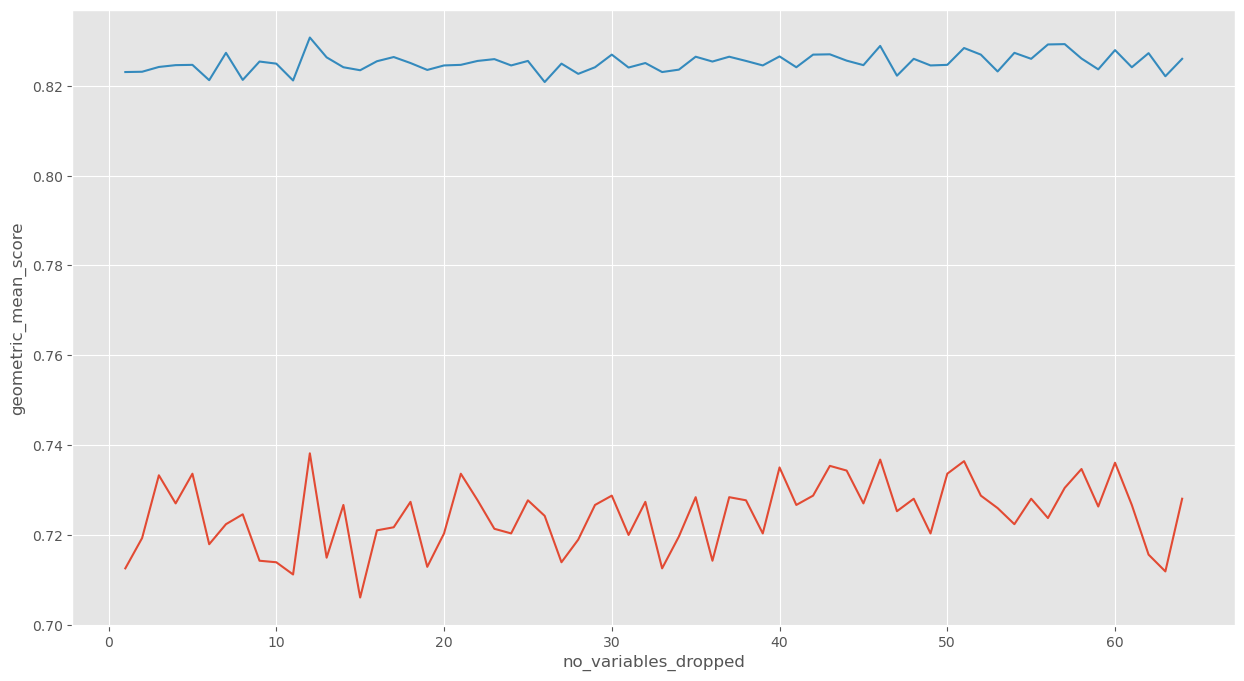

In [64]:
# plot the results

plt.figure(figsize=(15,8))

ax1 = sns.lineplot(x="no_variables_dropped", y="geometric_mean_score", data=score_array)
ax1 = sns.lineplot(x="no_variables_dropped", y="Weighted_F1_score", data=score_array)
ax2 = sns.lineplot(x="no_variables_dropped", y="mean", data=score_array,dashes="--")
ax1.set(xlabel='No. of variables dropped', ylabel='Scores')
plt.legend(labels=['Geometric Mean Score', 'Weighted F1 Score','Combined Average'])
plt.fill_between(score_array.no_variables_dropped, score_array.geometric_mean_score, score_array.Weighted_F1_score, alpha=0.2,facecolor='orange')

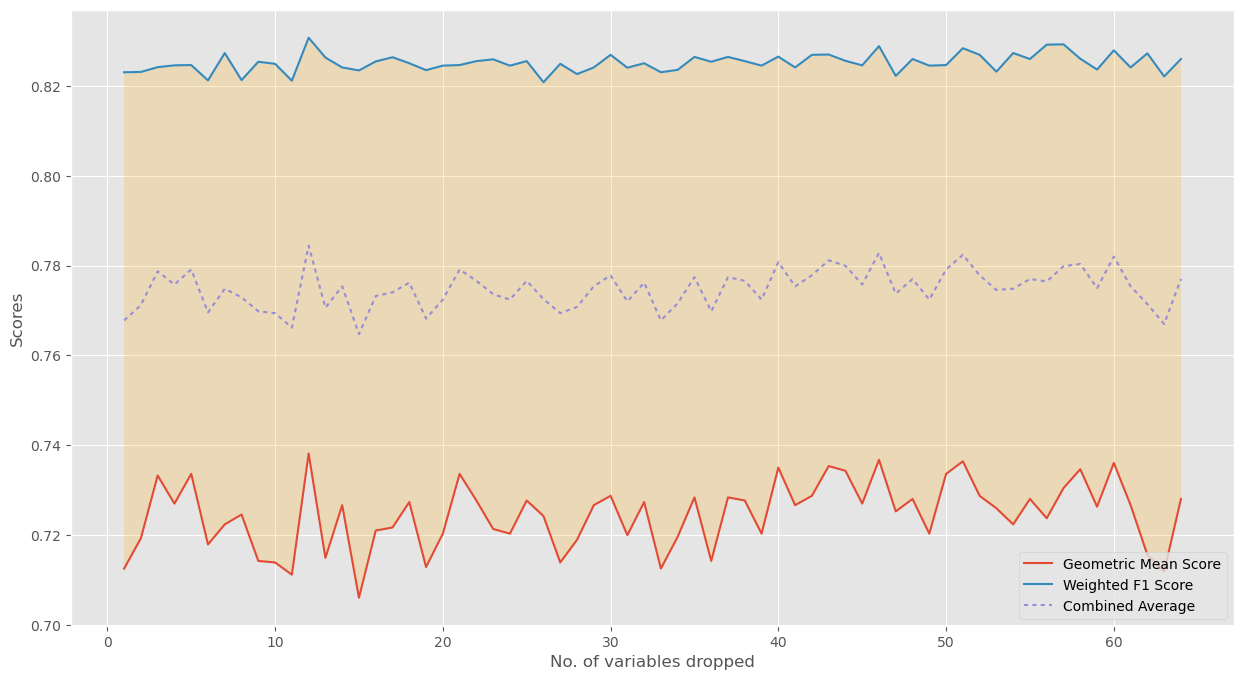

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming score_array is your DataFrame with columns: no_variables_dropped, geometric_mean_score, Weighted_F1_score, mean

plt.figure(figsize=(15, 8))

# Plot the Geometric Mean Score
ax1 = sns.lineplot(x="no_variables_dropped", y="geometric_mean_score", data=score_array, label='Geometric Mean Score')

# Plot the Weighted F1 Score
sns.lineplot(x="no_variables_dropped", y="Weighted_F1_score", data=score_array, label='Weighted F1 Score', ax=ax1)

# Plot the Combined Average (mean)
sns.lineplot(x="no_variables_dropped", y="mean", data=score_array, label='Combined Average', ax=ax1, dashes=(2, 2))

# Set labels and legend
ax1.set(xlabel='No. of variables dropped', ylabel='Scores')
plt.legend()

# Fill the area between Geometric Mean Score and Weighted F1 Score
plt.fill_between(score_array.no_variables_dropped, 
                 score_array.geometric_mean_score, 
                 score_array.Weighted_F1_score, 
                 alpha=0.2, facecolor='orange')

plt.show()


In [67]:
# extract details of the iteration that derived the best scores after pruning

score_array[score_array["mean"] == score_array["mean"].max()]

,no_variables_dropped,geometric_mean_score,Weighted_F1_score,mean
11,12,0.738169,0.830716,0.784442


In [68]:
# create a list to house all variables to be pruned

to_drop = feature_importance.sort_values(by = "var_impt", ascending=False)[-57:len(feature_importance)]

In [69]:
to_drop_list = to_drop.reset_index().iloc[:,1]

In [70]:
to_drop_list

0                                    born_EU
1                    1-family_lone_noDepKids
2                                  age_30_34
3                   Females_ptTime_less15hrs
4                               born_Oceania
5                                toWork_walk
6                     Females_FTime_31_48hrs
7                              avg_pop_churn
8     Associate_professional_technical_occup
9                        economically_active
10                                 age_50_54
11                         1-personHse_other
12                       tenure_rent_private
13                          hse_semiDetached
14                                 hse_flats
15           Managers_directors_senior_occup
16                           central_heating
17                     tenure_owned_mortLoan
18                     Males_ptTime_16_30hrs
19                   Females_ptTime_16_30hrs
20                                  Buddhist
21                                  NS-SEC_4
22        

In [71]:
# create a new dataframe for hosting variables after pruning

df_01_data_dropped = df_01_data[:]

In [72]:
df_01_data_dropped = df_01_data_dropped.drop(columns=to_drop_list)

In [73]:
df_01_data_dropped.head()

,Pop_size,age_0_4,age_5_9,age_10_14,age_15_19,age_40_44,age_45_49,age_60_64,age_65_69,age_70_74,...,No_qual,Lv4_qual,Other_qual,toWork_underground_light_rail,toWork_train,toWork_bus,toWork_carVan,toWork_passenger_carVan,toWork_taxi,toWork_bicycle
0,-0.658537,-1.372624,-1.614350,-1.582329,-1.755906,-0.120000,0.659341,2.259615,1.093023,1.408451,...,-1.539216,1.986175,-0.741379,0.170795,-0.306083,-0.835334,-0.546198,-0.859595,-0.631409,0.805561
1,-0.759582,-1.079848,-1.188341,-1.453815,-1.500000,2.253333,1.170330,1.908654,2.046512,2.014085,...,-1.500000,2.059908,-1.189655,0.227091,-0.233313,-0.974646,-0.233249,-0.871737,-0.858955,1.137534
2,-1.073171,-1.171103,-1.892377,-1.578313,-0.161417,0.560000,0.565934,0.701923,1.261628,0.492958,...,-0.450980,1.027650,-0.620690,0.091431,-0.240467,-0.275673,-0.482598,-0.834654,-0.852303,1.677591
3,-2.331010,-1.049430,0.107623,-0.297189,-0.350394,0.426667,0.439560,0.158654,0.360465,1.267606,...,0.666667,0.000000,0.362069,0.113814,-0.031168,0.294310,-0.902586,-0.798896,-0.695636,0.940659
4,0.170732,0.768061,0.587444,0.064257,-0.350394,-0.173333,-0.994505,-0.389423,-0.465116,-0.281690,...,0.058824,-0.073733,0.775862,0.575088,0.317257,-0.549085,-0.991452,0.062273,-0.191442,-0.358449


In [74]:
# split the dataset into training and test set again

x_train_dropped, x_test_dropped, y_train, y_test = train_test_split(df_01_data_dropped, df_01_labels, test_size=0.3, stratify=df_01_labels, random_state=42)

In [75]:
# test the perfomance of this model containing pruned variables

scores = cross_val_score(brf2, x_train_dropped, y_train.values.ravel(), cv=5, scoring = 'f1_weighted')
print ("mean validation - F1 Weighted score:", "F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
brf2 = brf2.fit(x_train_dropped, y_train.values.ravel())
y_pred = brf2.predict(x_test_dropped)
f1 = f1_score(y_test, y_pred, average="weighted")
print ('Wighted F1 score on Test set:', f1)

C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warni

mean validation - F1 Weighted score: F1 score: 0.83 (+/- 0.01)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 600
building tree 3 of 600
building tree 2 of 600
building tree 4 of 600
building tree 6 of 600
building tree 5 of 600
building tree 8 of 600
building tree 9 of 600
building tree 7 of 600
building tree 11 of 600
building tree 10 of 600
building tree 16 of 600
building tree 13 of 600
building tree 12 of 600
building tree 14 of 600
building tree 17 of 600
building tree 18 of 600
building tree 15 of 600
building tree 19 of 600
building tree 21 of 600
building tree 20 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 31 of 600
building tree 29 of 600
building tree 32 of 600
building tree 30 of 600
building tree 35 of 600
building tree 33 of 600
building tree 34 of 600
building tree 37 of 600
building tree 36 of 600
building tree 39 of 600
building tree 38 of 600
building tree 40 of 600
building tree 43 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 143 of 600
building tree 141 of 600
building tree 142 of 600
building tree 145 of 600
building tree 144 of 600
building tree 147 of 600
building tree 146 of 600
building tree 149 of 600
building tree 148 of 600
building tree 150 of 600
building tree 152 of 600
building tree 153 of 600
building tree 151 of 600
building tree 154 of 600
building tree 157 of 600
building tree 155 of 600
building tree 158 of 600
building tree 159 of 600
building tree 156 of 600
building tree 161 of 600
building tree 160 of 600
building tree 162 of 600
building tree 164 of 600
building tree 163 of 600
building tree 166 of 600
building tree 165 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 172 of 600
building tree 171 of 600
building tree 174 of 600
building tree 175 of 600
building tree 173 of 600
building tree 176 of 600
building tree 178 of 600
building tree 179 of 600
building tree 177 of 600
building tree 180 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s


building tree 276 of 600
building tree 277 of 600
building tree 275 of 600
building tree 278 of 600
building tree 281 of 600
building tree 279 of 600
building tree 283 of 600
building tree 280 of 600
building tree 282 of 600
building tree 286 of 600
building tree 284 of 600
building tree 285 of 600
building tree 288 of 600
building tree 291 of 600
building tree 290 of 600
building tree 293 of 600
building tree 289 of 600
building tree 292 of 600
building tree 287 of 600
building tree 294 of 600
building tree 295 of 600
building tree 297 of 600
building tree 296 of 600
building tree 299 of 600
building tree 298 of 600
building tree 301 of 600
building tree 300 of 600
building tree 302 of 600
building tree 303 of 600
building tree 306 of 600
building tree 305 of 600
building tree 309 of 600
building tree 308 of 600
building tree 304 of 600
building tree 307 of 600
building tree 310 of 600
building tree 312 of 600
building tree 313 of 600
building tree 311 of 600
building tree 315 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.4s


building tree 550 of 600
building tree 552 of 600
building tree 553 of 600
building tree 555 of 600
building tree 554 of 600
building tree 556 of 600
building tree 559 of 600
building tree 557 of 600
building tree 562 of 600
building tree 561 of 600
building tree 560 of 600
building tree 558 of 600
building tree 564 of 600
building tree 563 of 600
building tree 565 of 600
building tree 566 of 600
building tree 567 of 600
building tree 568 of 600
building tree 569 of 600
building tree 570 of 600
building tree 571 of 600
building tree 572 of 600
building tree 574 of 600
building tree 576 of 600
building tree 575 of 600
building tree 573 of 600
building tree 579 of 600
building tree 577 of 600
building tree 578 of 600
building tree 580 of 600
building tree 583 of 600
building tree 582 of 600
building tree 584 of 600
building tree 581 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 591 of 600
building tree 589 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished


Wighted F1 score on Test set: 0.8292446333638991


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished


In [76]:
print('The geometric mean of Balanced RandomForest classifier on the test set is {}'.format(geometric_mean_score(y_test.values.ravel(),y_pred)))

The geometric mean of Balanced RandomForest classifier on the test set is 0.7304824783407133


In [77]:
unique_label = np.unique(y_test)
print(pd.DataFrame(confusion_matrix(y_test, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:GEN  pred:NON-GEN
true:GEN            52            23
true:NON-GEN       317          1059


<Axes: title={'center': 'Non-normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

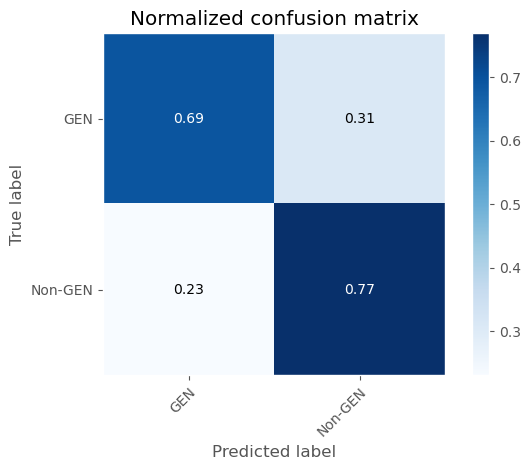

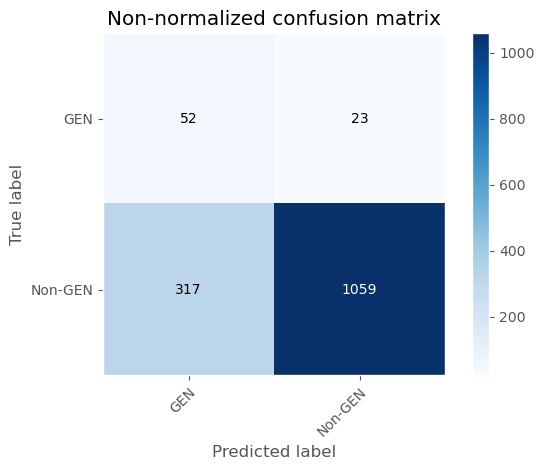

In [78]:
# plot a confusion matrix using both normalised and non-normalised values
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.grid(None)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=["GEN","Non-GEN"], normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=["GEN","Non-GEN"], normalize=False,
                      title='Non-normalized confusion matrix')

In [79]:
# run model on the entire dataset

In [80]:
# model's performance on the entire dataset

y_pred_2001_all = brf2.predict(df_01_data_dropped)
f1 = f1_score(df_01_labels, y_pred_2001_all, average="weighted")
print ('Wighted F1 score on Test set:', f1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished


Wighted F1 score on Test set: 0.8454987198432232


In [81]:
print('The geometric mean of Balanced RandomForest classifier on the test set is {}'.format(geometric_mean_score(df_01_labels.values.ravel(),y_pred_2001_all)))

The geometric mean of Balanced RandomForest classifier on the test set is 0.8423579099282898


In [82]:
unique_label = np.unique(df_01_labels)
print(pd.DataFrame(confusion_matrix(df_01_labels, y_pred_2001_all, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:GEN  pred:NON-GEN
true:GEN           227            23
true:NON-GEN      1002          3583


<Axes: title={'center': 'Non-normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

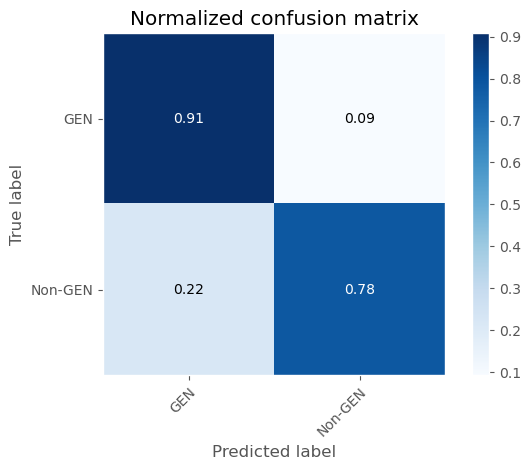

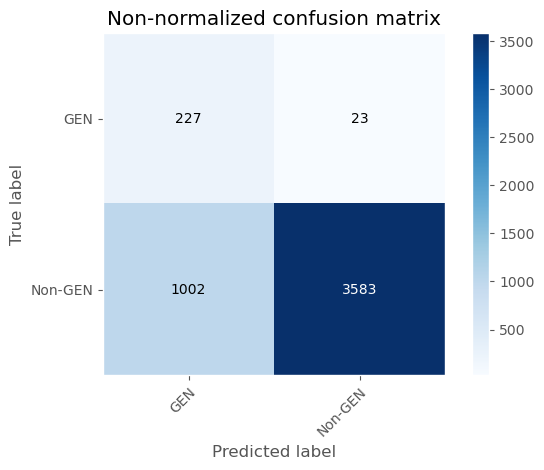

In [83]:
# plot a confusion matrix using both normalised and non-normalised values
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.grid(None)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(df_01_labels, y_pred_2001_all, classes=["GEN","Non-GEN"], normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(df_01_labels, y_pred_2001_all, classes=["GEN","Non-GEN"], normalize=False,
                      title='Non-normalized confusion matrix')

In [84]:
# read in original file and append the predictions

df_pred_all = pd.read_csv("df_modelling_std_01_labels.csv").drop(columns=["Unnamed: 0"])

In [85]:
df_pred_all["predictions"] = y_pred_2001_all

In [86]:
df_pred_all.head()

,LSOA11CD,Pop_size,avg_pop_churn,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,...,toWork_passenger_carVan,toWork_taxi,toWork_bicycle,toWork_walk,toWork_other,Class_2_status,Class_3_status,GEN_Class2,GEN_Class3,predictions
0,E01000001,-0.658537,0.741966,-1.372624,-1.614350,-1.582329,-1.755906,-0.901554,0.083712,0.272321,...,-0.859595,-0.631409,0.805561,11.685667,1.749058,STB,STB,NON-GEN,NON-GEN,NON-GEN
1,E01000002,-0.759582,0.950390,-1.079848,-1.188341,-1.453815,-1.500000,-1.423143,-0.489536,-0.287946,...,-0.871737,-0.858955,1.137534,10.966777,2.137273,STB,STB,NON-GEN,NON-GEN,NON-GEN
2,E01000003,-1.073171,0.375663,-1.171103,-1.892377,-1.578313,-0.161417,-0.411054,0.291174,0.209821,...,-0.834654,-0.852303,1.677591,9.131364,2.061122,STB,STB,NON-GEN,NON-GEN,NON-GEN
3,E01000005,-2.331010,0.295788,-1.049430,0.107623,-0.297189,-0.350394,1.015544,0.598726,-0.216518,...,-0.798896,-0.695636,0.940659,5.935153,-0.633620,DEC,DEC,NON-GEN,NON-GEN,NON-GEN
4,E01000006,0.170732,0.179719,0.768061,0.587444,0.064257,-0.350394,0.227979,0.651501,0.448661,...,0.062273,-0.191442,-0.358449,0.177392,-0.514019,DEC,DEC,NON-GEN,NON-GEN,NON-GEN


In [87]:
# categorising the predictions:
# 0 means accurate predictions
# 1 means predicted value is GEN, but the real category is Non-GEN (False positives)
# 2 means predicted value is NON-GEN, but the real category is GEN (False negatives)

df_pred_all["pred_cat"] = 0

for i in range(len(df_pred_all)):
    if df_pred_all.loc[i,"GEN_Class2"] == "NON-GEN" and df_pred_all.loc[i,"predictions"] == "GEN":
        df_pred_all.loc[i, "pred_cat"] = 1
    elif df_pred_all.loc[i,"GEN_Class2"] == "GEN" and df_pred_all.loc[i,"predictions"] == "NON-GEN":
        df_pred_all.loc[i, "pred_cat"] = 2

In [68]:
df_pred_all.head()

,LSOA11CD,Pop_size,avg_pop_churn,age_0_4,age_5_7,age_8_9,age_10_14,age_15,age_16_17,age_18_19,...,toWork_taxi,toWork_bicycle,toWork_walk,toWork_other,Class_2_status,Class_3_status,GEN_Class2,GEN_Class3,predictions,pred_cat
0,E01000001,0.854701,0.037677,-1.731343,-1.986667,-1.702703,-1.606870,-1.454545,-1.309735,-1.136842,...,3.578703,-0.142289,8.831109,-0.068483,STB,STB,NON-GEN,NON-GEN,NON-GEN,0
1,E01000002,-0.256410,0.056527,-1.377399,-1.713333,-1.099099,-1.438931,-1.439394,-1.725664,-1.684211,...,3.246082,-0.020480,7.867334,2.147109,STB,STB,NON-GEN,NON-GEN,GEN,1
2,E01000003,0.316239,1.373138,-1.053305,-1.226667,-1.090090,-1.923664,-1.242424,-0.646018,0.284211,...,1.368383,0.296554,9.162056,0.126062,STB,STB,NON-GEN,NON-GEN,NON-GEN,0
3,E01000005,-3.649573,0.695312,0.289979,0.000000,0.342342,0.248092,0.515152,0.221239,-0.389474,...,0.463543,-0.016153,6.427513,0.594204,STB,STB,NON-GEN,NON-GEN,NON-GEN,0
4,E01000006,0.606838,-0.222276,0.349680,-0.533333,0.261261,0.034351,0.469697,0.168142,0.894737,...,0.580377,-0.270168,0.478177,-0.009858,IUP,IUP,NON-GEN,NON-GEN,NON-GEN,0


In [88]:
# checkpoint - output file
df_pred_all.to_csv("7a_df_pred_all.csv")

## Adding Geographic Covariate 1 - Proximity to London's inner boroughs and Richmond upon Thames

In [89]:
# read in dataset consisting the proximal distances between each LSOA and the boundaries of inner boroughs and Richmond upon Thames

proximity_innerBor_Richmond = pd.read_csv("proximity_innerBoroughs_Richmond.csv")

In [90]:
proximity_innerBor_Richmond.head()

,LSOA11CD,LSOA11NM,LAD11CD,LAD11NM,Proximity_to_innerBoroughs_Richmond
0,E01000001,City of London 001A,E09000001,City of London,0.000000
1,E01000002,City of London 001B,E09000001,City of London,0.000000
2,E01000003,City of London 001C,E09000001,City of London,0.000000
3,E01000005,City of London 001E,E09000001,City of London,0.000000
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,1059.179475


In [91]:
# read in original dataset

df_01_lsoa = pd.read_csv("df_modelling_std_01_labels.csv").drop(columns=["Unnamed: 0"])

In [92]:
# remove non-essential variables at this stage

df_01_lsoa = df_01_lsoa.drop(columns=["Class_2_status","Class_3_status","GEN_Class2","GEN_Class3"])

In [93]:
# attach the 1st geog covariate to the original dataset

df_01_geogco = df_01_lsoa.merge(proximity_innerBor_Richmond[["Proximity_to_innerBoroughs_Richmond","LSOA11CD"]], left_on="LSOA11CD", right_on="LSOA11CD")

In [94]:
# create a new dataset which geog covariate 2 can be appended onto later

df_01_geogco2 = df_01_geogco[:]

In [95]:
# prepping the dataset with geog covariate 1 to be modelled and tested

df_01_geogco = df_01_geogco.drop(columns = "LSOA11CD")

In [96]:
df_01_geogco = df_01_geogco.drop(columns=to_drop_list)

In [97]:
df_01_geogco.head()

,Pop_size,age_0_4,age_5_9,age_10_14,age_15_19,age_40_44,age_45_49,age_60_64,age_65_69,age_70_74,...,Lv4_qual,Other_qual,toWork_underground_light_rail,toWork_train,toWork_bus,toWork_carVan,toWork_passenger_carVan,toWork_taxi,toWork_bicycle,Proximity_to_innerBoroughs_Richmond
0,-0.658537,-1.372624,-1.614350,-1.582329,-1.755906,-0.120000,0.659341,2.259615,1.093023,1.408451,...,1.986175,-0.741379,0.170795,-0.306083,-0.835334,-0.546198,-0.859595,-0.631409,0.805561,0.000000
1,-0.759582,-1.079848,-1.188341,-1.453815,-1.500000,2.253333,1.170330,1.908654,2.046512,2.014085,...,2.059908,-1.189655,0.227091,-0.233313,-0.974646,-0.233249,-0.871737,-0.858955,1.137534,0.000000
2,-1.073171,-1.171103,-1.892377,-1.578313,-0.161417,0.560000,0.565934,0.701923,1.261628,0.492958,...,1.027650,-0.620690,0.091431,-0.240467,-0.275673,-0.482598,-0.834654,-0.852303,1.677591,0.000000
3,-2.331010,-1.049430,0.107623,-0.297189,-0.350394,0.426667,0.439560,0.158654,0.360465,1.267606,...,0.000000,0.362069,0.113814,-0.031168,0.294310,-0.902586,-0.798896,-0.695636,0.940659,0.000000
4,0.170732,0.768061,0.587444,0.064257,-0.350394,-0.173333,-0.994505,-0.389423,-0.465116,-0.281690,...,-0.073733,0.775862,0.575088,0.317257,-0.549085,-0.991452,0.062273,-0.191442,-0.358449,1059.179475


In [98]:
# test the performance of this model with geog covariate 1

scores = cross_val_score(brf2, df_01_geogco, df_01_labels.values.ravel(), cv=5, scoring = 'f1_weighted')
print ("mean validation - F1 Weighted score:", "F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
brf2 = brf2.fit(df_01_geogco, df_01_labels.values.ravel())
y_pred_geogco = brf2.predict(df_01_geogco)
f1 = f1_score(df_01_labels, y_pred_geogco, average="weighted")
print ('Wighted F1 score on Test set:', f1)

C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warni

mean validation - F1 Weighted score: F1 score: 0.82 (+/- 0.11)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 3 of 600
building tree 8 of 600
building tree 2 of 600
building tree 4 of 600
building tree 5 of 600
building tree 1 of 600
building tree 7 of 600
building tree 6 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 16 of 600
building tree 15 of 600
building tree 12 of 600
building tree 14 of 600
building tree 13 of 600
building tree 17 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 18 of 600
building tree 24 of 600
building tree 23 of 600
building tree 25 of 600
building tree 26 of 600
building tree 28 of 600
building tree 29 of 600
building tree 27 of 600
building tree 31 of 600
building tree 30 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 40 of 600
building tree 39 of 600
building tree 41 of 600
building tree 43 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 132 of 600
building tree 134 of 600
building tree 133 of 600
building tree 136 of 600
building tree 138 of 600
building tree 137 of 600
building tree 135 of 600
building tree 141 of 600
building tree 140 of 600
building tree 143 of 600
building tree 139 of 600
building tree 144 of 600
building tree 146 of 600
building tree 145 of 600
building tree 142 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 153 of 600
building tree 152 of 600
building tree 155 of 600
building tree 154 of 600
building tree 156 of 600
building tree 158 of 600
building tree 159 of 600
building tree 157 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 169 of 600
building tree 170 of 600
building tree 168 of 600
building tree 171 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 325 of 600
building tree 326 of 600
building tree 327 of 600
building tree 328 of 600
building tree 329 of 600
building tree 330 of 600
building tree 331 of 600
building tree 332 of 600
building tree 335 of 600
building tree 334 of 600
building tree 333 of 600
building tree 336 of 600
building tree 337 of 600
building tree 338 of 600
building tree 339 of 600
building tree 341 of 600
building tree 342 of 600
building tree 340 of 600
building tree 343 of 600
building tree 345 of 600
building tree 347 of 600
building tree 346 of 600
building tree 344 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 353 of 600
building tree 352 of 600
building tree 354 of 600
building tree 358 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 361 of 600
building tree 359 of 600
building tree 360 of 600
building tree 362 of 600
building tree 364 of 600
building tree 363 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.5s


building tree 523 of 600
building tree 525 of 600
building tree 526 of 600
building tree 527 of 600
building tree 524 of 600
building tree 528 of 600
building tree 529 of 600
building tree 530 of 600
building tree 532 of 600
building tree 533 of 600
building tree 531 of 600
building tree 535 of 600
building tree 534 of 600
building tree 536 of 600
building tree 537 of 600
building tree 538 of 600
building tree 540 of 600
building tree 541 of 600
building tree 539 of 600
building tree 542 of 600
building tree 544 of 600
building tree 543 of 600
building tree 545 of 600
building tree 547 of 600
building tree 546 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 548 of 600
building tree 552 of 600
building tree 553 of 600
building tree 555 of 600
building tree 554 of 600
building tree 558 of 600
building tree 556 of 600
building tree 557 of 600
building tree 560 of 600
building tree 559 of 600
building tree 561 of 600
building tree 563 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s


Wighted F1 score on Test set: 0.8590630691933383


[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished


In [99]:
print('The geometric mean of Balanced RandomForest classifier on the test set is {}'.format(geometric_mean_score(df_01_labels.values.ravel(),y_pred_geogco)))

The geometric mean of Balanced RandomForest classifier on the test set is 0.8925964723083535


In [100]:
unique_label = np.unique(df_01_labels)
print(pd.DataFrame(confusion_matrix(df_01_labels, y_pred_geogco, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:GEN  pred:NON-GEN
true:GEN           250             0
true:NON-GEN       932          3653


<Axes: title={'center': 'Non-normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

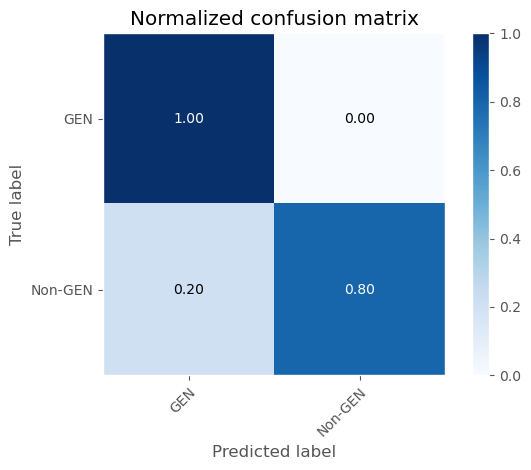

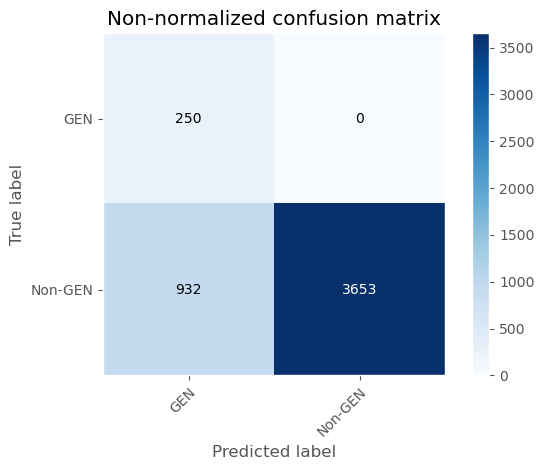

In [101]:
# plot a confusion matrix using both normalised and non-normalised values
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.grid(None)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(df_01_labels, y_pred_geogco, classes=["GEN","Non-GEN"], normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(df_01_labels, y_pred_geogco, classes=["GEN","Non-GEN"], normalize=False,
                      title='Non-normalized confusion matrix')

## Adding Geographic Covariate 2 - Summed PC1 scores across all neighbourhing LSOAs under a queen's contiguity matrix

In [103]:
# read in relevant dataset

neighbour_pca_scores = pd.read_csv("df_neighbours_pca_01_modelling.csv").drop(columns="Unnamed: 0")

In [104]:
neighbour_pca_scores.head()

,LSOA11CD,PCA_score_nbr
0,E01000001,2.354388
1,E01000002,2.479326
2,E01000003,0.634527
3,E01000005,-0.537932
4,E01000006,-1.117856


In [105]:
df_01_geogco2.head()

,LSOA11CD,Pop_size,avg_pop_churn,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,...,toWork_train,toWork_bus,toWork_motorcycle,toWork_carVan,toWork_passenger_carVan,toWork_taxi,toWork_bicycle,toWork_walk,toWork_other,Proximity_to_innerBoroughs_Richmond
0,E01000001,-0.658537,0.741966,-1.372624,-1.614350,-1.582329,-1.755906,-0.901554,0.083712,0.272321,...,-0.306083,-0.835334,1.793259,-0.546198,-0.859595,-0.631409,0.805561,11.685667,1.749058,0.000000
1,E01000002,-0.759582,0.950390,-1.079848,-1.188341,-1.453815,-1.500000,-1.423143,-0.489536,-0.287946,...,-0.233313,-0.974646,2.703046,-0.233249,-0.871737,-0.858955,1.137534,10.966777,2.137273,0.000000
2,E01000003,-1.073171,0.375663,-1.171103,-1.892377,-1.578313,-0.161417,-0.411054,0.291174,0.209821,...,-0.240467,-0.275673,-0.105336,-0.482598,-0.834654,-0.852303,1.677591,9.131364,2.061122,0.000000
3,E01000005,-2.331010,0.295788,-1.049430,0.107623,-0.297189,-0.350394,1.015544,0.598726,-0.216518,...,-0.031168,0.294310,-0.283444,-0.902586,-0.798896,-0.695636,0.940659,5.935153,-0.633620,0.000000
4,E01000006,0.170732,0.179719,0.768061,0.587444,0.064257,-0.350394,0.227979,0.651501,0.448661,...,0.317257,-0.549085,-0.179201,-0.991452,0.062273,-0.191442,-0.358449,0.177392,-0.514019,1059.179475


In [106]:
# merge the original dataset with geog covariate 2

df_01_geogco2 = df_01_geogco2.merge(neighbour_pca_scores[["LSOA11CD","PCA_score_nbr"]], left_on="LSOA11CD", right_on="LSOA11CD")

In [107]:
df_01_geogco2 = df_01_geogco2.drop(columns = "LSOA11CD")

In [108]:
df_01_geogco2 = df_01_geogco2.drop(columns=to_drop_list)

In [109]:
df_01_geogco2.head()

,Pop_size,age_0_4,age_5_9,age_10_14,age_15_19,age_40_44,age_45_49,age_60_64,age_65_69,age_70_74,...,Other_qual,toWork_underground_light_rail,toWork_train,toWork_bus,toWork_carVan,toWork_passenger_carVan,toWork_taxi,toWork_bicycle,Proximity_to_innerBoroughs_Richmond,PCA_score_nbr
0,-0.658537,-1.372624,-1.614350,-1.582329,-1.755906,-0.120000,0.659341,2.259615,1.093023,1.408451,...,-0.741379,0.170795,-0.306083,-0.835334,-0.546198,-0.859595,-0.631409,0.805561,0.000000,2.354388
1,-0.759582,-1.079848,-1.188341,-1.453815,-1.500000,2.253333,1.170330,1.908654,2.046512,2.014085,...,-1.189655,0.227091,-0.233313,-0.974646,-0.233249,-0.871737,-0.858955,1.137534,0.000000,2.479326
2,-1.073171,-1.171103,-1.892377,-1.578313,-0.161417,0.560000,0.565934,0.701923,1.261628,0.492958,...,-0.620690,0.091431,-0.240467,-0.275673,-0.482598,-0.834654,-0.852303,1.677591,0.000000,0.634527
3,-2.331010,-1.049430,0.107623,-0.297189,-0.350394,0.426667,0.439560,0.158654,0.360465,1.267606,...,0.362069,0.113814,-0.031168,0.294310,-0.902586,-0.798896,-0.695636,0.940659,0.000000,-0.537932
4,0.170732,0.768061,0.587444,0.064257,-0.350394,-0.173333,-0.994505,-0.389423,-0.465116,-0.281690,...,0.775862,0.575088,0.317257,-0.549085,-0.991452,0.062273,-0.191442,-0.358449,1059.179475,-1.117856


In [110]:
# test the performance of the model with both geog covariates

scores = cross_val_score(brf2, df_01_geogco2, df_01_labels.values.ravel(), cv=5, scoring = 'f1_weighted')
print ("mean validation - F1 Weighted score:", "F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
brf2 = brf2.fit(df_01_geogco2, df_01_labels.values.ravel())
y_pred_geogco2 = brf2.predict(df_01_geogco2)
f1 = f1_score(df_01_labels, y_pred_geogco2, average="weighted")
print ('Wighted F1 score on Test set:', f1)

C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warni

mean validation - F1 Weighted score: F1 score: 0.82 (+/- 0.12)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 600
building tree 3 of 600
building tree 2 of 600
building tree 6 of 600
building tree 4 of 600
building tree 7 of 600
building tree 5 of 600
building tree 8 of 600
building tree 9 of 600
building tree 12 of 600
building tree 11 of 600
building tree 13 of 600
building tree 14 of 600
building tree 10 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 21 of 600
building tree 22 of 600
building tree 20 of 600
building tree 19 of 600
building tree 24 of 600
building tree 18 of 600
building tree 25 of 600
building tree 23 of 600
building tree 26 of 600
building tree 28 of 600
building tree 30 of 600
building tree 29 of 600
building tree 31 of 600
building tree 27 of 600
building tree 32 of 600
building tree 34 of 600
building tree 33 of 600
building tree 37 of 600
building tree 35 of 600
building tree 36 of 600
building tree 39 of 600
building tree 40 of 600
building tree 42 of 600
building tree 38 of 600
building tree 41 of 600
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 118 of 600
building tree 119 of 600
building tree 120 of 600
building tree 122 of 600
building tree 123 of 600
building tree 124 of 600
building tree 121 of 600
building tree 125 of 600
building tree 126 of 600
building tree 127 of 600
building tree 129 of 600
building tree 131 of 600
building tree 128 of 600
building tree 130 of 600
building tree 132 of 600
building tree 136 of 600
building tree 133 of 600
building tree 134 of 600
building tree 135 of 600
building tree 139 of 600
building tree 137 of 600
building tree 141 of 600
building tree 140 of 600
building tree 138 of 600
building tree 142 of 600
building tree 143 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 149 of 600
building tree 148 of 600
building tree 150 of 600
building tree 153 of 600
building tree 152 of 600
building tree 151 of 600
building tree 154 of 600
building tree 156 of 600
building tree 157 of 600
building tree 155 of 600


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s


building tree 302 of 600
building tree 304 of 600
building tree 305 of 600
building tree 307 of 600
building tree 308 of 600
building tree 306 of 600
building tree 309 of 600
building tree 310 of 600
building tree 311 of 600
building tree 314 of 600
building tree 312 of 600
building tree 313 of 600
building tree 316 of 600
building tree 317 of 600
building tree 318 of 600
building tree 315 of 600
building tree 319 of 600
building tree 320 of 600
building tree 321 of 600
building tree 323 of 600
building tree 322 of 600
building tree 325 of 600
building tree 326 of 600
building tree 324 of 600
building tree 327 of 600
building tree 328 of 600
building tree 329 of 600
building tree 334 of 600
building tree 332 of 600
building tree 331 of 600
building tree 330 of 600
building tree 333 of 600
building tree 336 of 600
building tree 335 of 600
building tree 337 of 600
building tree 338 of 600
building tree 341 of 600
building tree 339 of 600
building tree 343 of 600
building tree 342 of 600


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.6s


building tree 556 of 600
building tree 558 of 600
building tree 557 of 600
building tree 560 of 600
building tree 559 of 600
building tree 562 of 600
building tree 563 of 600
building tree 561 of 600
building tree 564 of 600
building tree 566 of 600
building tree 567 of 600
building tree 565 of 600
building tree 569 of 600
building tree 568 of 600
building tree 571 of 600
building tree 570 of 600
building tree 572 of 600
building tree 575 of 600
building tree 574 of 600
building tree 576 of 600
building tree 573 of 600
building tree 577 of 600
building tree 578 of 600
building tree 581 of 600
building tree 579 of 600
building tree 580 of 600
building tree 582 of 600
building tree 583 of 600
building tree 584 of 600
building tree 587 of 600
building tree 586 of 600
building tree 585 of 600
building tree 588 of 600
building tree 589 of 600
building tree 592 of 600
building tree 590 of 600
building tree 591 of 600
building tree 594 of 600
building tree 595 of 600
building tree 596 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s


Wighted F1 score on Test set: 0.8576549591143543


[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished


In [111]:
print('The geometric mean of Balanced RandomForest classifier on the test set is {}'.format(geometric_mean_score(df_01_labels.values.ravel(),y_pred_geogco2)))

The geometric mean of Balanced RandomForest classifier on the test set is 0.8913739043159884


In [112]:
unique_label = np.unique(df_01_labels)
print(pd.DataFrame(confusion_matrix(df_01_labels, y_pred_geogco2, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:GEN  pred:NON-GEN
true:GEN           250             0
true:NON-GEN       942          3643


<Axes: title={'center': 'Non-normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

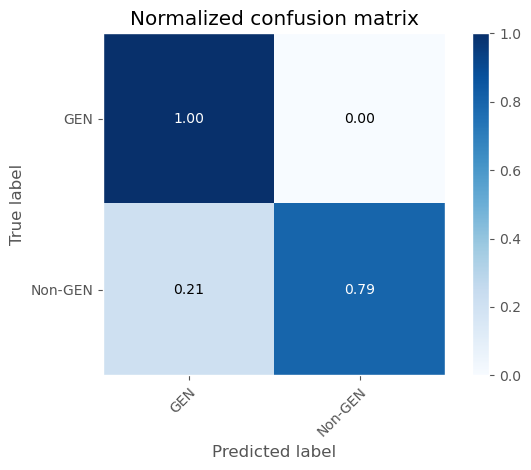

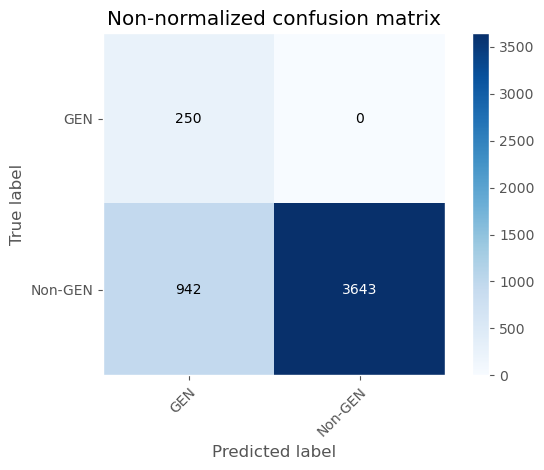

In [113]:
# plot a confusion matrix using both normalised and non-normalised values
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.grid(None)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(df_01_labels, y_pred_geogco2, classes=["GEN","Non-GEN"], normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(df_01_labels, y_pred_geogco2, classes=["GEN","Non-GEN"], normalize=False,
                      title='Non-normalized confusion matrix')

## Predict Future Trends with 2011-2016 Data

In [115]:
# read in relevant dataset

df_11 = pd.read_csv("6O_df_modelling_std_11.csv")

In [116]:
df_11.head()

,LSOA11CD,Pop_size,avg_pop_churn,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,...,toWork_underground_light_rail,toWork_train,toWork_bus,toWork_motorcycle,toWork_carVan,toWork_passenger_carVan,toWork_taxi,toWork_bicycle,toWork_walk,toWork_other
0,E01000001,-0.646753,0.634259,-1.140,-1.810474,-1.733333,-1.726651,0.050193,0.719540,0.114504,...,-0.577342,-0.857143,-0.250000,-0.482143,-0.886919,-0.823899,0.145695,2.099398,-1.112676,-1.409938
1,E01000002,-0.911688,1.189815,-1.660,-2.159601,-1.986667,-1.444191,0.478764,1.002299,0.320611,...,-0.710240,-0.815560,-0.522727,-0.910714,-0.884044,-0.610063,0.162252,1.466867,-0.802817,-1.472050
2,E01000003,-0.301299,0.349537,-1.655,-1.910224,-1.786667,-1.785877,-0.046332,0.898851,0.465649,...,-0.551198,-0.697518,-0.136364,-0.392857,-0.858649,-0.383648,1.264901,2.662651,0.633803,-0.747412
3,E01000005,-1.649351,0.412037,-0.615,-0.987531,-1.275556,1.261959,1.833977,0.250575,0.587786,...,0.087146,0.169014,-0.136364,-0.392857,-0.678965,-0.698113,0.556291,3.737952,0.661972,0.473085
4,E01000006,0.272727,-0.004630,1.270,0.458853,-0.035556,0.615034,0.266409,-0.133333,0.274809,...,1.544662,-0.136821,-0.795455,0.107143,0.232391,-0.113208,-0.549669,0.364458,1.084507,0.481366


In [117]:
neighbour_pca_scores_11 = pd.read_csv("df_neighbours_pca_11_modelling.csv").drop(columns="Unnamed: 0")

In [118]:
neighbour_pca_scores_11.head()

,LSOA11CD,PCA_scores_11_nbr
0,E01000001,3.897793
1,E01000002,4.587567
2,E01000003,2.001385
3,E01000005,-0.258055
4,E01000006,-0.633403


In [119]:
# merge geog covariate 1

df_11_merge = df_11.merge(proximity_innerBor_Richmond[["LSOA11CD","Proximity_to_innerBoroughs_Richmond"]], left_on="LSOA11CD",right_on="LSOA11CD",how="left")

In [120]:
# merge geog covariate 2

df_11_merge = df_11_merge.merge(neighbour_pca_scores_11[["LSOA11CD","PCA_scores_11_nbr"]], left_on="LSOA11CD",right_on="LSOA11CD",how="left")

In [121]:
# removed pruned variables

df_11_merge = df_11_merge.drop(columns=to_drop_list)

In [122]:
df_11_merge = df_11_merge.drop(columns="LSOA11CD")

In [130]:
df_11_merge.head()

,Pop_size,age_0_4,age_5_9,age_10_14,age_15_19,age_40_44,age_45_49,age_60_64,age_65_69,age_70_74,...,Other_qual,toWork_underground_light_rail,toWork_train,toWork_bus,toWork_carVan,toWork_passenger_carVan,toWork_taxi,toWork_bicycle,Proximity_to_innerBoroughs_Richmond,PCA_score_nbr
0,-0.646753,-1.140,-1.810474,-1.733333,-1.726651,0.112094,0.234483,0.596491,2.793939,2.079576,...,1.377961,-0.577342,-0.857143,-0.250000,-0.886919,-0.823899,0.145695,2.099398,0.000000,3.897793
1,-0.911688,-1.660,-2.159601,-1.986667,-1.444191,-0.489676,0.089655,0.970760,1.133333,1.156499,...,1.490834,-0.710240,-0.815560,-0.522727,-0.884044,-0.610063,0.162252,1.466867,0.000000,4.587567
2,-0.301299,-1.655,-1.910224,-1.786667,-1.785877,-0.294985,0.082759,1.298246,1.078788,1.320955,...,0.872503,-0.551198,-0.697518,-0.136364,-0.858649,-0.383648,1.264901,2.662651,0.000000,2.001385
3,-1.649351,-0.615,-0.987531,-1.275556,1.261959,-1.085546,-0.944828,0.748538,-0.175758,-0.275862,...,0.015242,0.087146,0.169014,-0.136364,-0.678965,-0.698113,0.556291,3.737952,0.000000,-0.258055
4,0.272727,1.270,0.458853,-0.035556,0.615034,0.843658,1.020690,-0.520468,0.000000,-0.376658,...,-0.785994,1.544662,-0.136821,-0.795455,0.232391,-0.113208,-0.549669,0.364458,1059.179475,-0.633403


In [129]:
df_11_merge = df_11_merge.rename(columns = {
 'PCA_scores_11_nbr':'PCA_score_nbr'})

In [131]:
# predict labels

y_pred_2011 = brf2.predict(df_11_merge)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.1s finished


In [132]:
# append the predictions with the original dataset

df_11['predictions'] = y_pred_2011

In [133]:
# check the breakdown

df_11.groupby('predictions').size()

predictions
GEN         385
NON-GEN    4450
dtype: int64

In [134]:
# checkpoint - output file
df_11.to_csv("predictions_modelling1.csv")